<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_o24/blob/main/ejercicios/04_train_test.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Train & Test


ejemplos train y test

# Introduccion a ML

## Librerias

In [1]:
import numpy as np
import pandas as pd
# ### Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# ### Regresion Lineal
from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(16,6)})

## Funcion de graficacion y regresion lineal

In [2]:
from sklearn.model_selection import train_test_split

def foo_regresion(X, Y, test_size=0.2, random_state=None, print_coefficients=False, mean=True, median=True):
    # Configurar el tamaño de los gráficos usando Seaborn
    sns.set(rc={'figure.figsize': (18, 8)})

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Inicializar el modelo de regresión lineal
    regression = linear_model.LinearRegression()

    # Entrenar el modelo con los datos de entrenamiento
    regression.fit(X_train, Y_train)

    # Realizar predicciones sobre los datos de entrenamiento y prueba
    Y_hat_train = regression.predict(X_train)
    Y_hat_test = regression.predict(X_test)

    # Calcular el error entre las predicciones y los valores reales
    error_train = np.sqrt(np.square(np.subtract(Y_hat_train, Y_train)))
    error_test = np.sqrt(np.square(np.subtract(Y_hat_test, Y_test)))

    # Inicializar listas para almacenar DataFrames y títulos
    dfs_train = []
    dfs_test = []
    errors = []
    titles = []

    # Crear DataFrames para la regresión en conjunto de entrenamiento y prueba
    df_train = pd.DataFrame({
        'Y_hat': Y_hat_train,
        'Y': Y_train,
        'Error': np.subtract(Y_hat_train, Y_train),
        'Type': 'Train',
        'Model': 'Regression'
    })
    dfs_train.append(df_train)
    errors.append(('Regression', np.abs(error_train).mean(), np.std(error_train), np.abs(error_test).mean(), np.std(error_test)))

    df_test = pd.DataFrame({
        'Y_hat': Y_hat_test,
        'Y': Y_test,
        'Error': np.subtract(Y_hat_test, Y_test),
        'Type': 'Test',
        'Model': 'Regression'
    })
    dfs_test.append(df_test)
    titles.append('Regression')

    if mean:
        # Calcular la media de Y y las predicciones usando la media en el conjunto de prueba
        Y_mean_train = np.mean(Y_train)
        Y_hat_mean_train = np.full_like(Y_train, Y_mean_train)
        error_mean_train = np.sqrt(np.square(np.subtract(Y_hat_mean_train, Y_train)))

        Y_mean_test = np.mean(Y_test)
        Y_hat_mean_test = np.full_like(Y_test, Y_mean_test)
        error_mean_test = np.sqrt(np.square(np.subtract(Y_hat_mean_test, Y_test)))

        # Crear DataFrames para la media en conjunto de entrenamiento y prueba
        df_mean_train = pd.DataFrame({
            'Y_hat': Y_hat_mean_train,
            'Y': Y_train,
            'Error': np.subtract(Y_hat_mean_train, Y_train),
            'Type': 'Train',
            'Model': 'Mean'
        })
        dfs_train.append(df_mean_train)
        errors.append(('Mean', np.abs(error_mean_train).mean(), np.std(error_mean_train), np.abs(error_mean_test).mean(), np.std(error_mean_test)))

        df_mean_test = pd.DataFrame({
            'Y_hat': Y_hat_mean_test,
            'Y': Y_test,
            'Error': np.subtract(Y_hat_mean_test, Y_test),
            'Type': 'Test',
            'Model': 'Mean'
        })
        dfs_test.append(df_mean_test)
        titles.append('Mean')

    if median:
        # Calcular la mediana de Y y las predicciones usando la mediana en el conjunto de prueba
        Y_median_train = np.median(Y_train)
        Y_hat_median_train = np.full_like(Y_train, Y_median_train)
        error_median_train = np.sqrt(np.square(np.subtract(Y_hat_median_train, Y_train)))

        Y_median_test = np.median(Y_test)
        Y_hat_median_test = np.full_like(Y_test, Y_median_test)
        error_median_test = np.sqrt(np.square(np.subtract(Y_hat_median_test, Y_test)))

        # Crear DataFrames para la mediana en conjunto de entrenamiento y prueba
        df_median_train = pd.DataFrame({
            'Y_hat': Y_hat_median_train,
            'Y': Y_train,
            'Error': np.subtract(Y_hat_median_train, Y_train),
            'Type': 'Train',
            'Model': 'Median'
        })
        dfs_train.append(df_median_train)
        errors.append(('Median', np.abs(error_median_train).mean(), np.std(error_median_train), np.abs(error_median_test).mean(), np.std(error_median_test)))

        df_median_test = pd.DataFrame({
            'Y_hat': Y_hat_median_test,
            'Y': Y_test,
            'Error': np.subtract(Y_hat_median_test, Y_test),
            'Type': 'Test',
            'Model': 'Median'
        })
        dfs_test.append(df_median_test)
        titles.append('Median')

    # Concatenate all dataframes for plotting
    df_train_combined = pd.concat(dfs_train, ignore_index=True)
    df_test_combined = pd.concat(dfs_test, ignore_index=True)

    # Gráficos para cada una de las opciones, comparando train y test en el mismo gráfico
    plt.figure(figsize=(18, len(titles) * 8))

    for i, title in enumerate(titles):
        # Subset the combined DataFrame for the current model
        df_train_model = df_train_combined[df_train_combined['Model'] == title]
        df_test_model = df_test_combined[df_test_combined['Model'] == title]

        # 1. Actual vs Predicted
        plt.subplot(len(titles), 3, i * 3 + 1)
        sns.scatterplot(x='Y', y='Y_hat', data=df_train_model, color='blue', label='Train')
        sns.scatterplot(x='Y', y='Y_hat', data=df_test_model, color='orange', label='Test')
        plt.plot(df_train_model['Y'], df_train_model['Y'], color='red')  # Línea de referencia para comparación
        plt.title(f'Scatter Plot: Predicted vs Actual ({title})')
        plt.xlabel('Actual Y')
        plt.ylabel(f'Predicted Y ({title})')
        plt.legend()

        # 2. Histogram of Errors
        plt.subplot(len(titles), 3, i * 3 + 2)
        sns.histplot(df_train_model['Error'], kde=True, color='blue', label='Train', stat="density")
        sns.histplot(df_test_model['Error'], kde=True, color='orange', label='Test', stat="density")
        plt.title(f'Histogram of Prediction Errors ({title})')
        plt.xlabel('Error')
        plt.ylabel('Density')
        plt.legend()

        # 3. Error vs Actual
        plt.subplot(len(titles), 3, i * 3 + 3)
        sns.scatterplot(x='Y', y='Error', data=df_train_model, color='blue', label='Train')
        sns.scatterplot(x='Y', y='Error', data=df_test_model, color='orange', label='Test')
        plt.title(f'Scatter Plot: Error vs Actual Y ({title})')
        plt.xlabel('Actual Y')
        plt.ylabel(f'Error ({title})')
        plt.legend()

    # Ajustar el layout y mostrar los gráficos
    plt.tight_layout()
    plt.show()

    # Boxplot to compare errors - separated for Train and Test
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Model', y='Error', data=df_train_combined)
    plt.title('Boxplot of Errors by Model (Train)')
    plt.xlabel('Model')
    plt.ylabel('Error')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='Model', y='Error', data=df_test_combined)
    plt.title('Boxplot of Errors by Model (Test)')
    plt.xlabel('Model')
    plt.ylabel('Error')

    plt.tight_layout()
    plt.show()

    # Print the errors in a consolidated format, including percentage differences
    print("\n--- Model Performance ---")
    print(f"{'Model':<10} {'Train RMSE':<12} {'Train Std Dev':<15} {'Test RMSE':<12} {'Test Std Dev':<15} {'% Diff RMSE':<12} {'% Diff Std Dev':<15}")
    print("-" * 100)
    for model, train_rmse, train_std, test_rmse, test_std in errors:
        rmse_diff = 100 * (test_rmse - train_rmse) / train_rmse
        std_diff = 100 * (test_std - train_std) / train_std
        print(f"{model:<10} {train_rmse:<12.4f} {train_std:<15.4f} {test_rmse:<12.4f} {test_std:<15.4f} {rmse_diff:<12.2f}% {std_diff:<15.2f}%")


# Simulaciones

## Modelos Lineales 

### Sin error/incertidumbre

$y = x_1 - 3x_2 + 4x_3$

In [3]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
# Matriz de Diseño
X = np.random.normal(size=(N,3))
# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4]))

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y

df.head()

x1        x2        x3         y
0  1.109430  0.592715  0.822370  2.620763
1  0.738192  0.974556 -1.086094 -6.529854
2 -0.626169  0.326165 -1.863696 -9.059448
3 -0.059622 -1.717557 -1.123209  0.600214
4  1.708615  0.289967  0.127948  1.350506

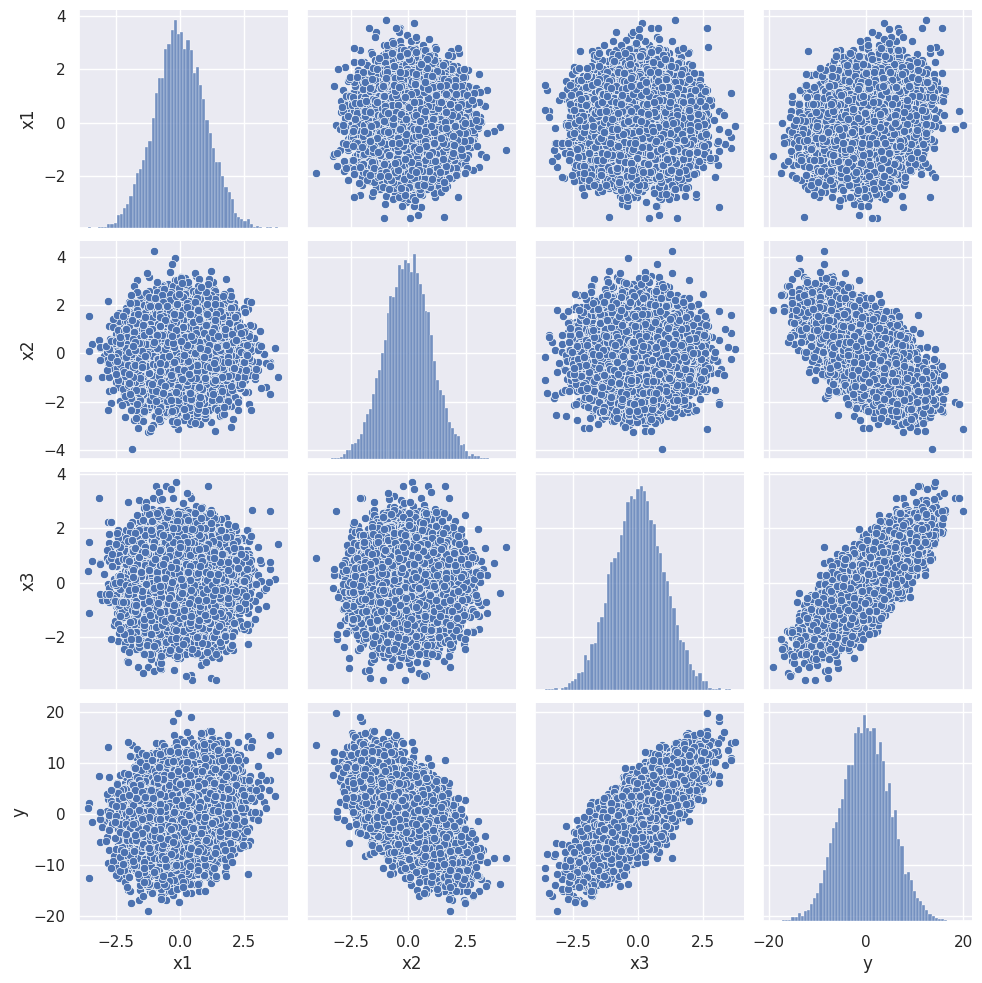

In [4]:
sns.pairplot(df)

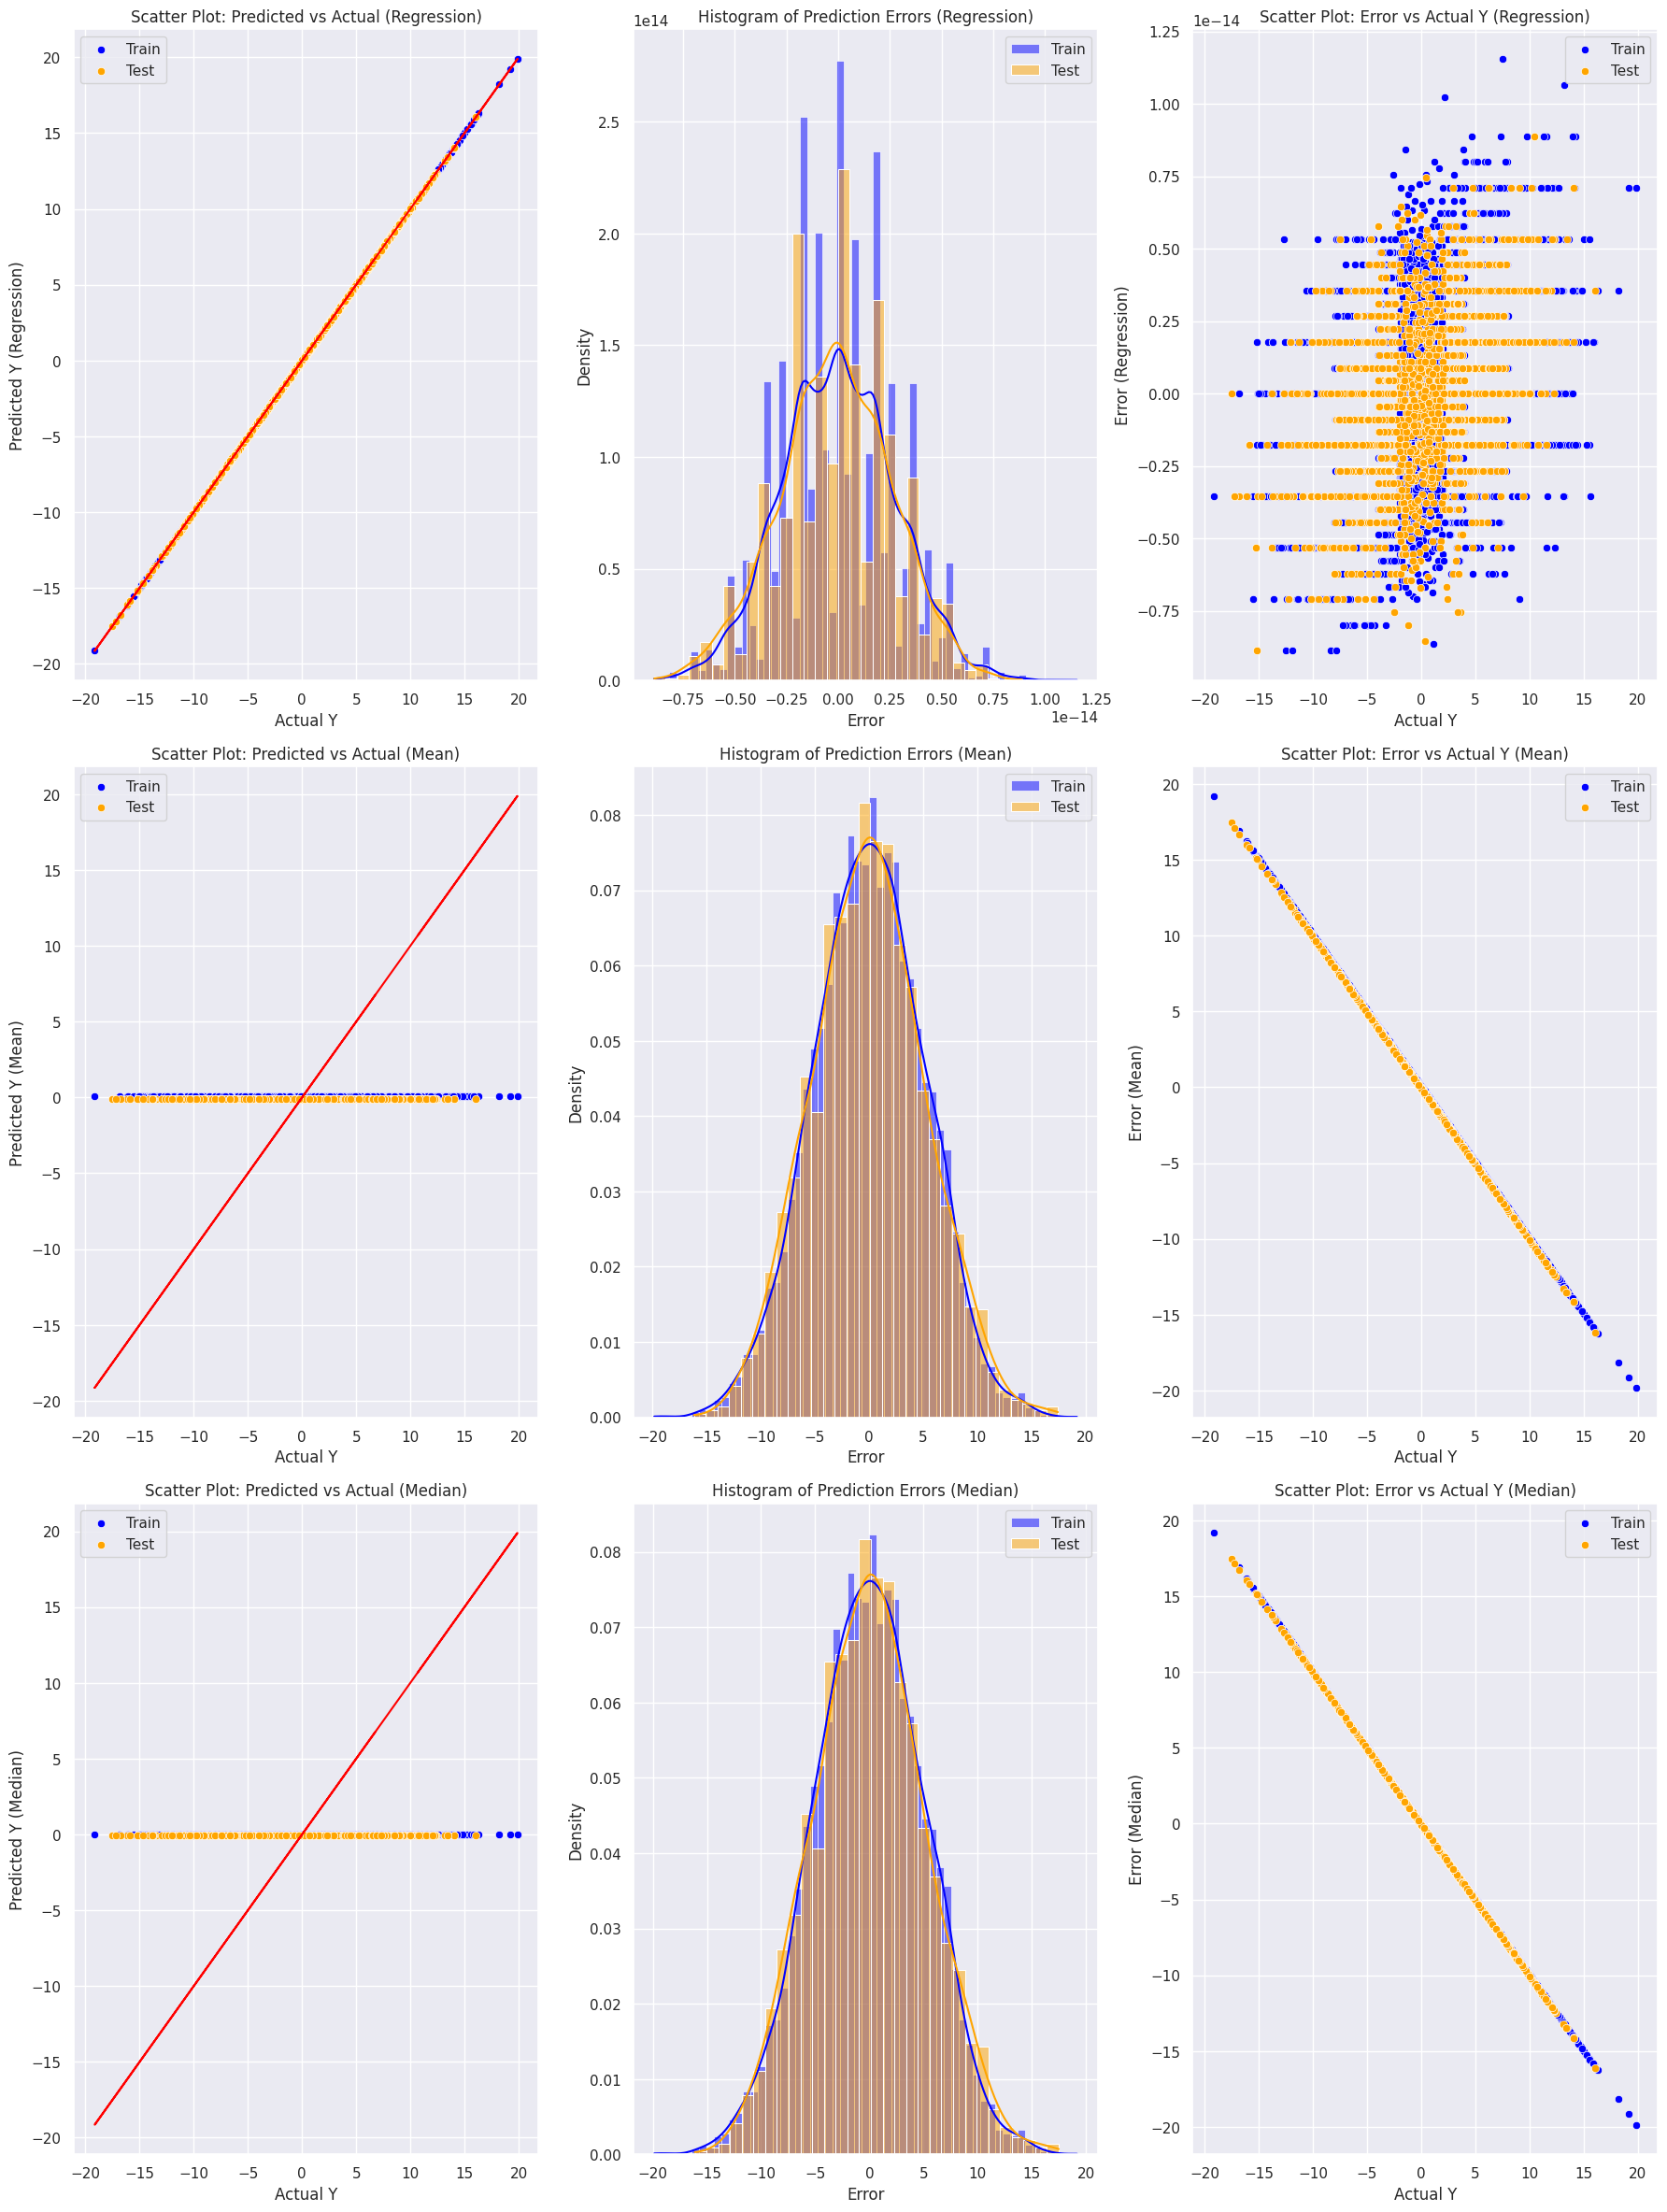

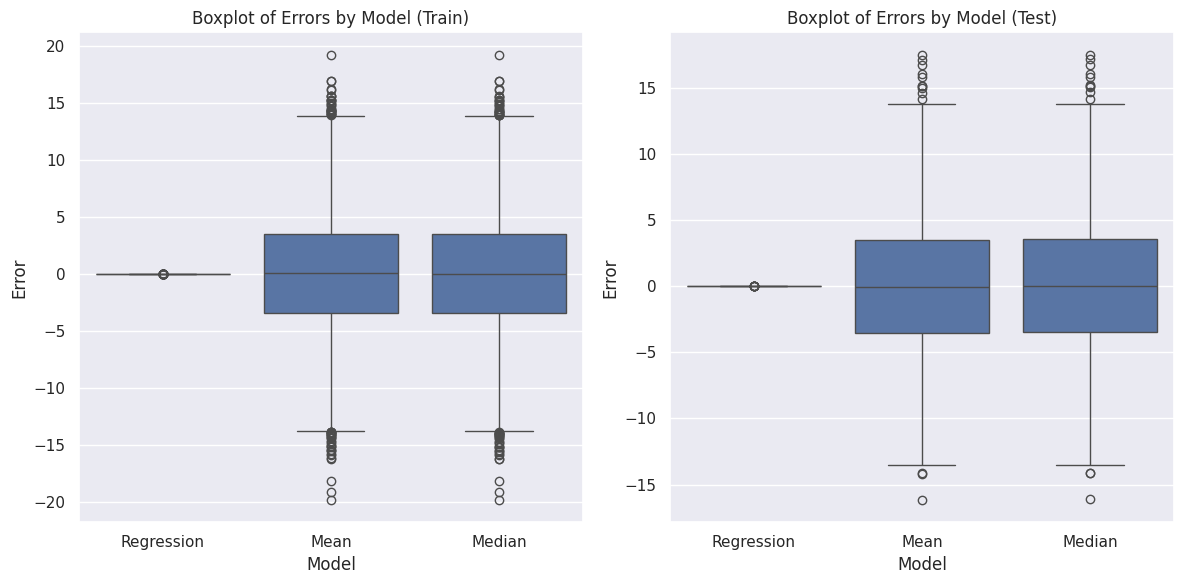


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.0000       0.0000          0.0000       0.0000          -0.93       % 0.90           %
Mean       4.0983       3.0760          4.1491       3.1397          1.24        % 2.07           %
Median     4.0982       3.0763          4.1489       3.1402          1.24        % 2.08           %


In [5]:
foo_regresion(X,Y, test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

### Con error/incertidumbre

$y = x_1 - 3x_2 + 4x_3 + \epsilon$

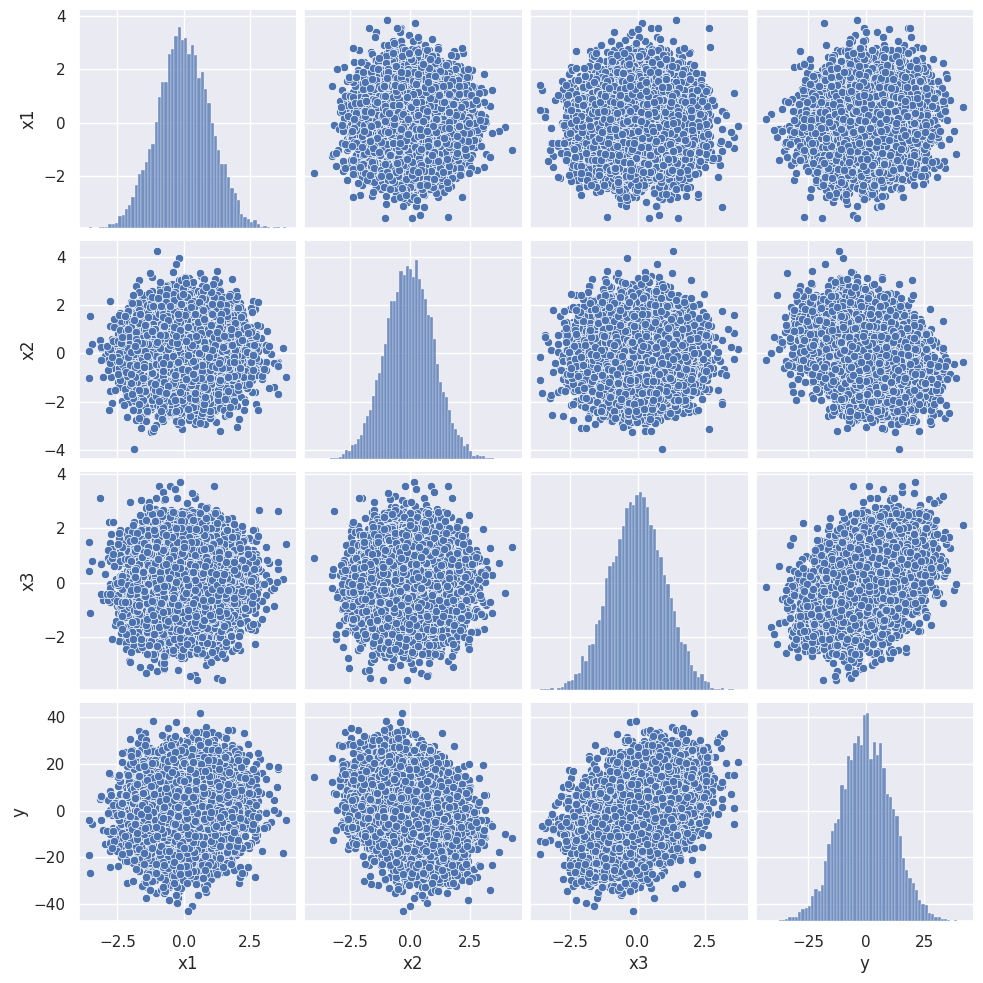

In [6]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,3))
eps = np.random.normal(0,10, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)

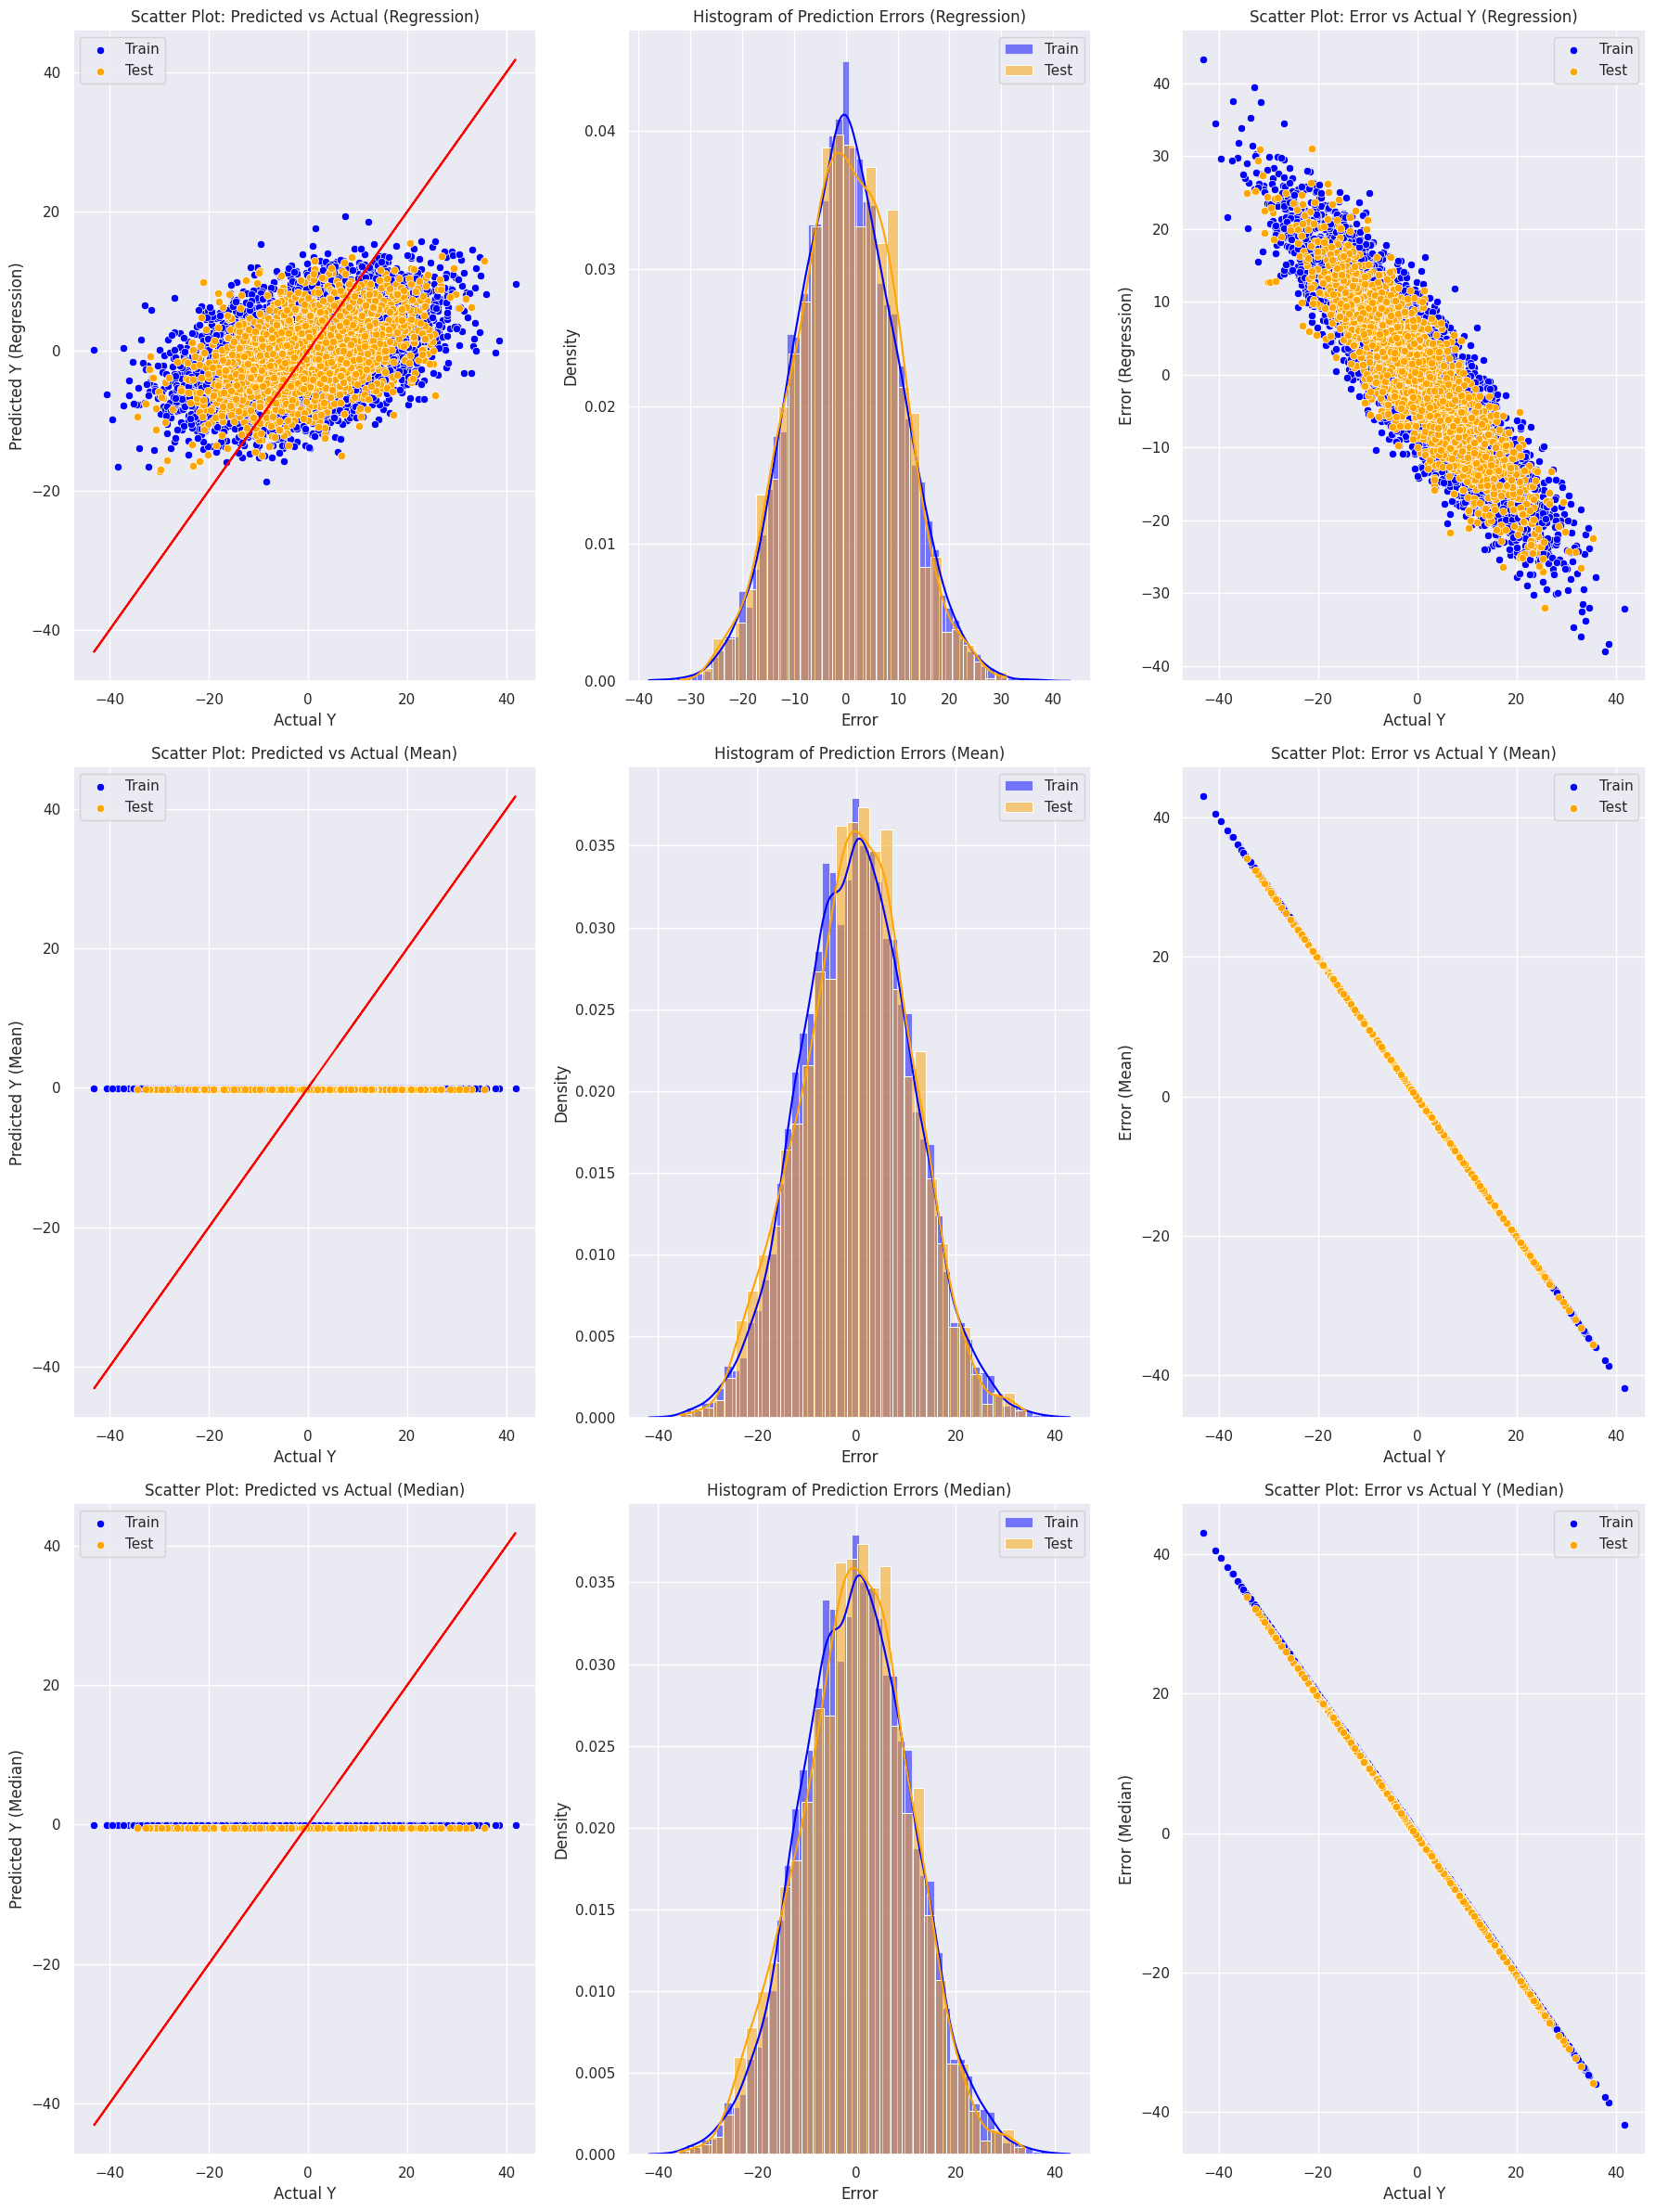

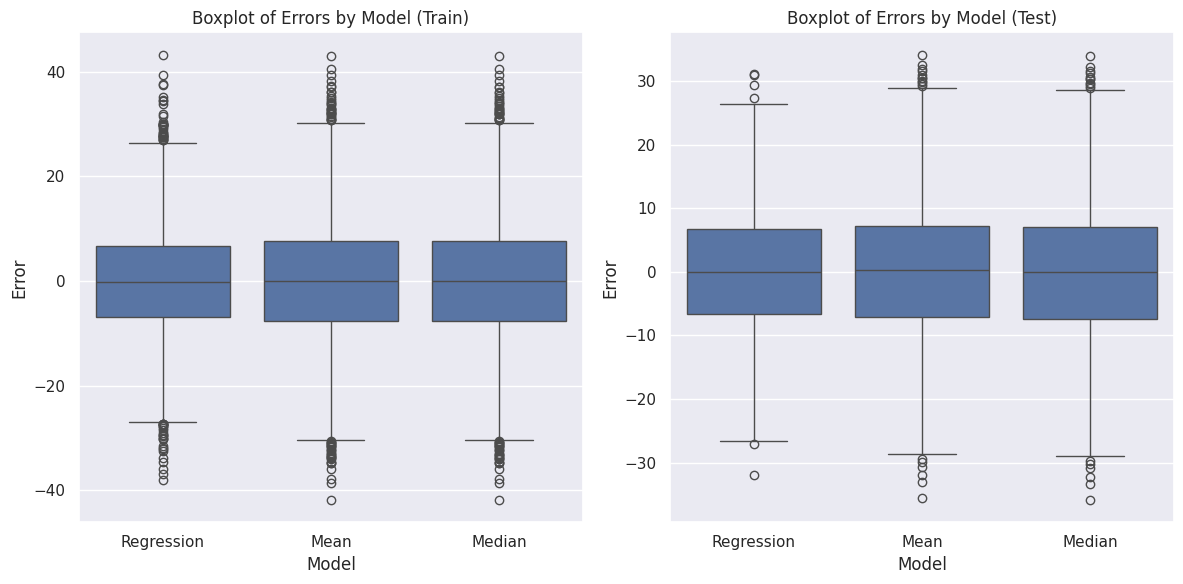


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 7.9557       6.0871          7.9113       5.8083          -0.56       % -4.58          %
Mean       8.9296       6.7502          8.7737       6.6130          -1.75       % -2.03          %
Median     8.9295       6.7502          8.7702       6.6239          -1.78       % -1.87          %


In [7]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

## Modelos no Lineales

### Sin error/incertidumbre

y = $ \frac{1}{x}$

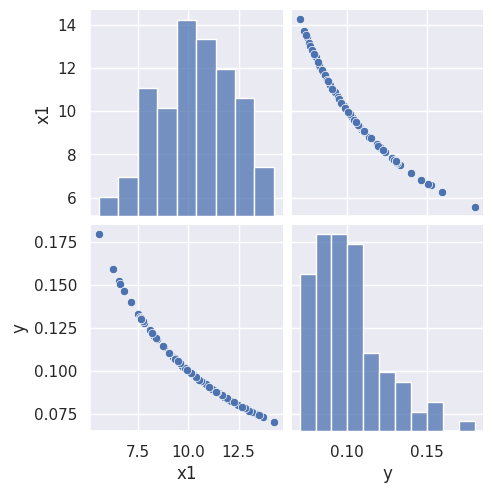

In [30]:
sns.set(rc={'figure.figsize':(16,6)})
# Semilla para replicacion de resultados
np.random.seed(589)
N = 100
# Matriz de Diseño
X = np.random.normal(10,2,size=(N,1))
# Simulacion de Y
Y = 1/X 
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

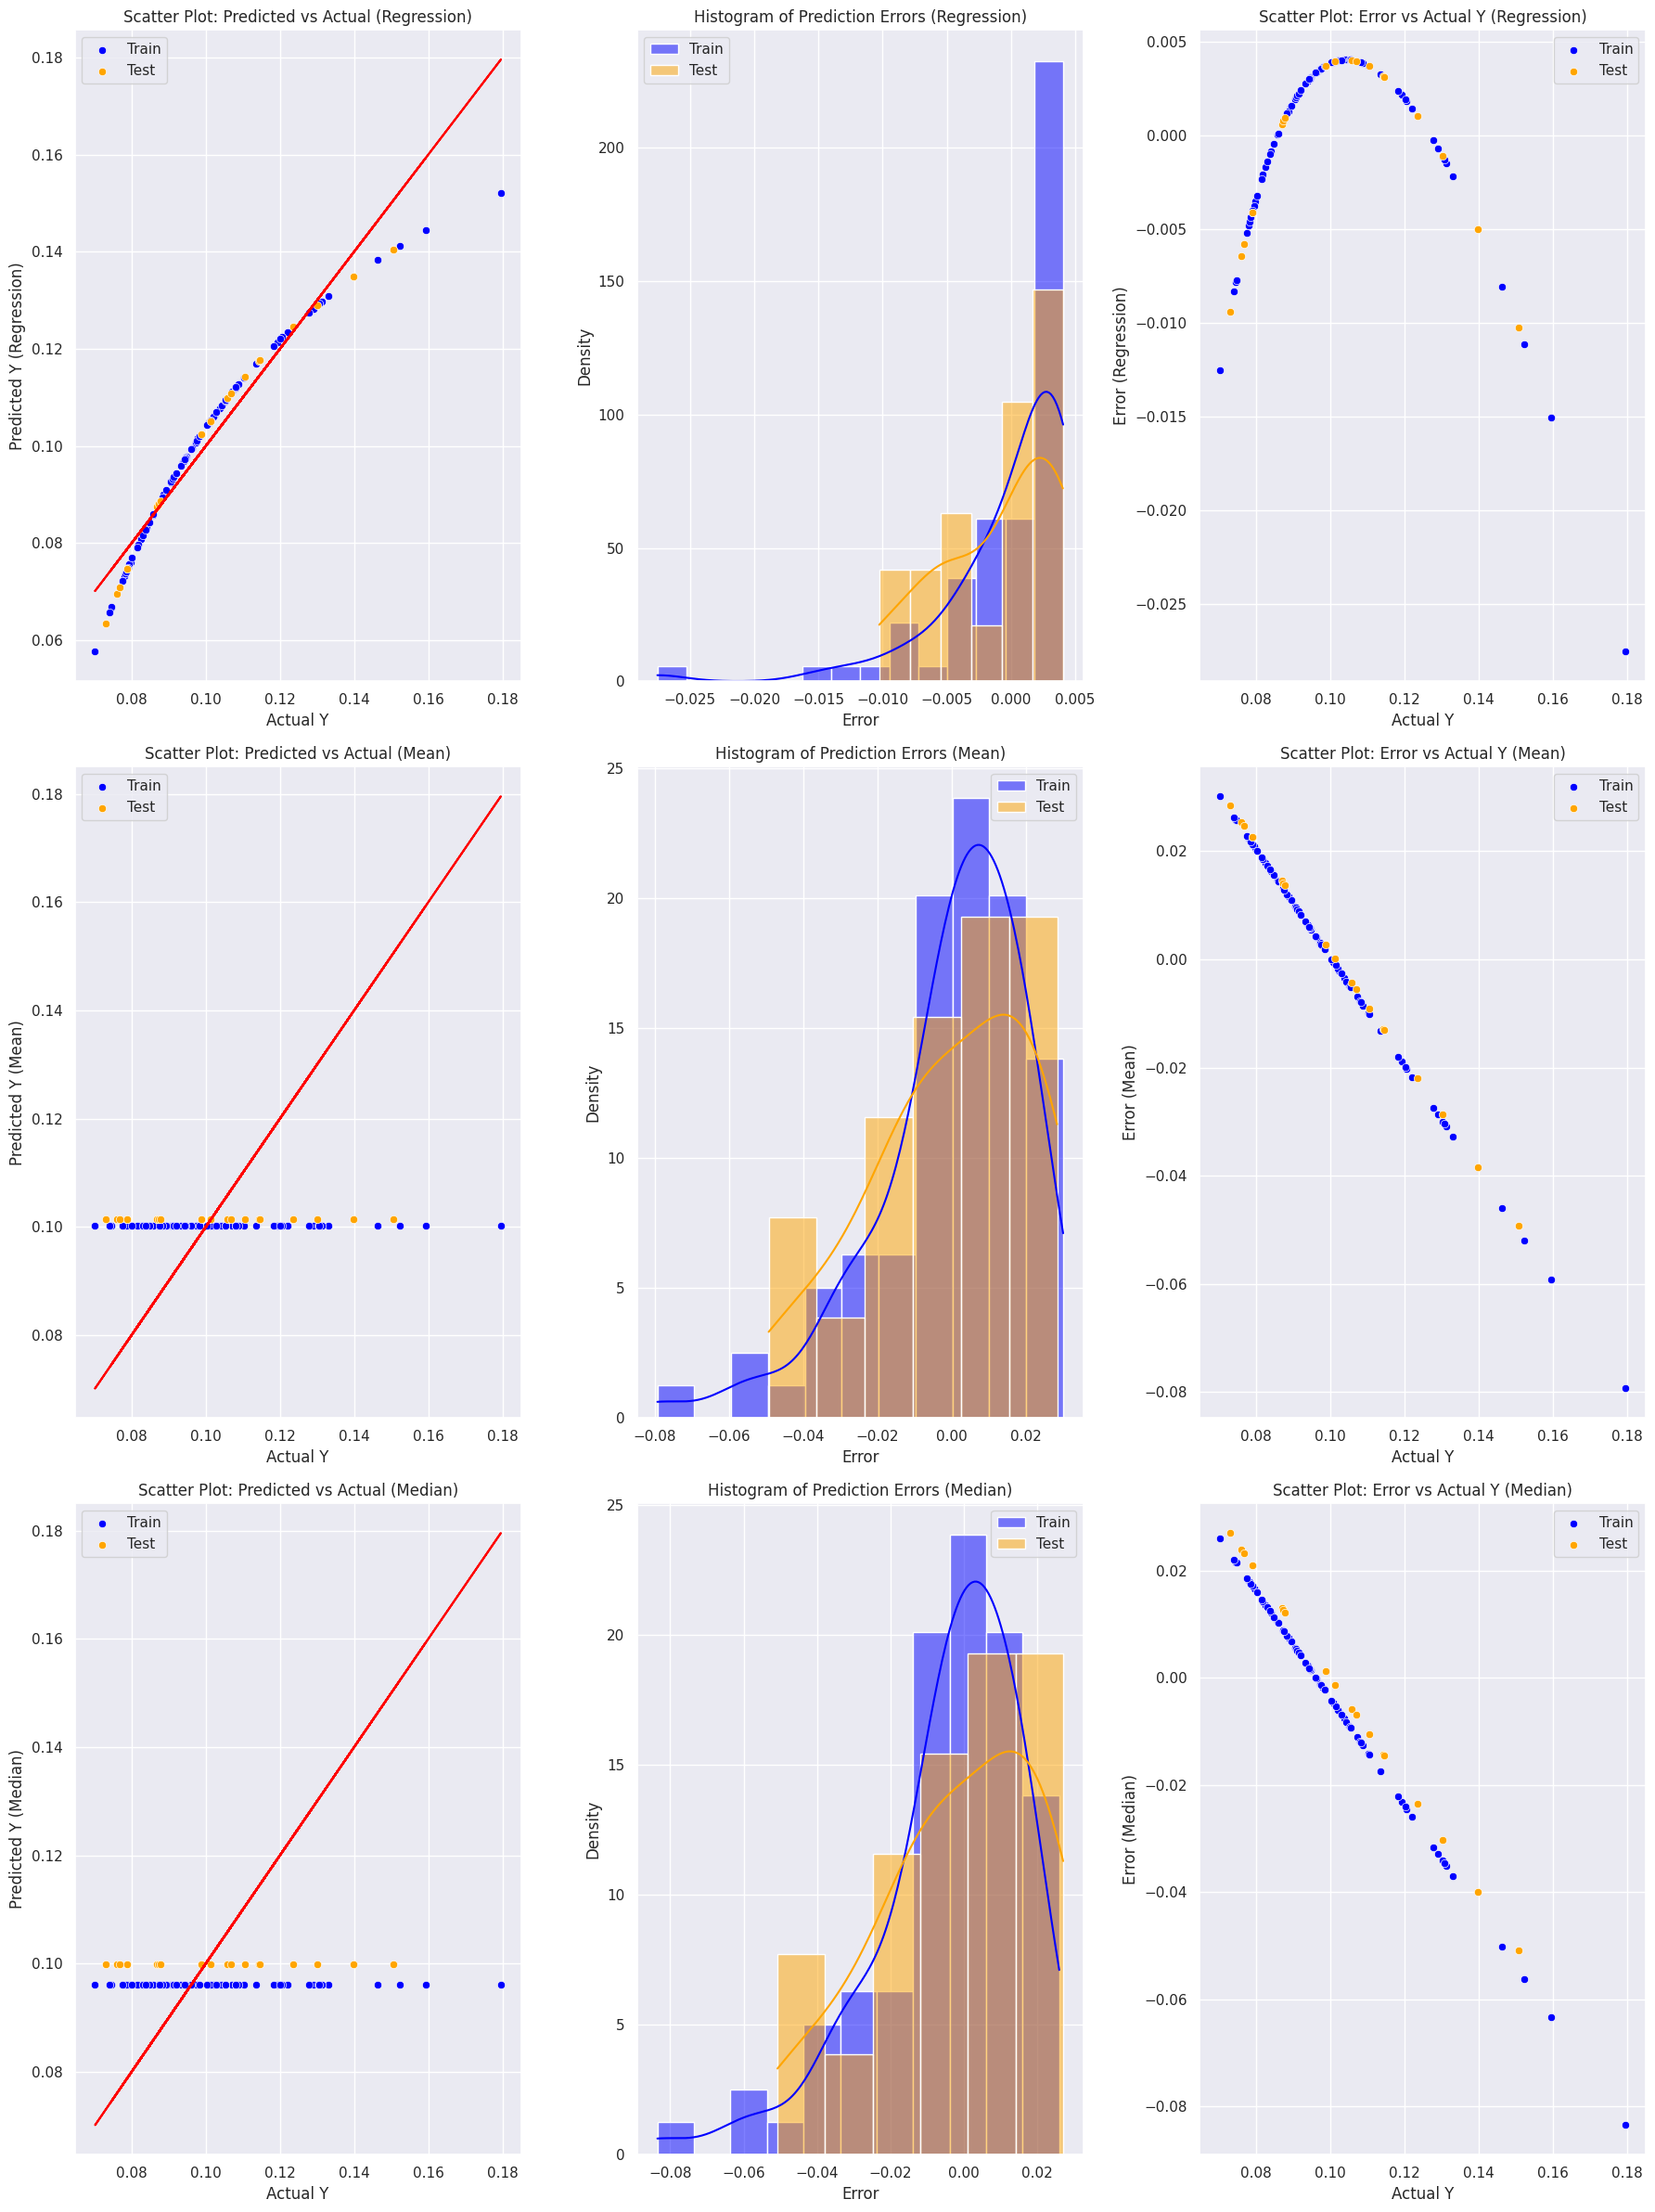

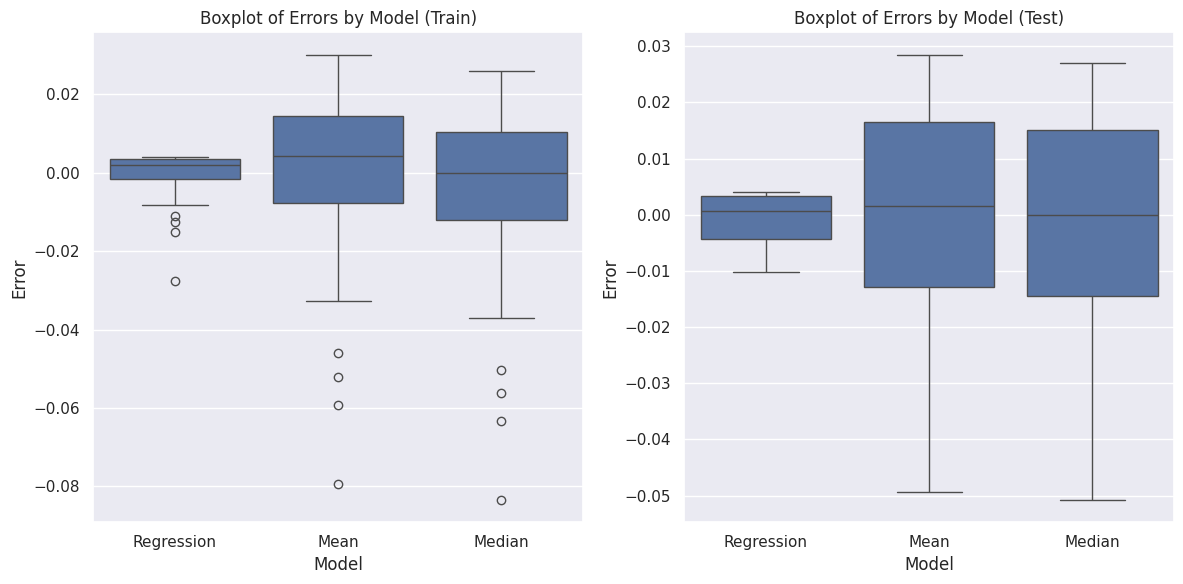


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.0037       0.0037          0.0038       0.0026          2.69        % -28.57         %
Mean       0.0153       0.0136          0.0183       0.0120          19.96       % -12.13         %
Median     0.0148       0.0147          0.0183       0.0121          23.28       % -17.69         %


In [31]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Parece que no esta aproximando bien. **Usemos transformaciones polinomiales de X** (nuestras features o matriz de disenno) para mejorar la prediccion.

Creacion de variable X^1.5
Creacion de variable X^1.3333333333333333
Creacion de variable X^1.25
Creacion de variable X^1.2
Creacion de variable X^1.1666666666666667
Creacion de variable X^1.1428571428571428
Creacion de variable X^1.125
Creacion de variable X^1.1111111111111112


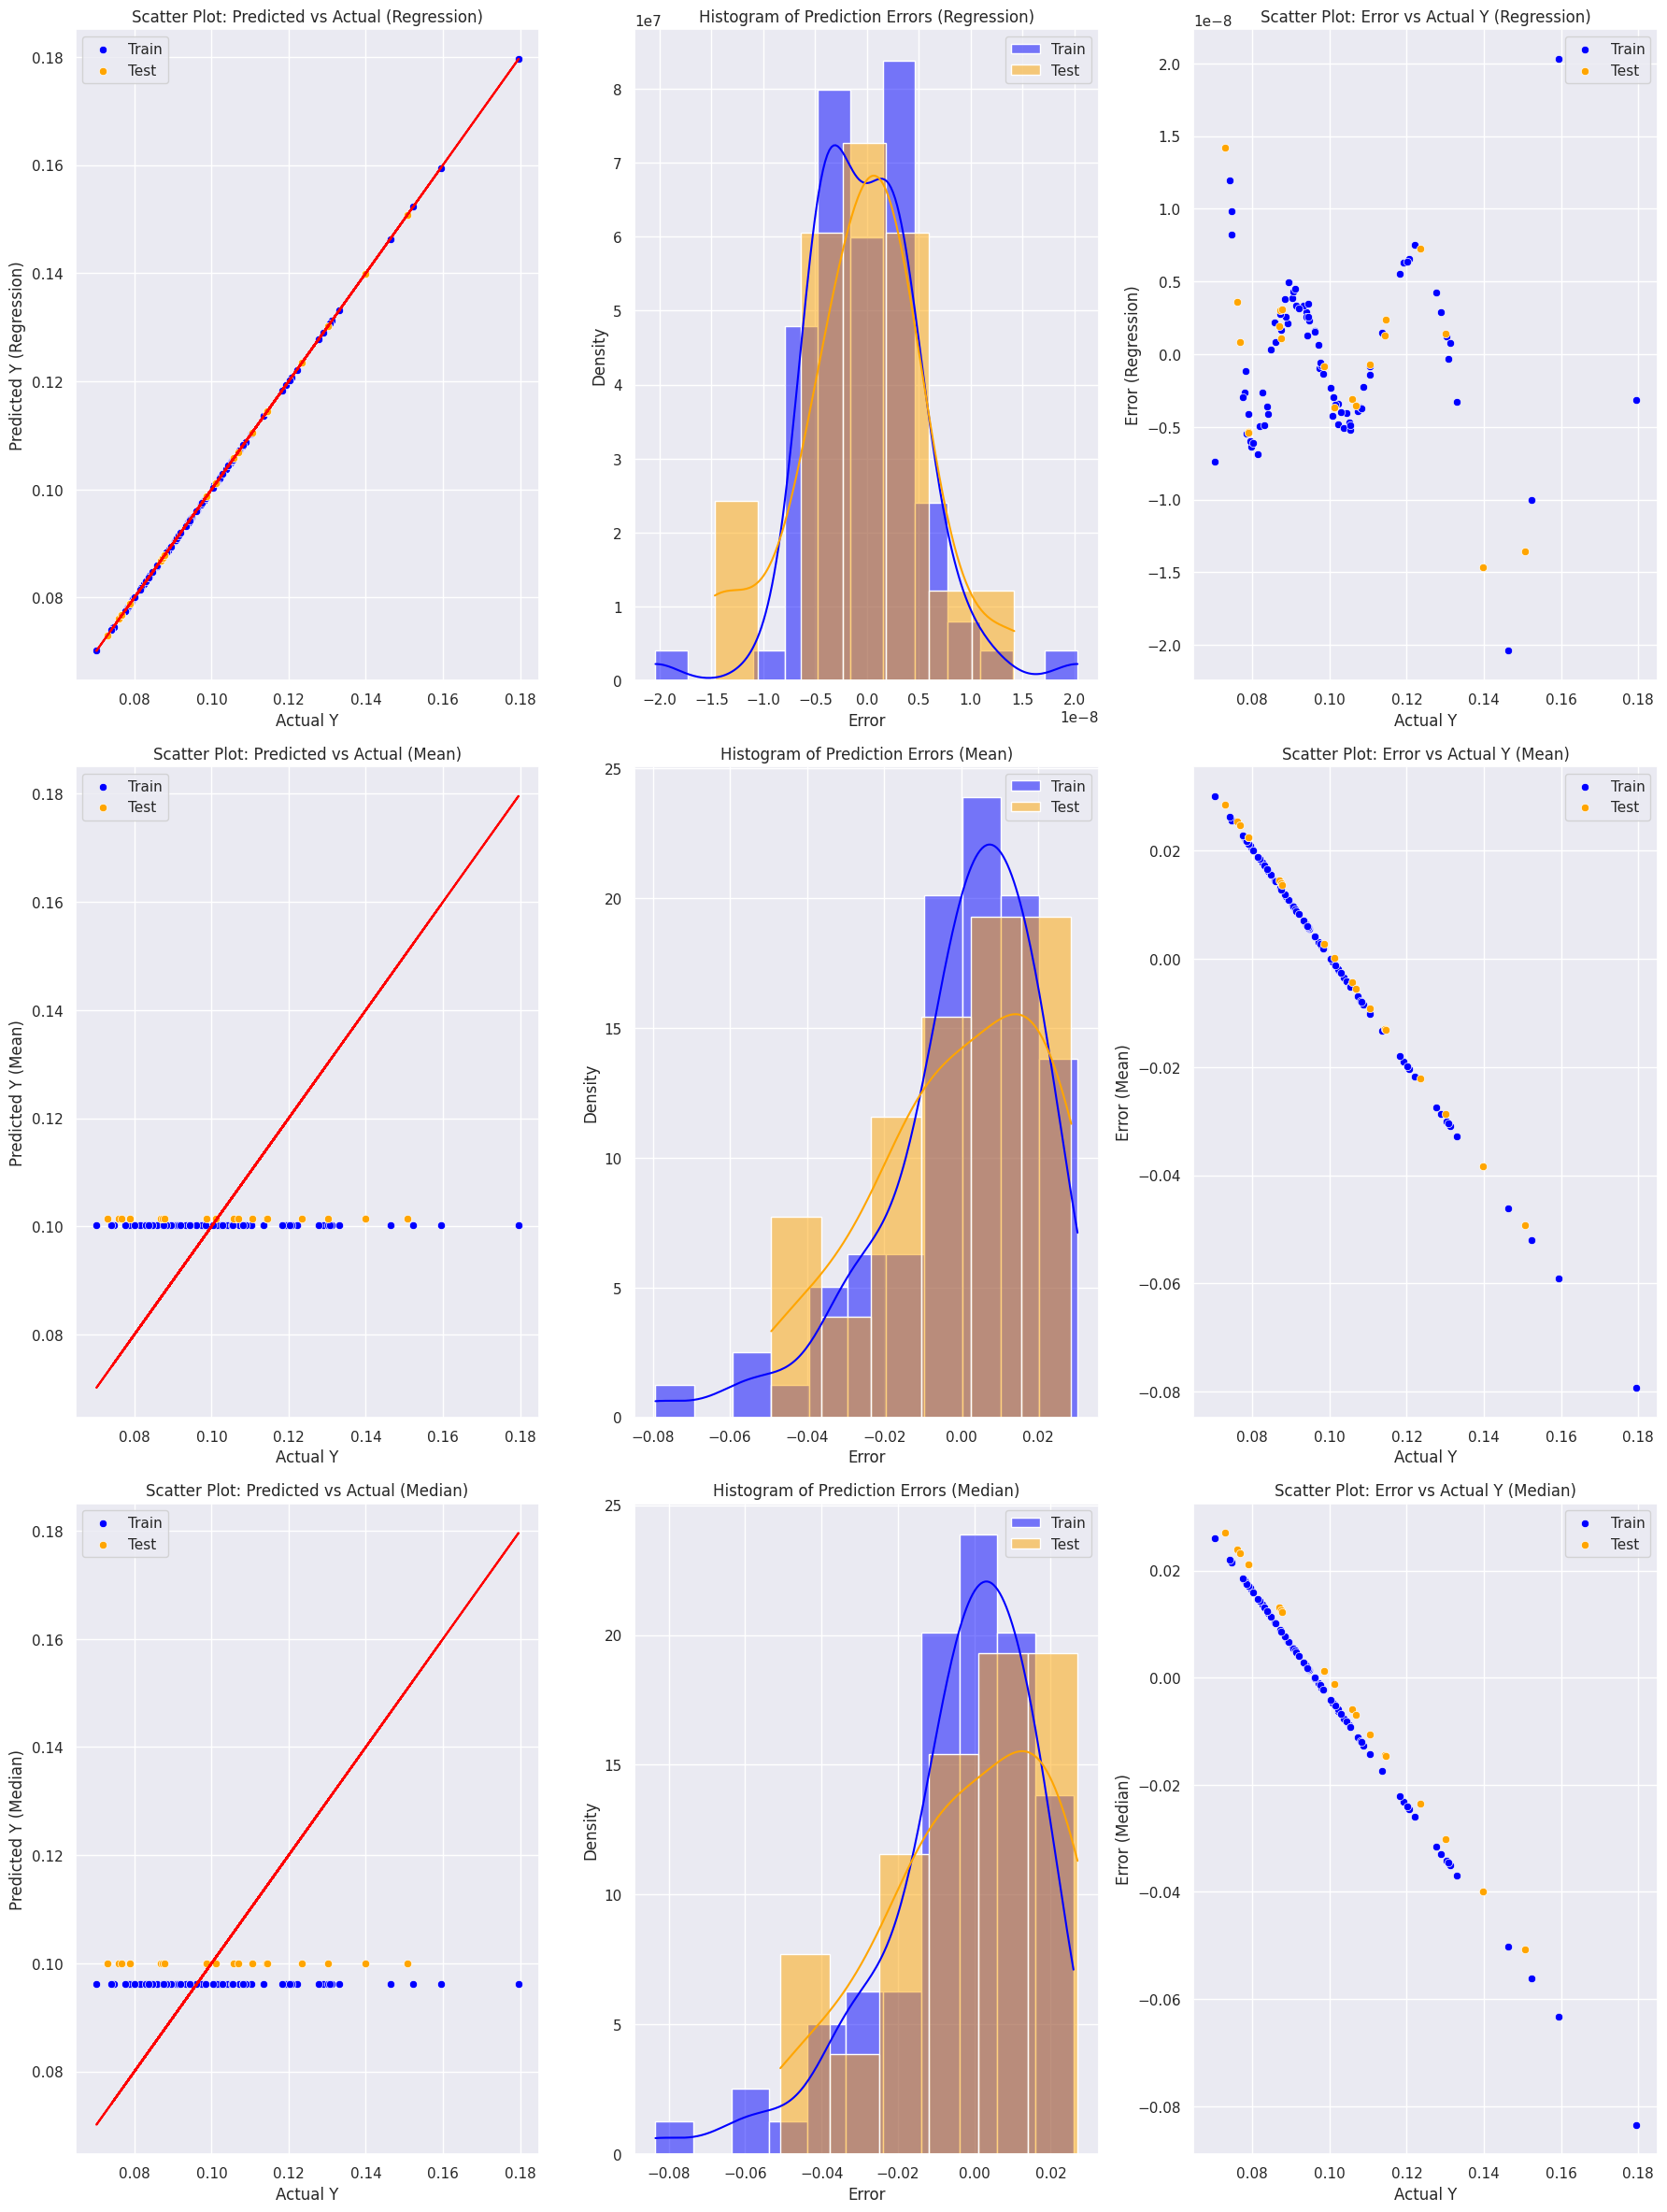

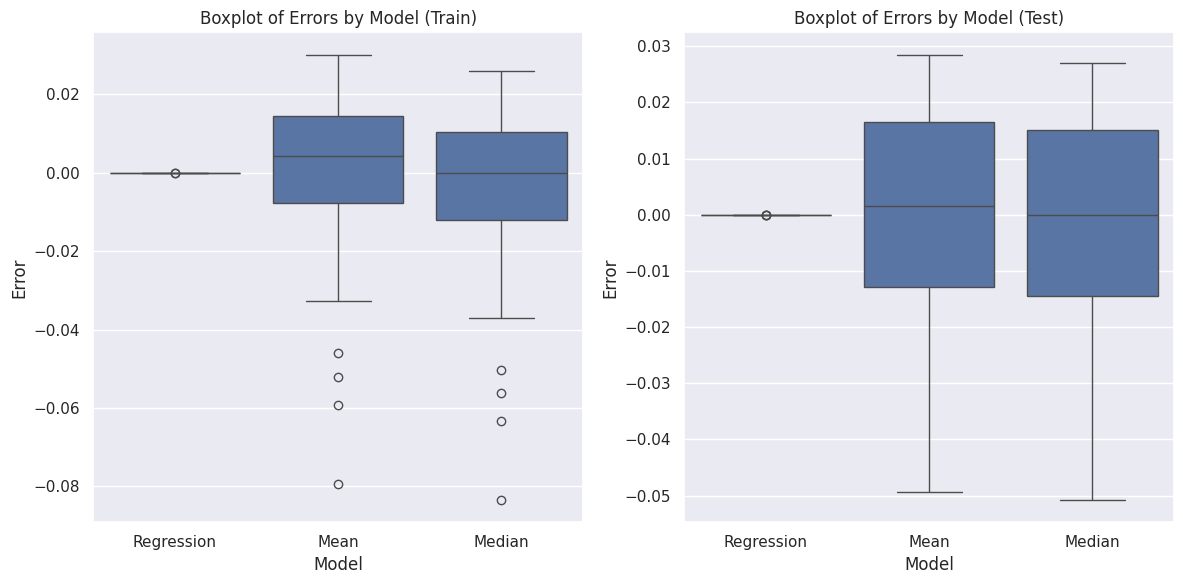


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.0000       0.0000          0.0000       0.0000          9.91        % 26.25          %
Mean       0.0153       0.0136          0.0183       0.0120          19.96       % -12.13         %
Median     0.0148       0.0147          0.0183       0.0121          23.28       % -17.69         %


In [32]:
X2 = X.copy()

# ## Feature Eng
X2 = np.reshape(X2, (N,1))
# Crea un Polinomio
for n in range(2,10):
    X2 = np.concatenate((X2,np.power(X2[:,0],1+1/n).reshape((N,1))), axis=1)
    print(f'Creacion de variable X^{1+1/n}')
foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Podemos ver que nuestro error de prediccion mejora comparado con no hacer ninguna ingenieria de variables.

Ahora salgamonos del mundo polinomial y creemos una transformacion perfecta de nuestras variables X para predecir. Esto requiere que nos salgamos del mundo del teorema de `stone-weistrass`

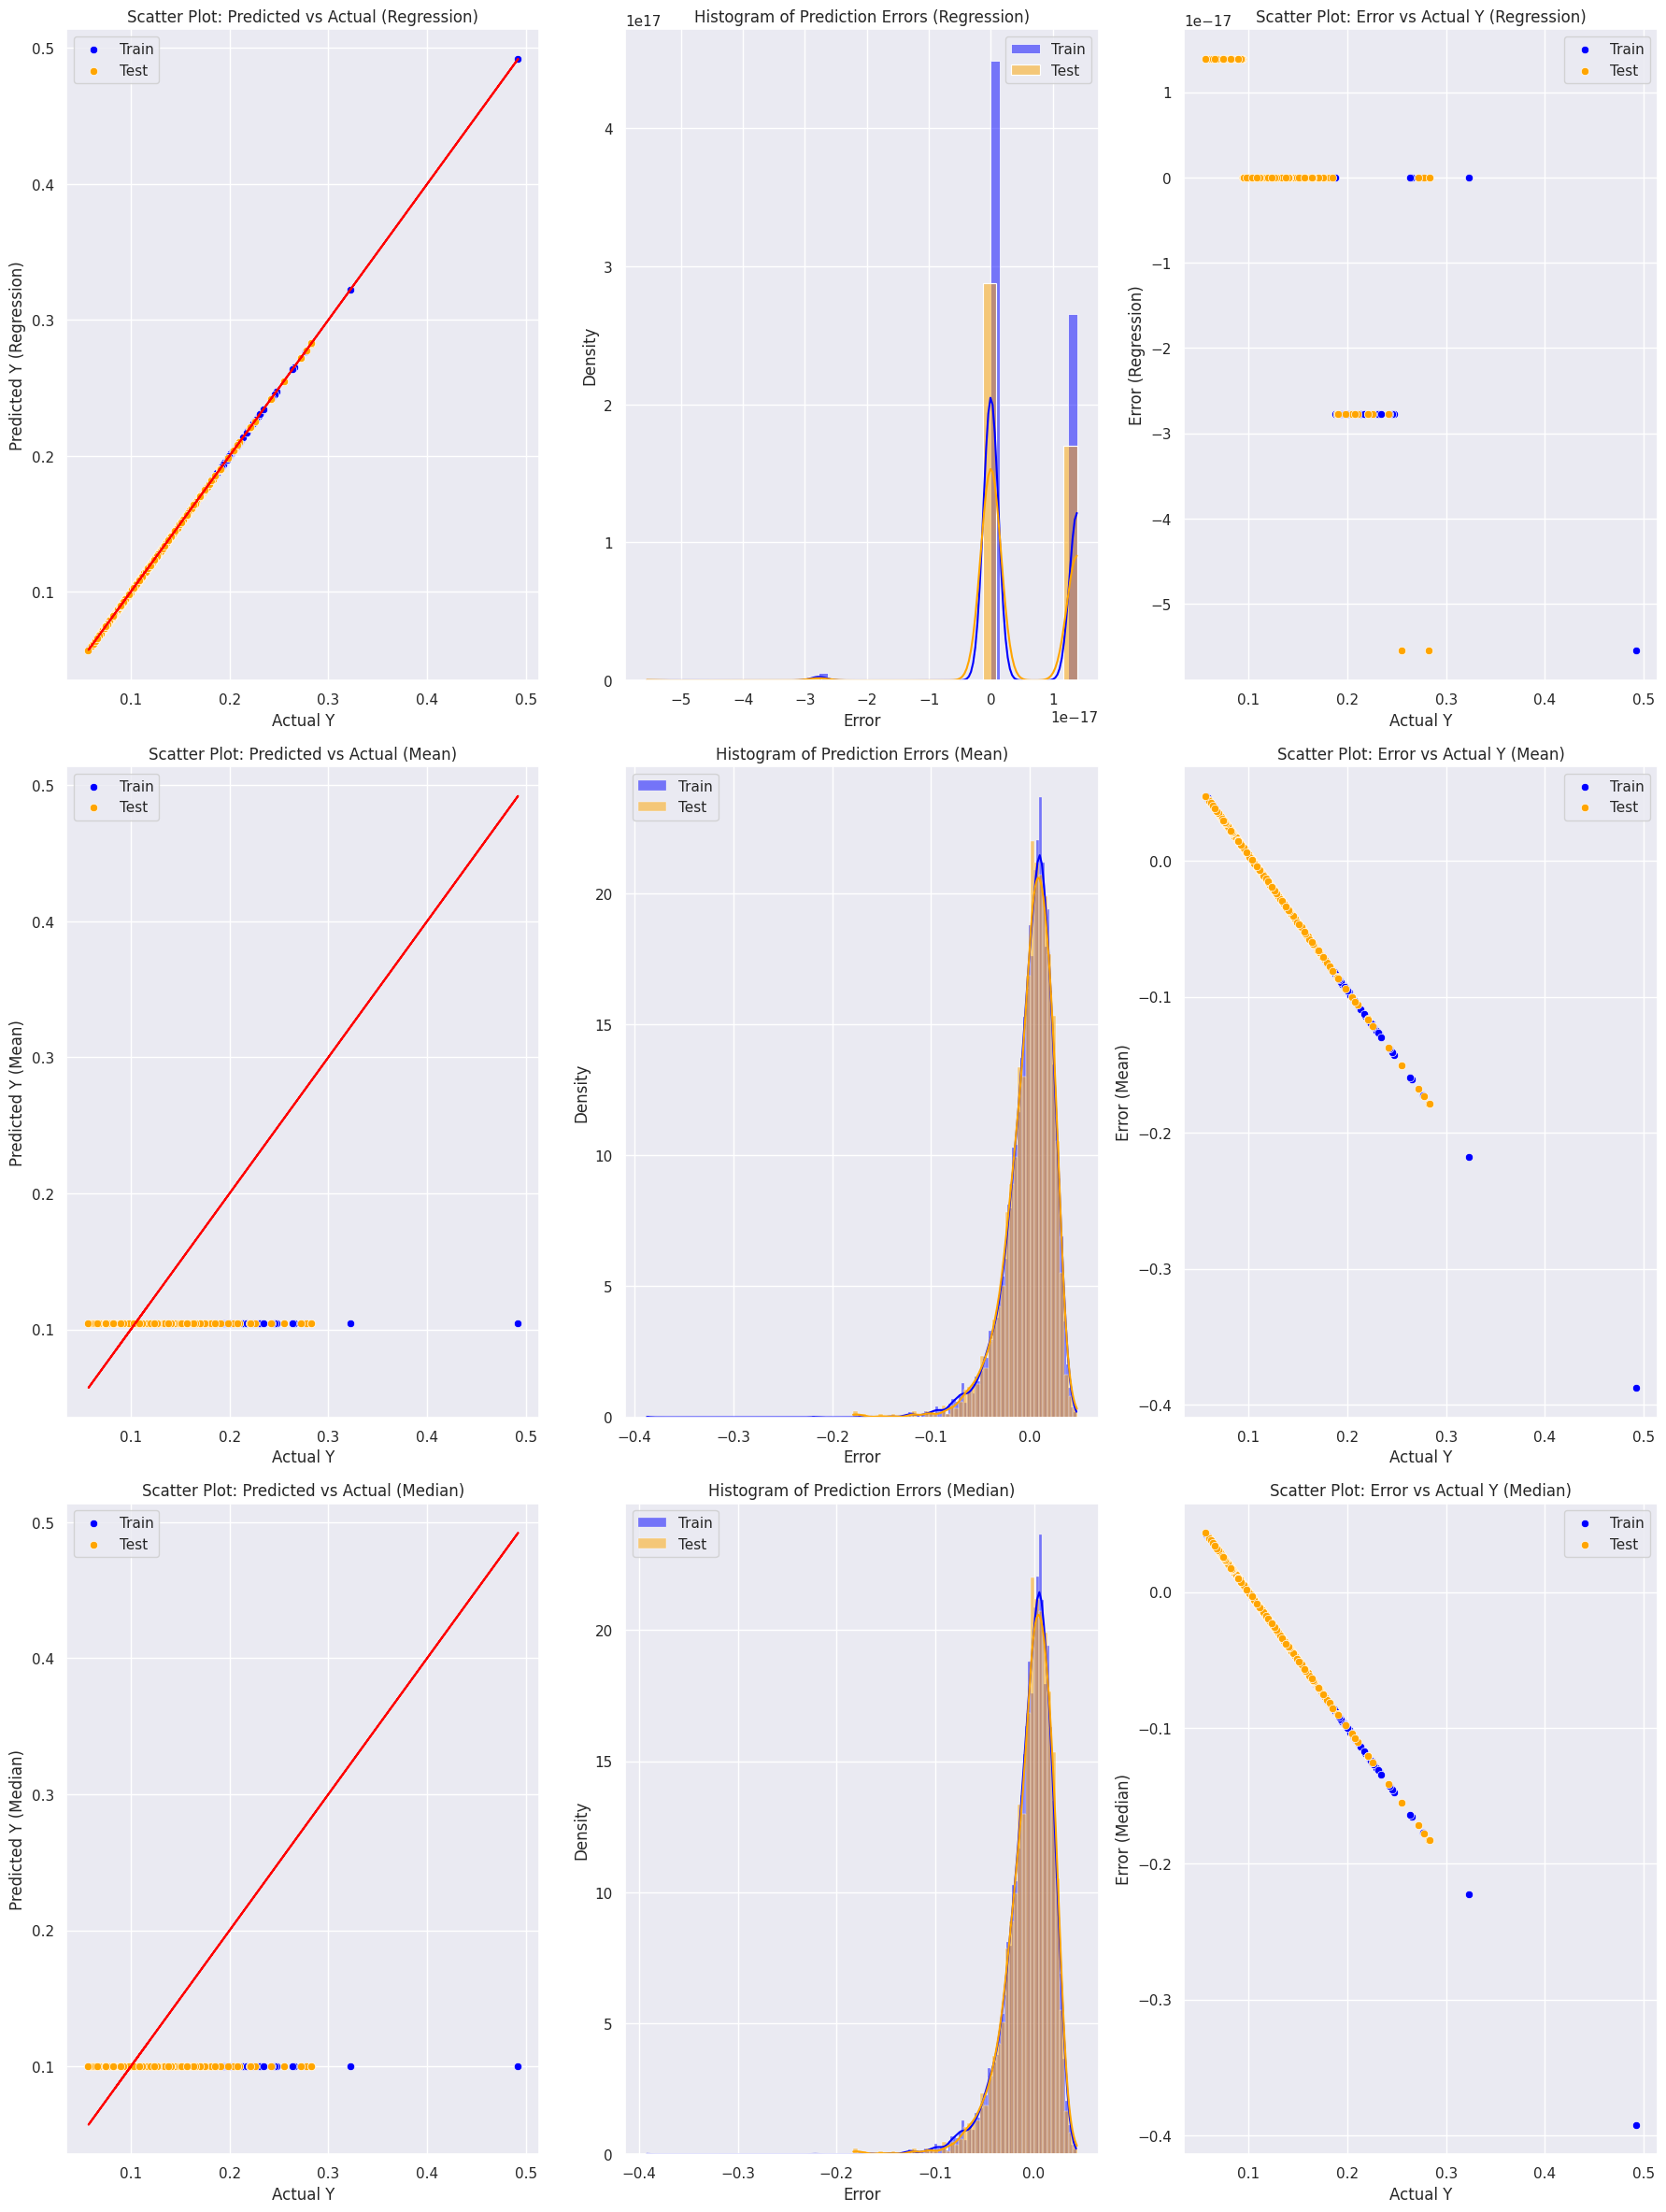

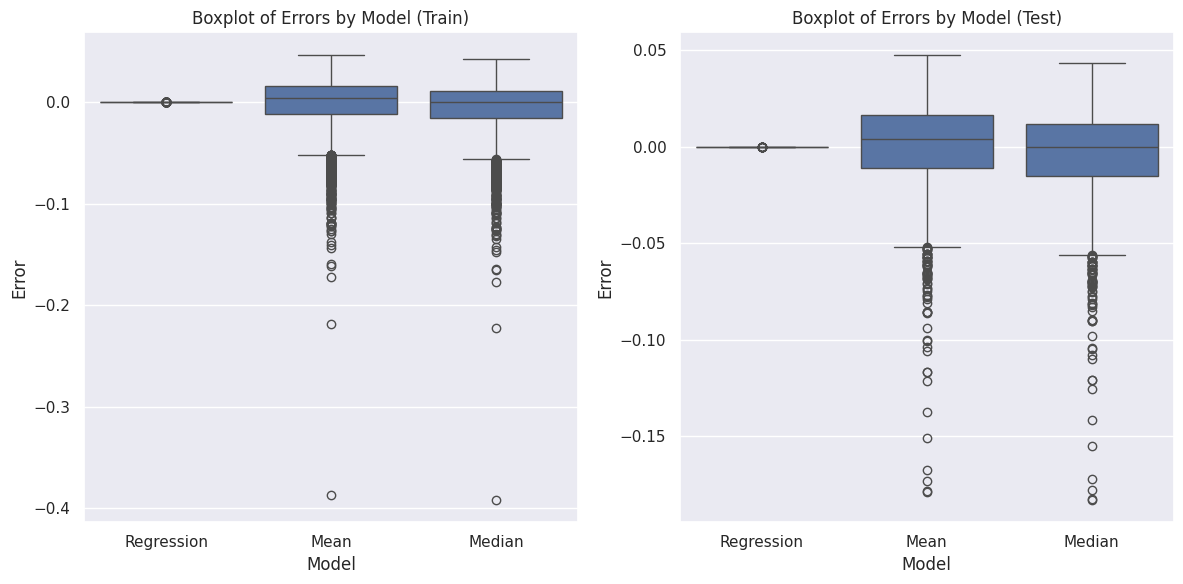


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.0000       0.0000          0.0000       0.0000          0.03        % 1.52           %
Mean       0.0178       0.0165          0.0177       0.0167          -0.36       % 1.21           %
Median     0.0174       0.0176          0.0173       0.0176          -0.36       % 0.49           %


In [11]:
X3 = X.copy()
# ## Feature Eng
X3 = 1/X3
foo_regresion(X3,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Ahora creemos una funcion mas compleja. En la funcion anterior se veia claramente una relacion de tipo $1/x$ al graficar, pero esto no es comun en el mundo real donde tenemos decenas, cientos, miles o millones de variables que afectan a $Y$. No es facil graficar una o dos variables a la vez para ver como afectan a $Y$, ademas de que puede haber efectos cruzados/combinados. Por ello tratemos de crear una funcion compleja en la cual sea dificil adivinar la relacion exacta entre $Y$ y $X$, la idea es que sea dificil de adivinar y tengamos que recurrir a ingenieria de variables no tan perfecta o educada.

$y = x + ln(x) + xln(x) + 1/x + x^{1.3}$

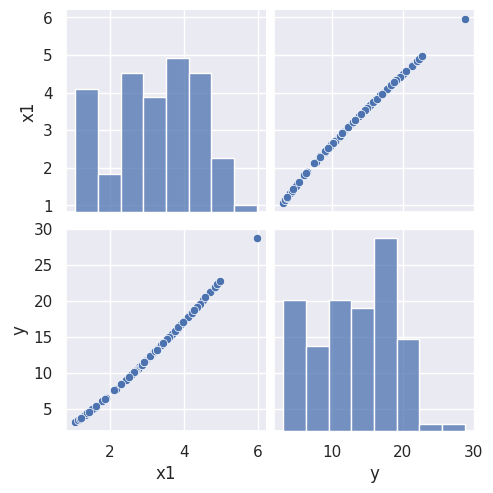

In [33]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 100
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))/100

# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3)
Y = Y.reshape(-1)


df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

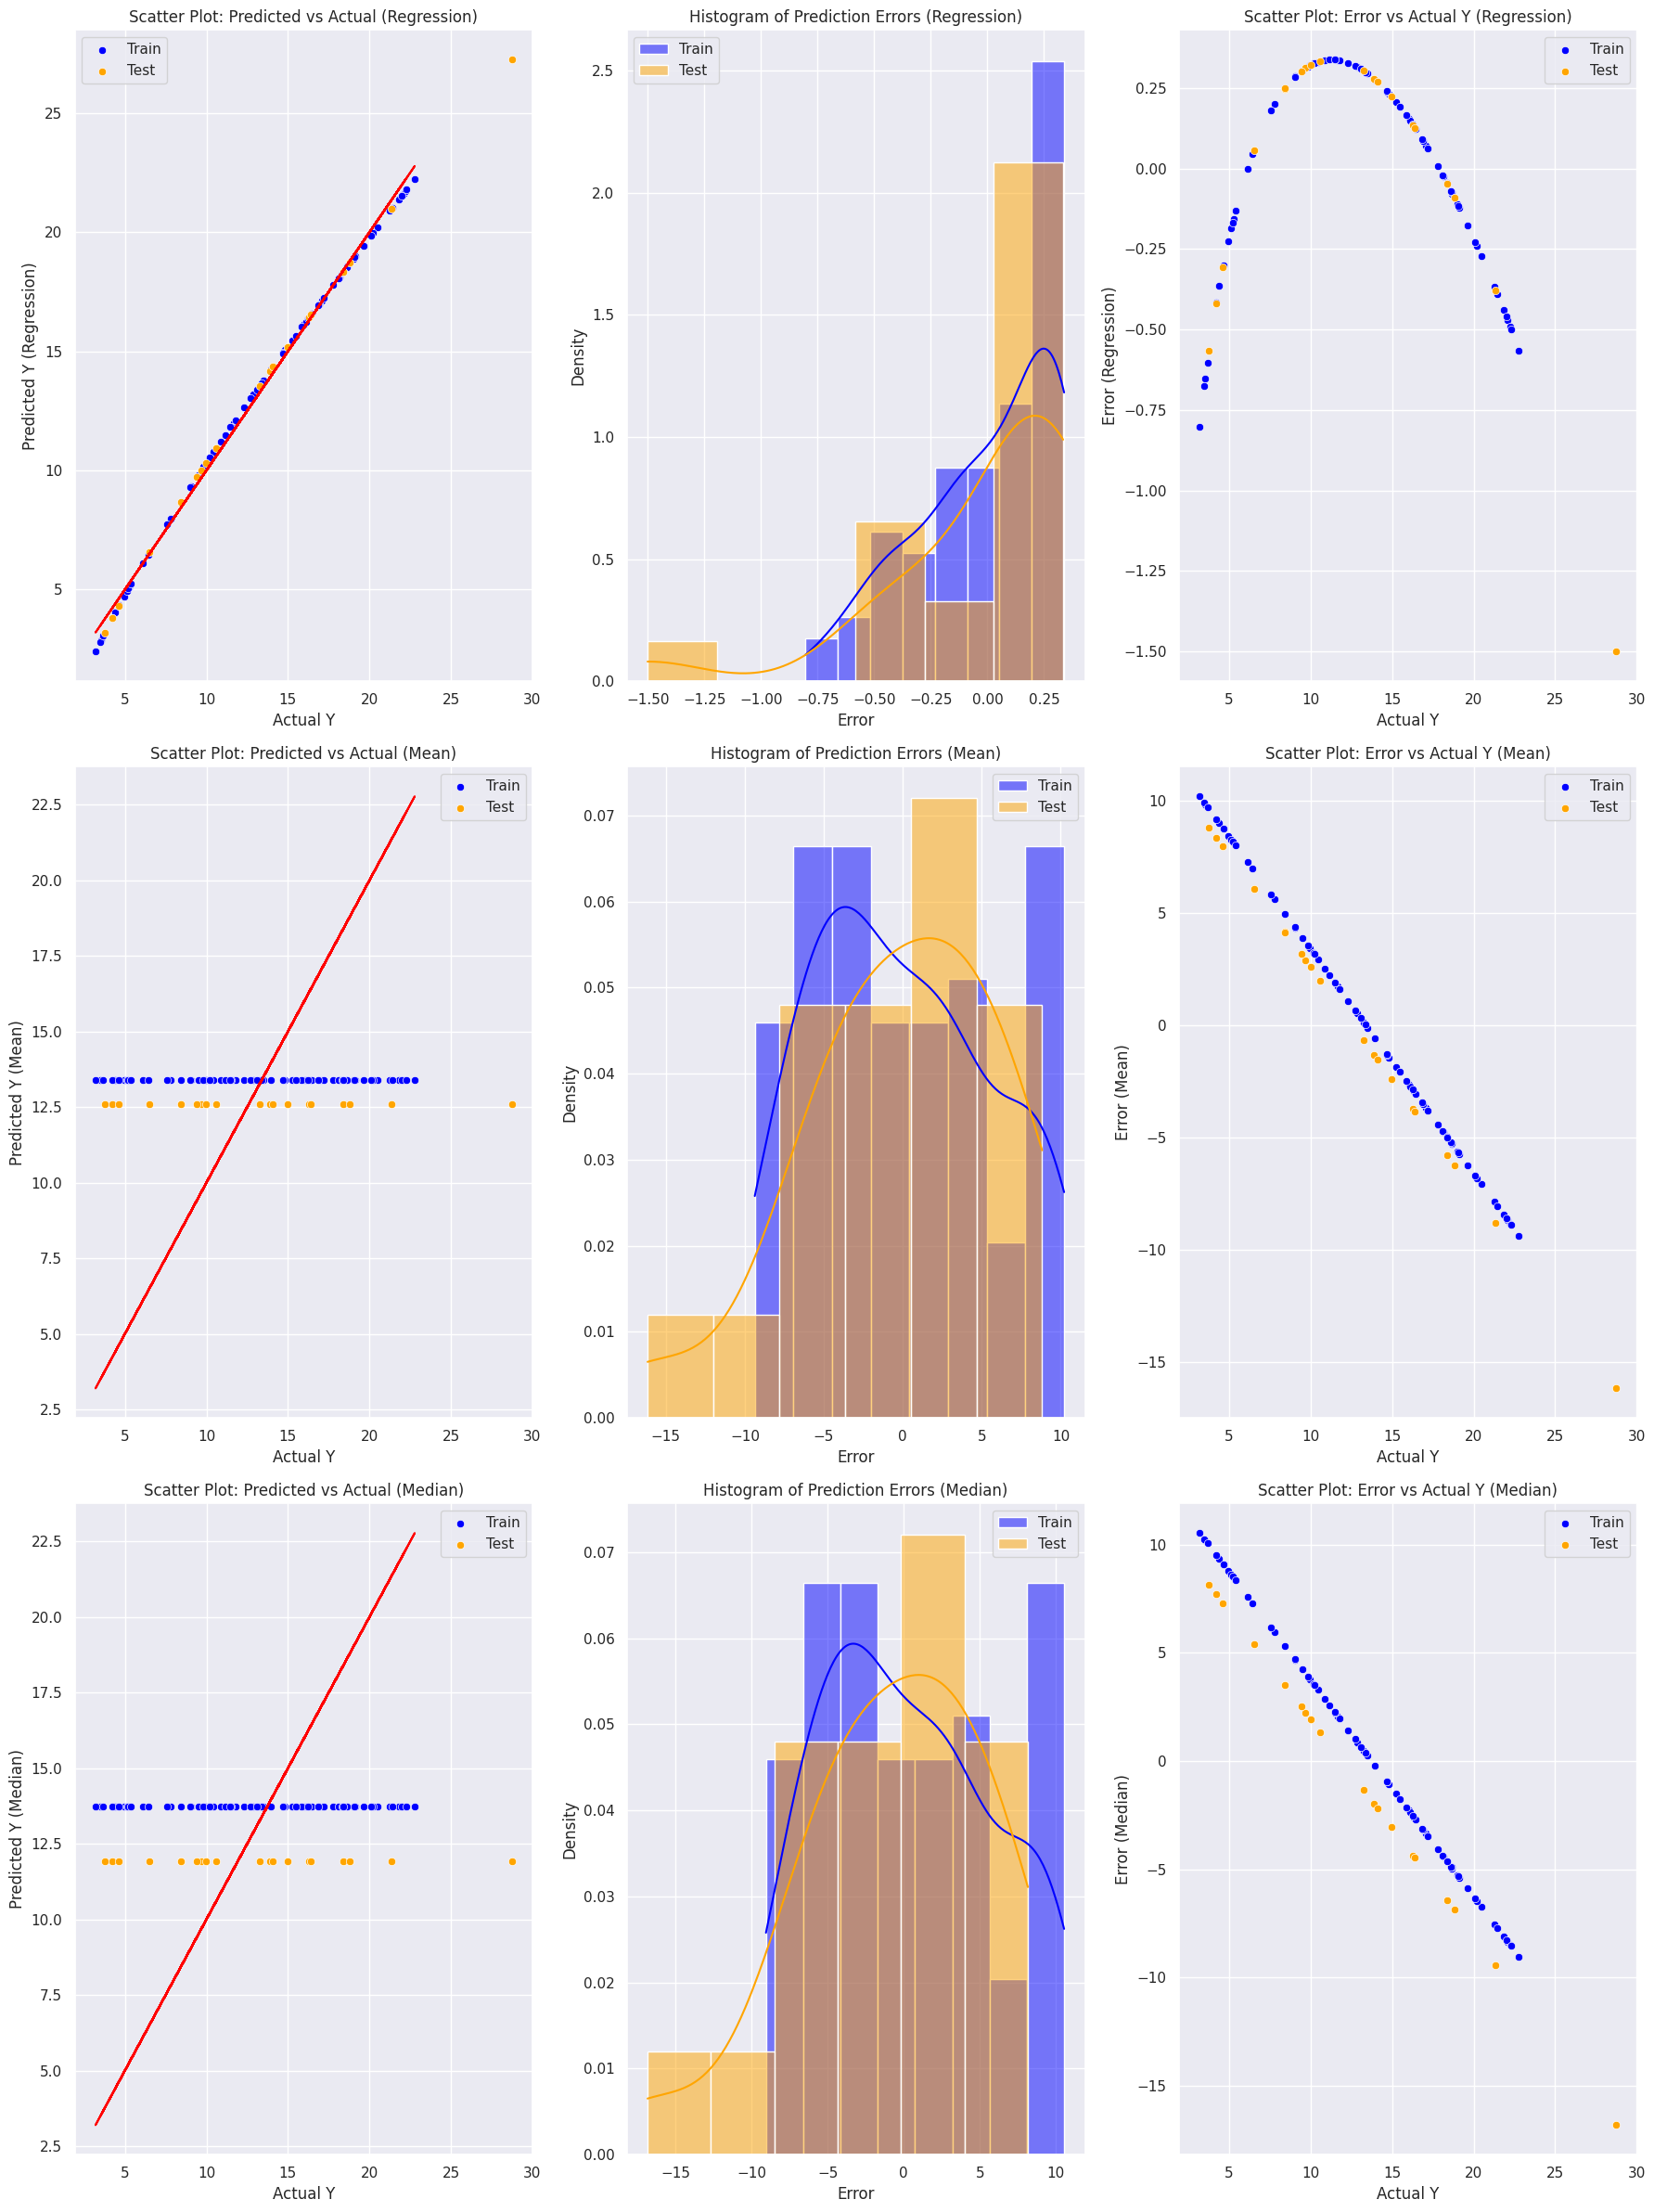

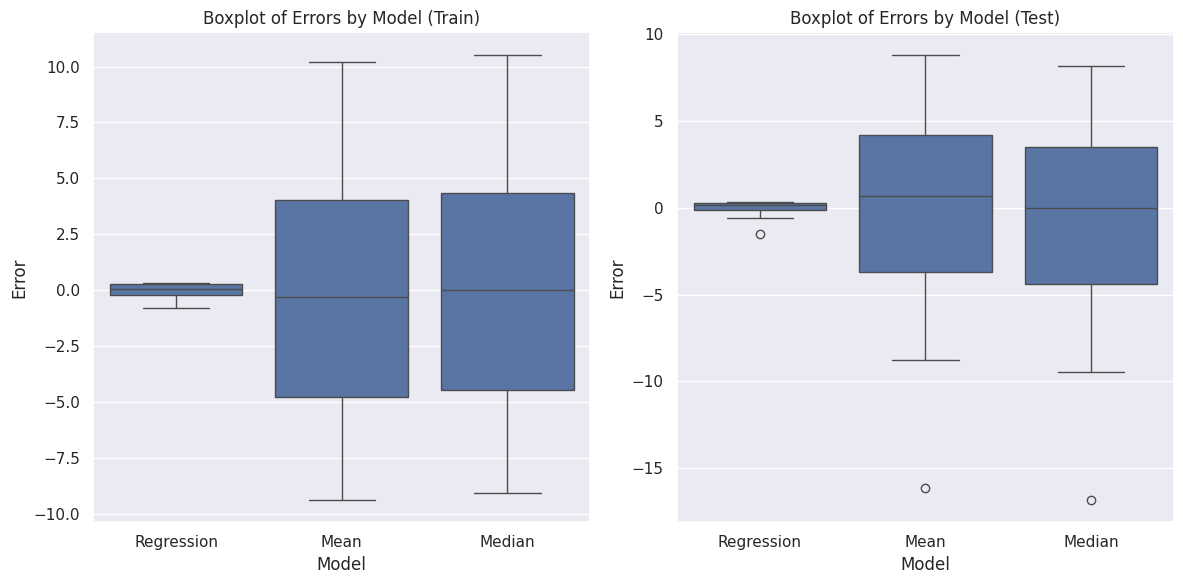


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.2587       0.1614          0.3234       0.2967          25.03       % 83.80          %
Mean       4.8683       2.9188          5.0253       3.5743          3.23        % 22.46          %
Median     4.8661       2.9400          5.0253       3.6363          3.27        % 23.69          %


In [34]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Creacion de variable X^[2, 3, 4, 5]


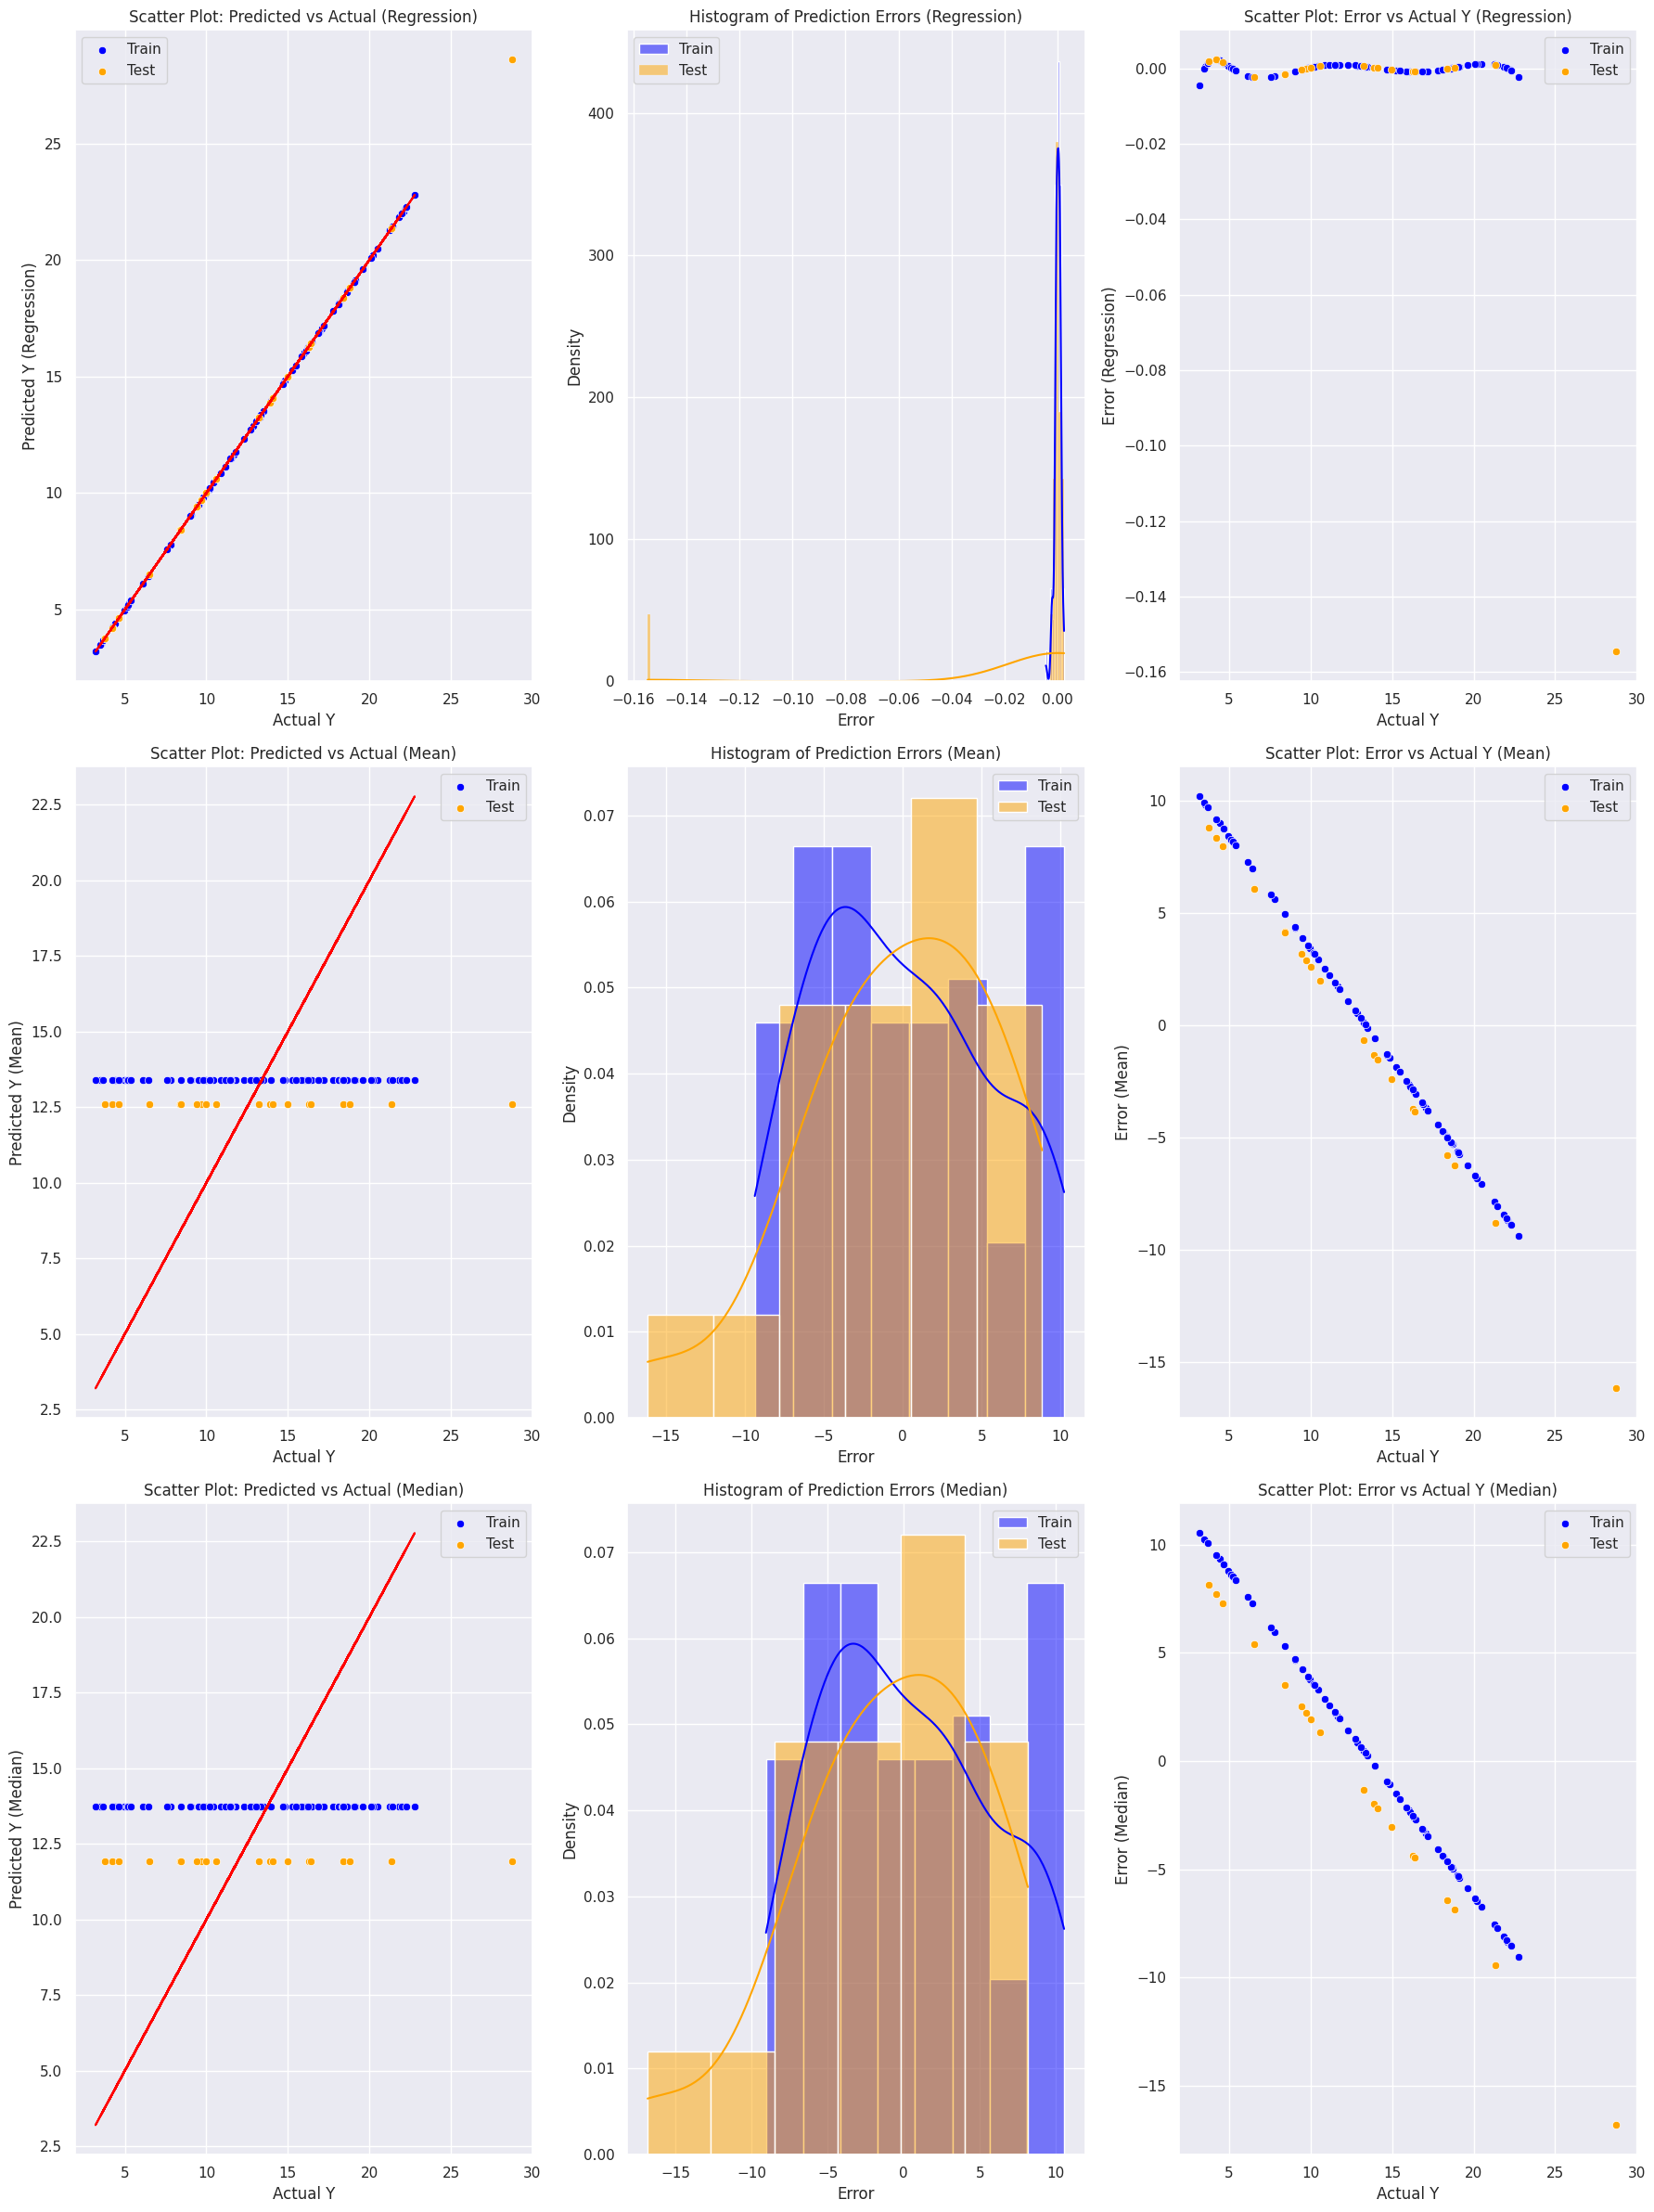

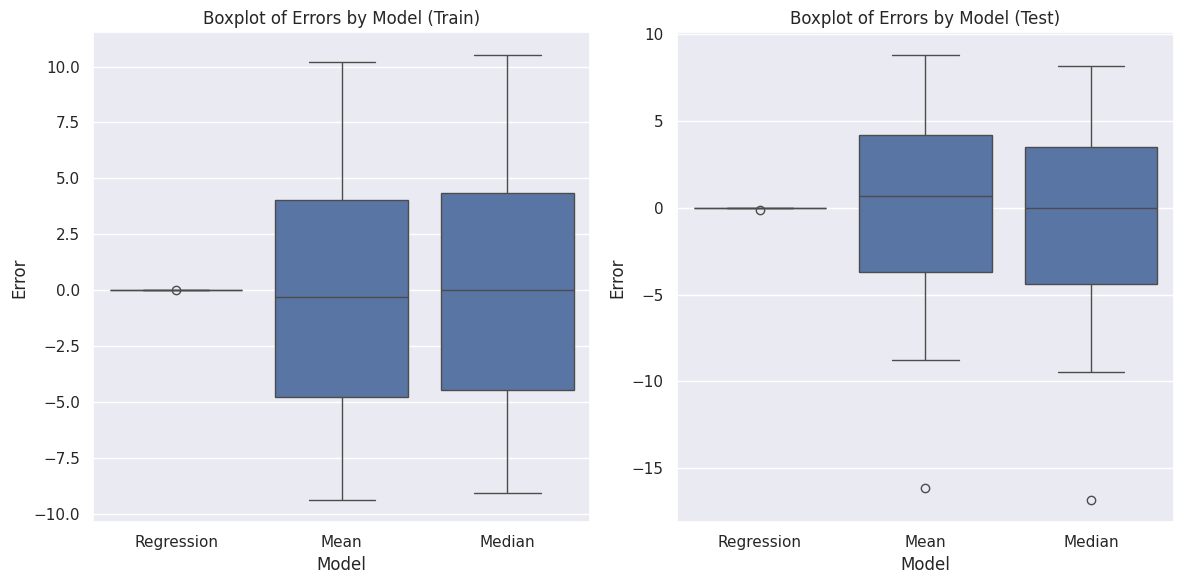


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.0008       0.0007          0.0086       0.0335          963.85      % 4566.24        %
Mean       4.8683       2.9188          5.0253       3.5743          3.23        % 22.46          %
Median     4.8661       2.9400          5.0253       3.6363          3.27        % 23.69          %


In [35]:
#Ingenieria de Variables
X2 = np.reshape(X, (N,1))
# Lista para guardar exponentes del polinomio.
power = [1 + n for n in range(1,5)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

print(f'Creacion de variable X^{power}')

foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Vemos que la prediccion es decente con el polinomio, parece que es bastante bueno, pero veamos que pasa con funciones ams complejas como las periodicas.

## Funciones Periodicas

$ y = sin(x) $

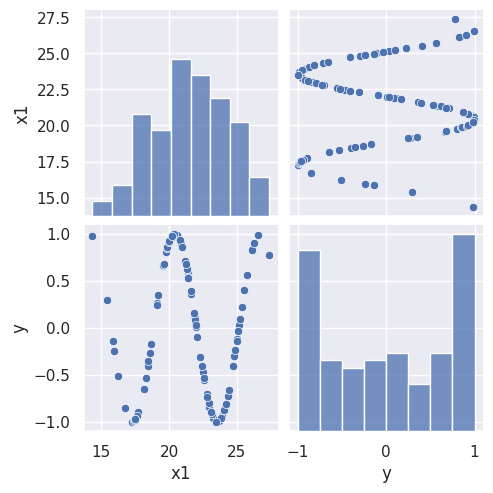

In [36]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 100
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.normal(1,3,size=(N,1)) + 20
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

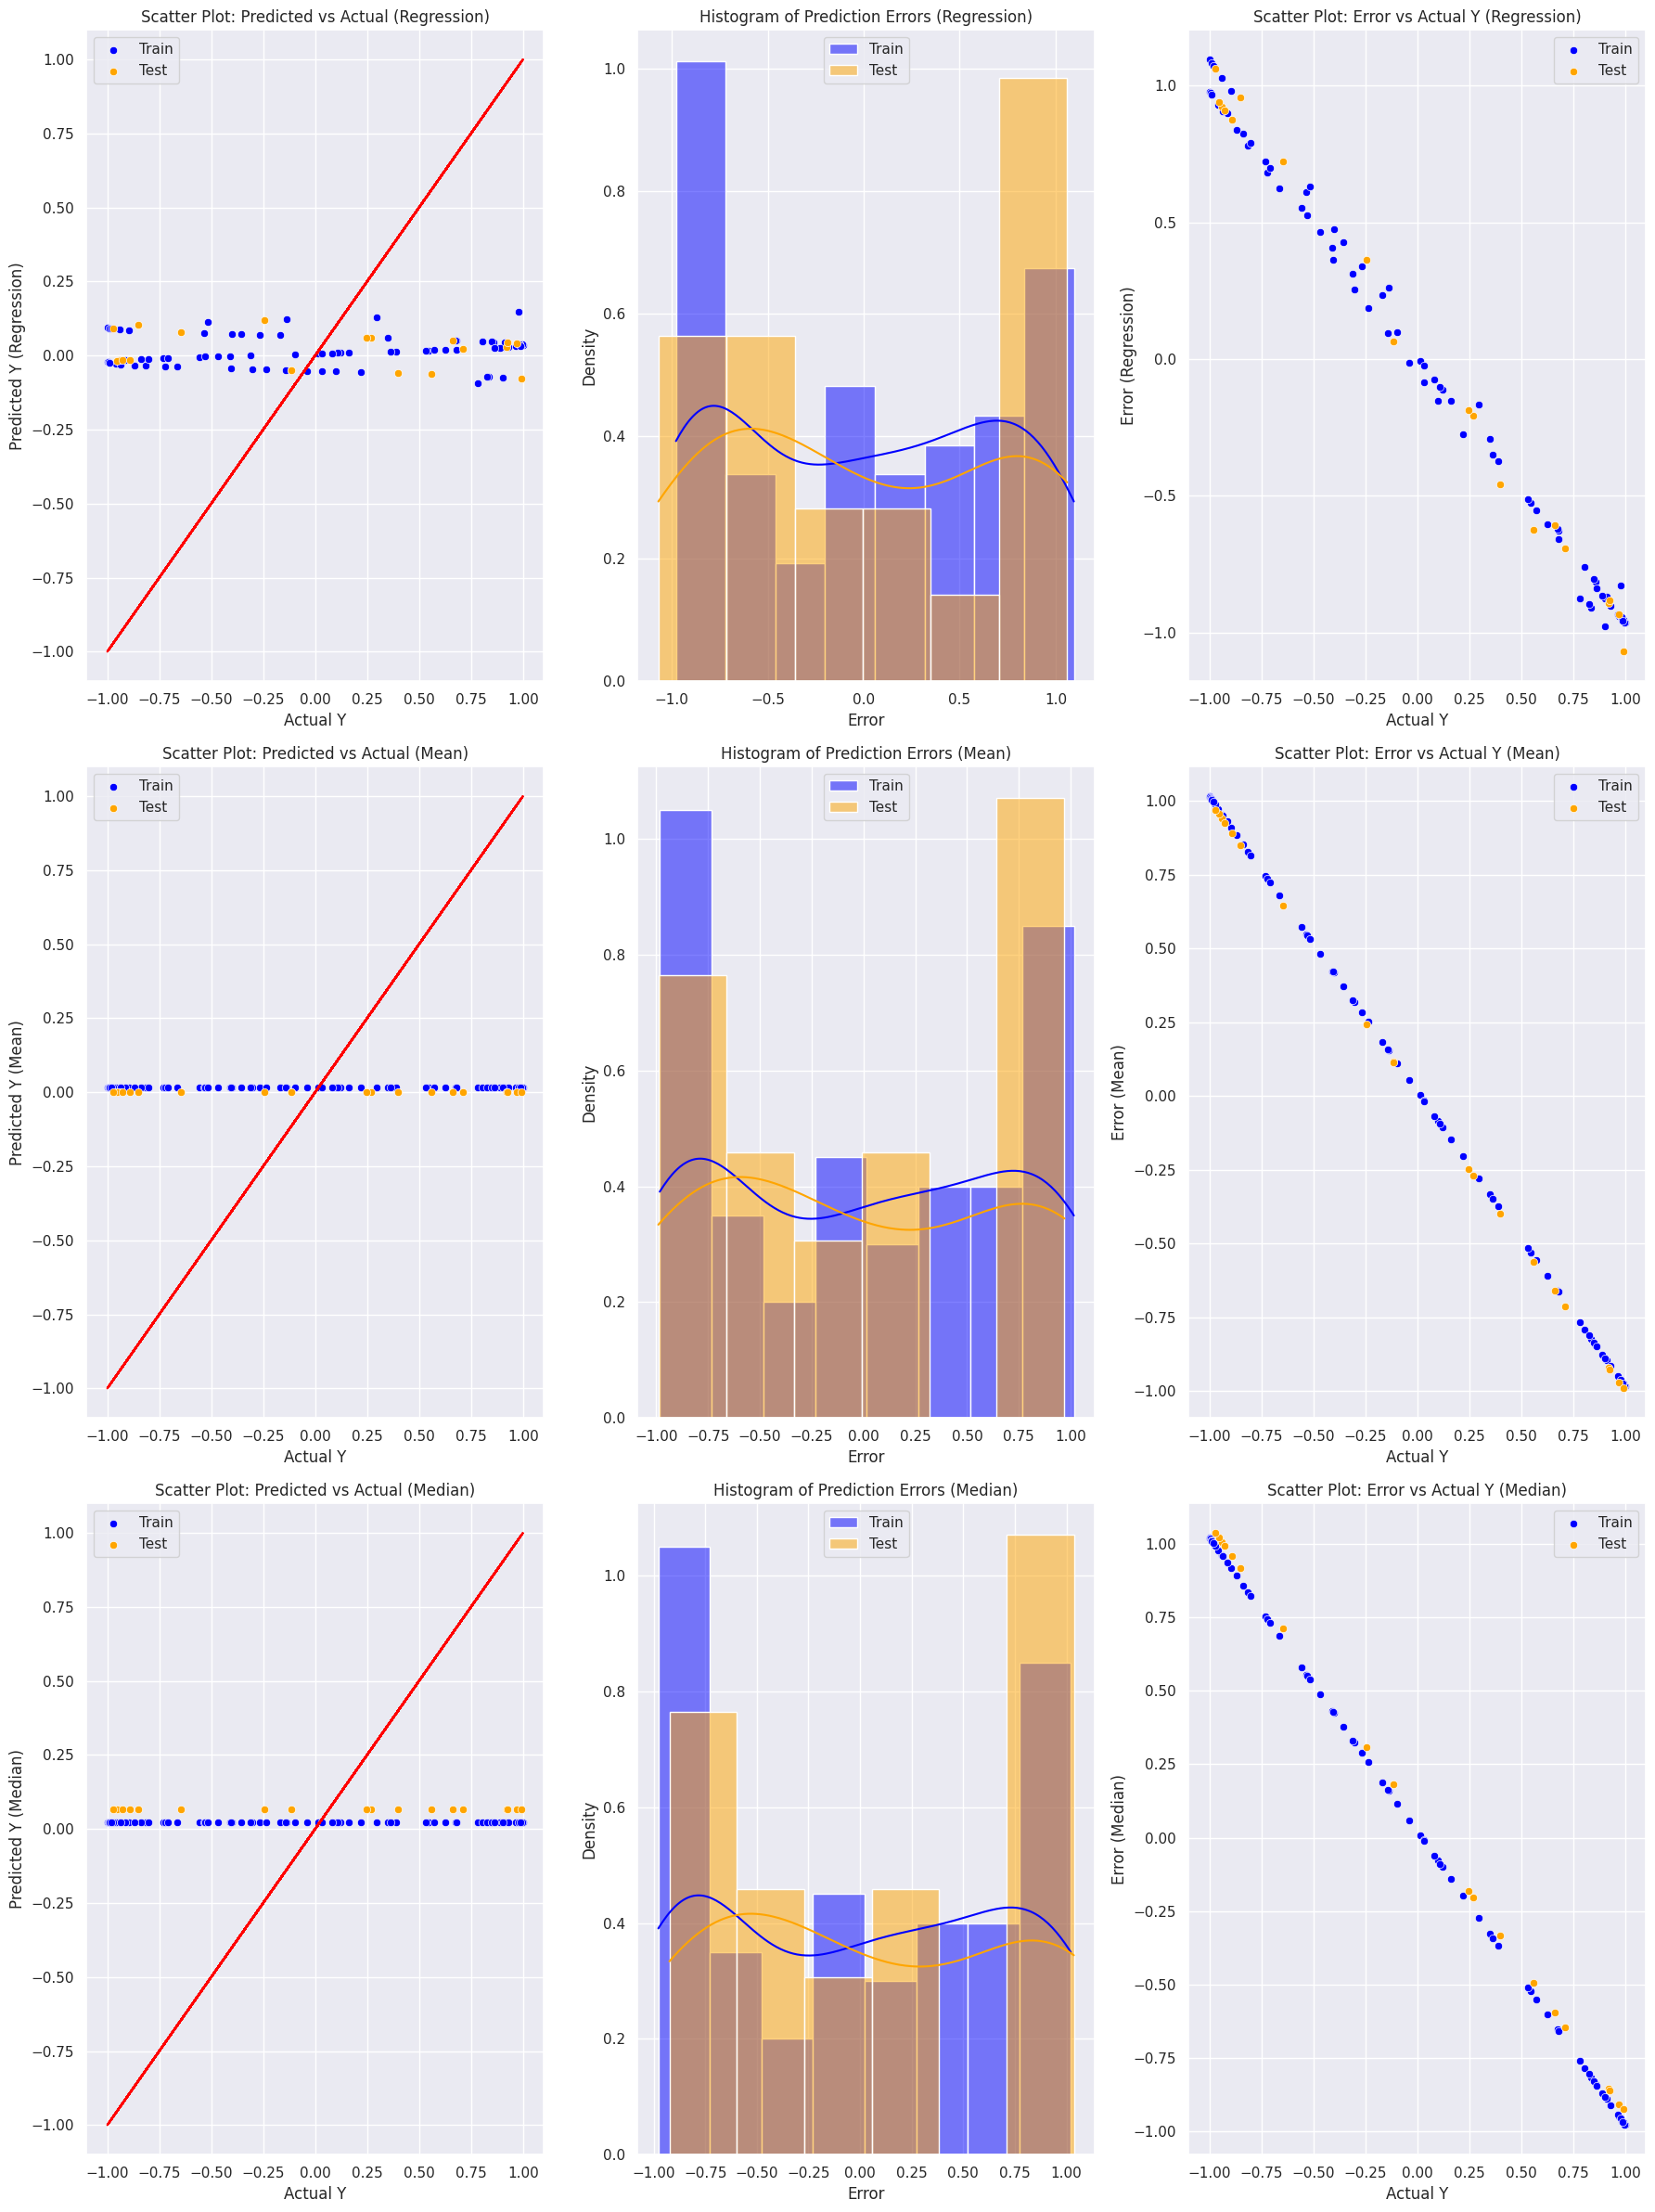

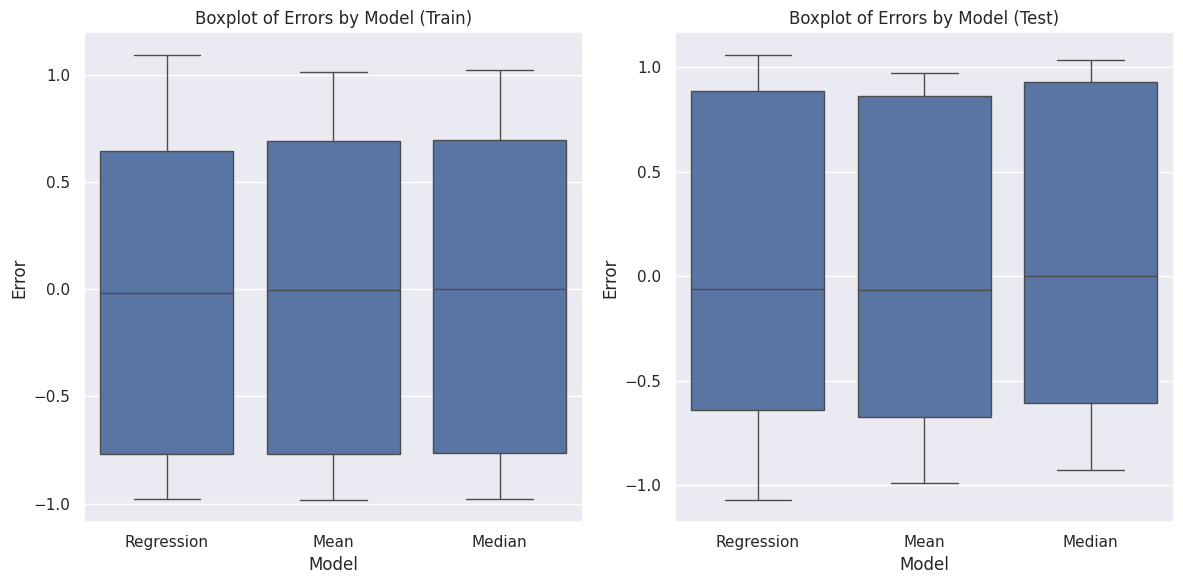


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.6272       0.3249          0.6717       0.3257          7.10        % 0.24           %
Mean       0.6286       0.3262          0.6654       0.3115          5.86        % -4.51          %
Median     0.6286       0.3262          0.6654       0.3184          5.86        % -2.41          %


In [37]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

La prediccion es bastante mala, creemos un polinomio para mejorarla.

Creando X^[2, 3, 4, 5, 6]


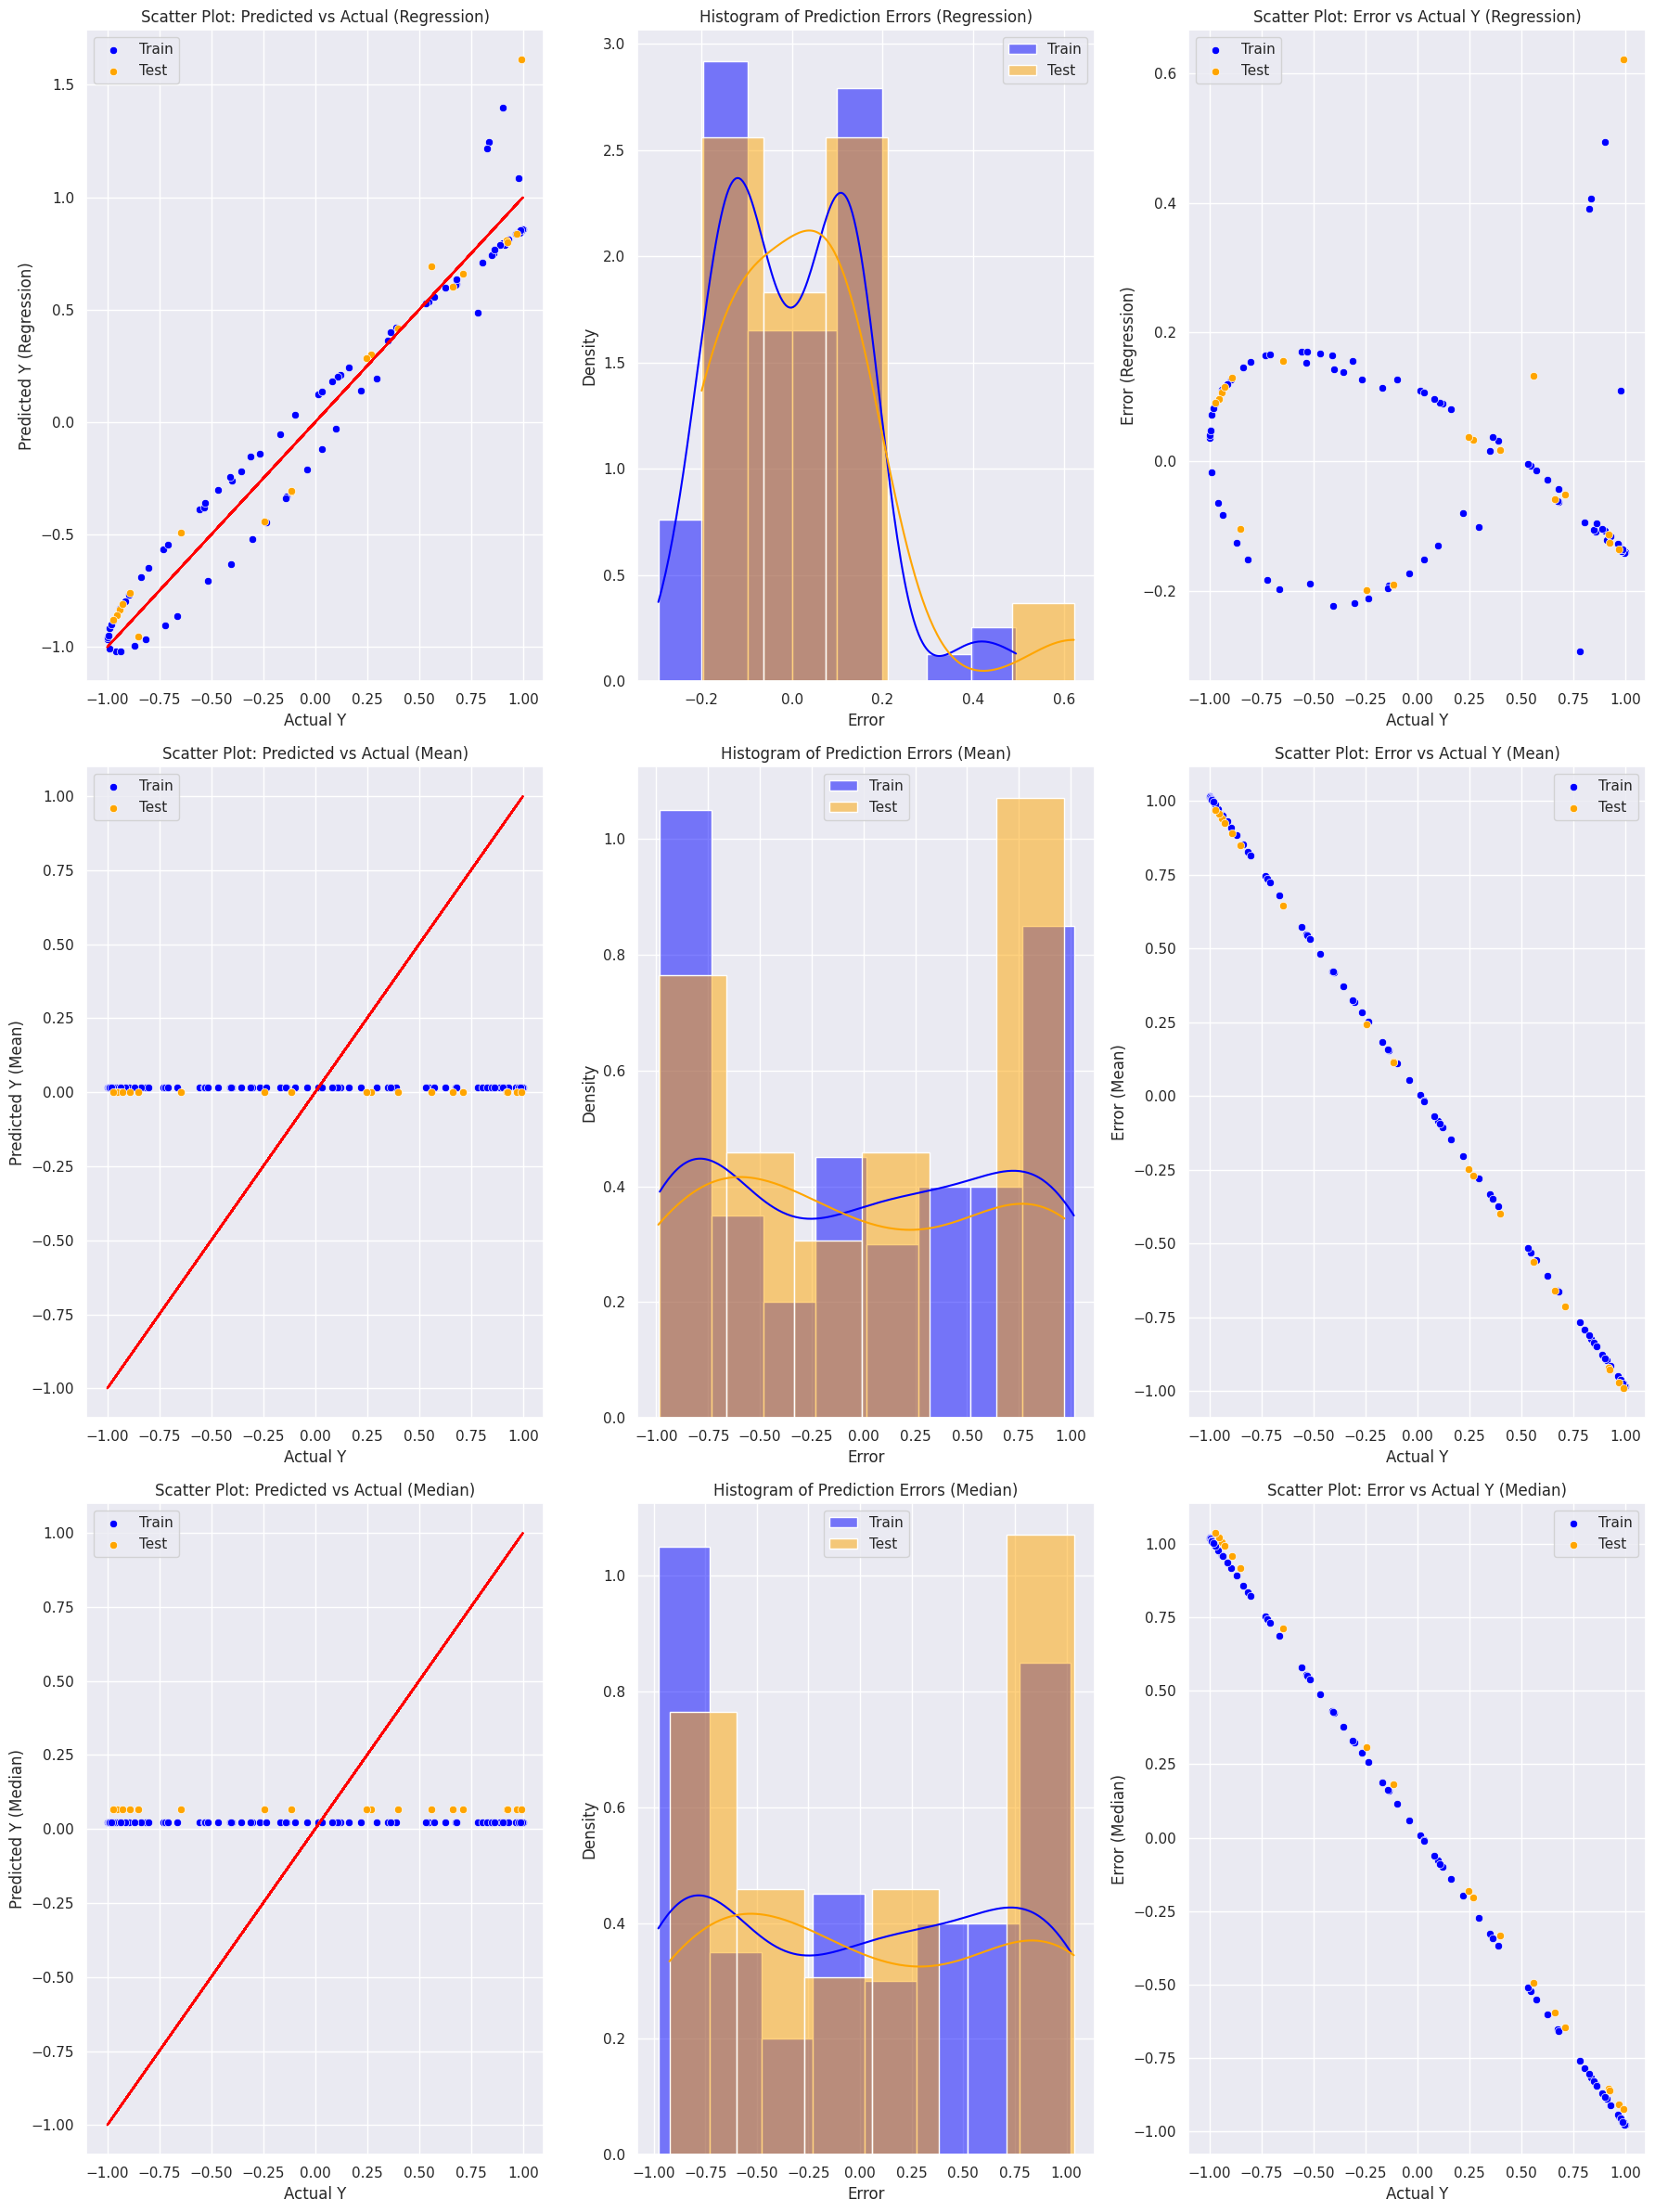

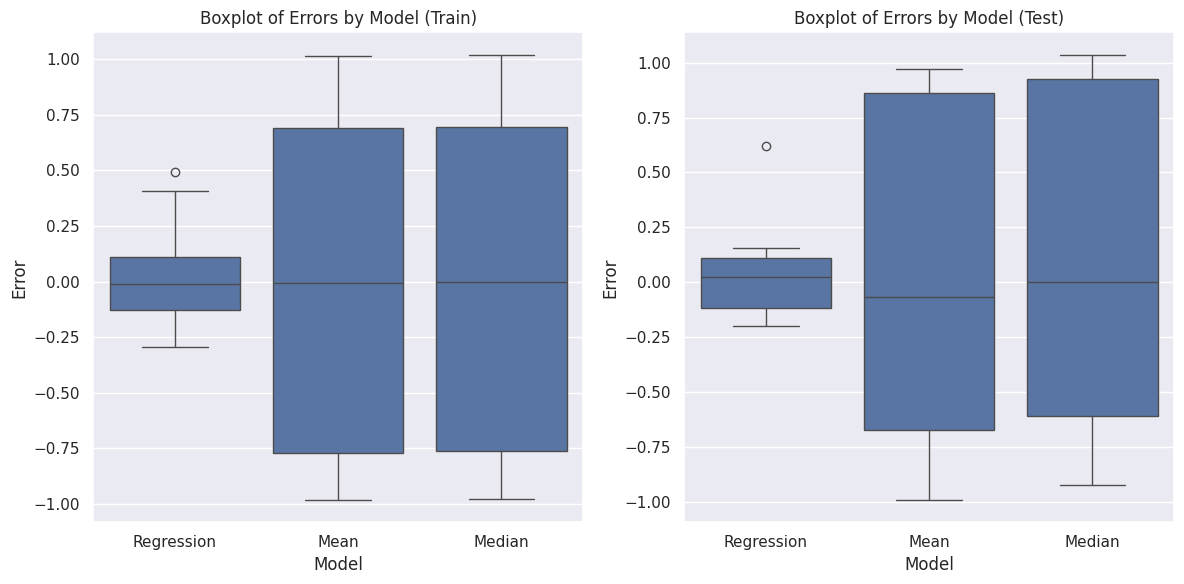


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.1288       0.0815          0.1354       0.1225          5.17        % 50.26          %
Mean       0.6286       0.3262          0.6654       0.3115          5.86        % -4.51          %
Median     0.6286       0.3262          0.6654       0.3184          5.86        % -2.41          %


In [38]:
X2 = X.copy()
#power = [1 + 1/n for n in range(1,3000)]
power = [1 + n for n in range(1,6)]

for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
print(f"Creando X^{power}")
foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Parece que el error mejoro un poco, pero sigue siendo muy alto apesar de tener muchas nuevas variables polinomiales. Trata de explorar si puedes mejorar el error utilizando solo transformaciones polinomiales. No es la peor prediccion, pero no es muy buena.

# Limites de Modelaje

## Extrapolacion o "Fat-Tails"

Ahora veamos que pasa cuando nuestros datos son muy dispersos. La idea es que veamos como se comporta el modelo con extrapolacion.

$ y = sin(x) $

Pero esta vez, $X$ tomara valores muy dispersos, osea tendra mucha varianza!

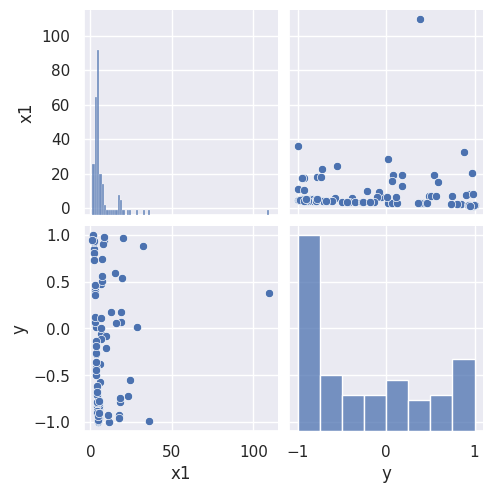

In [39]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 100
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))

# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

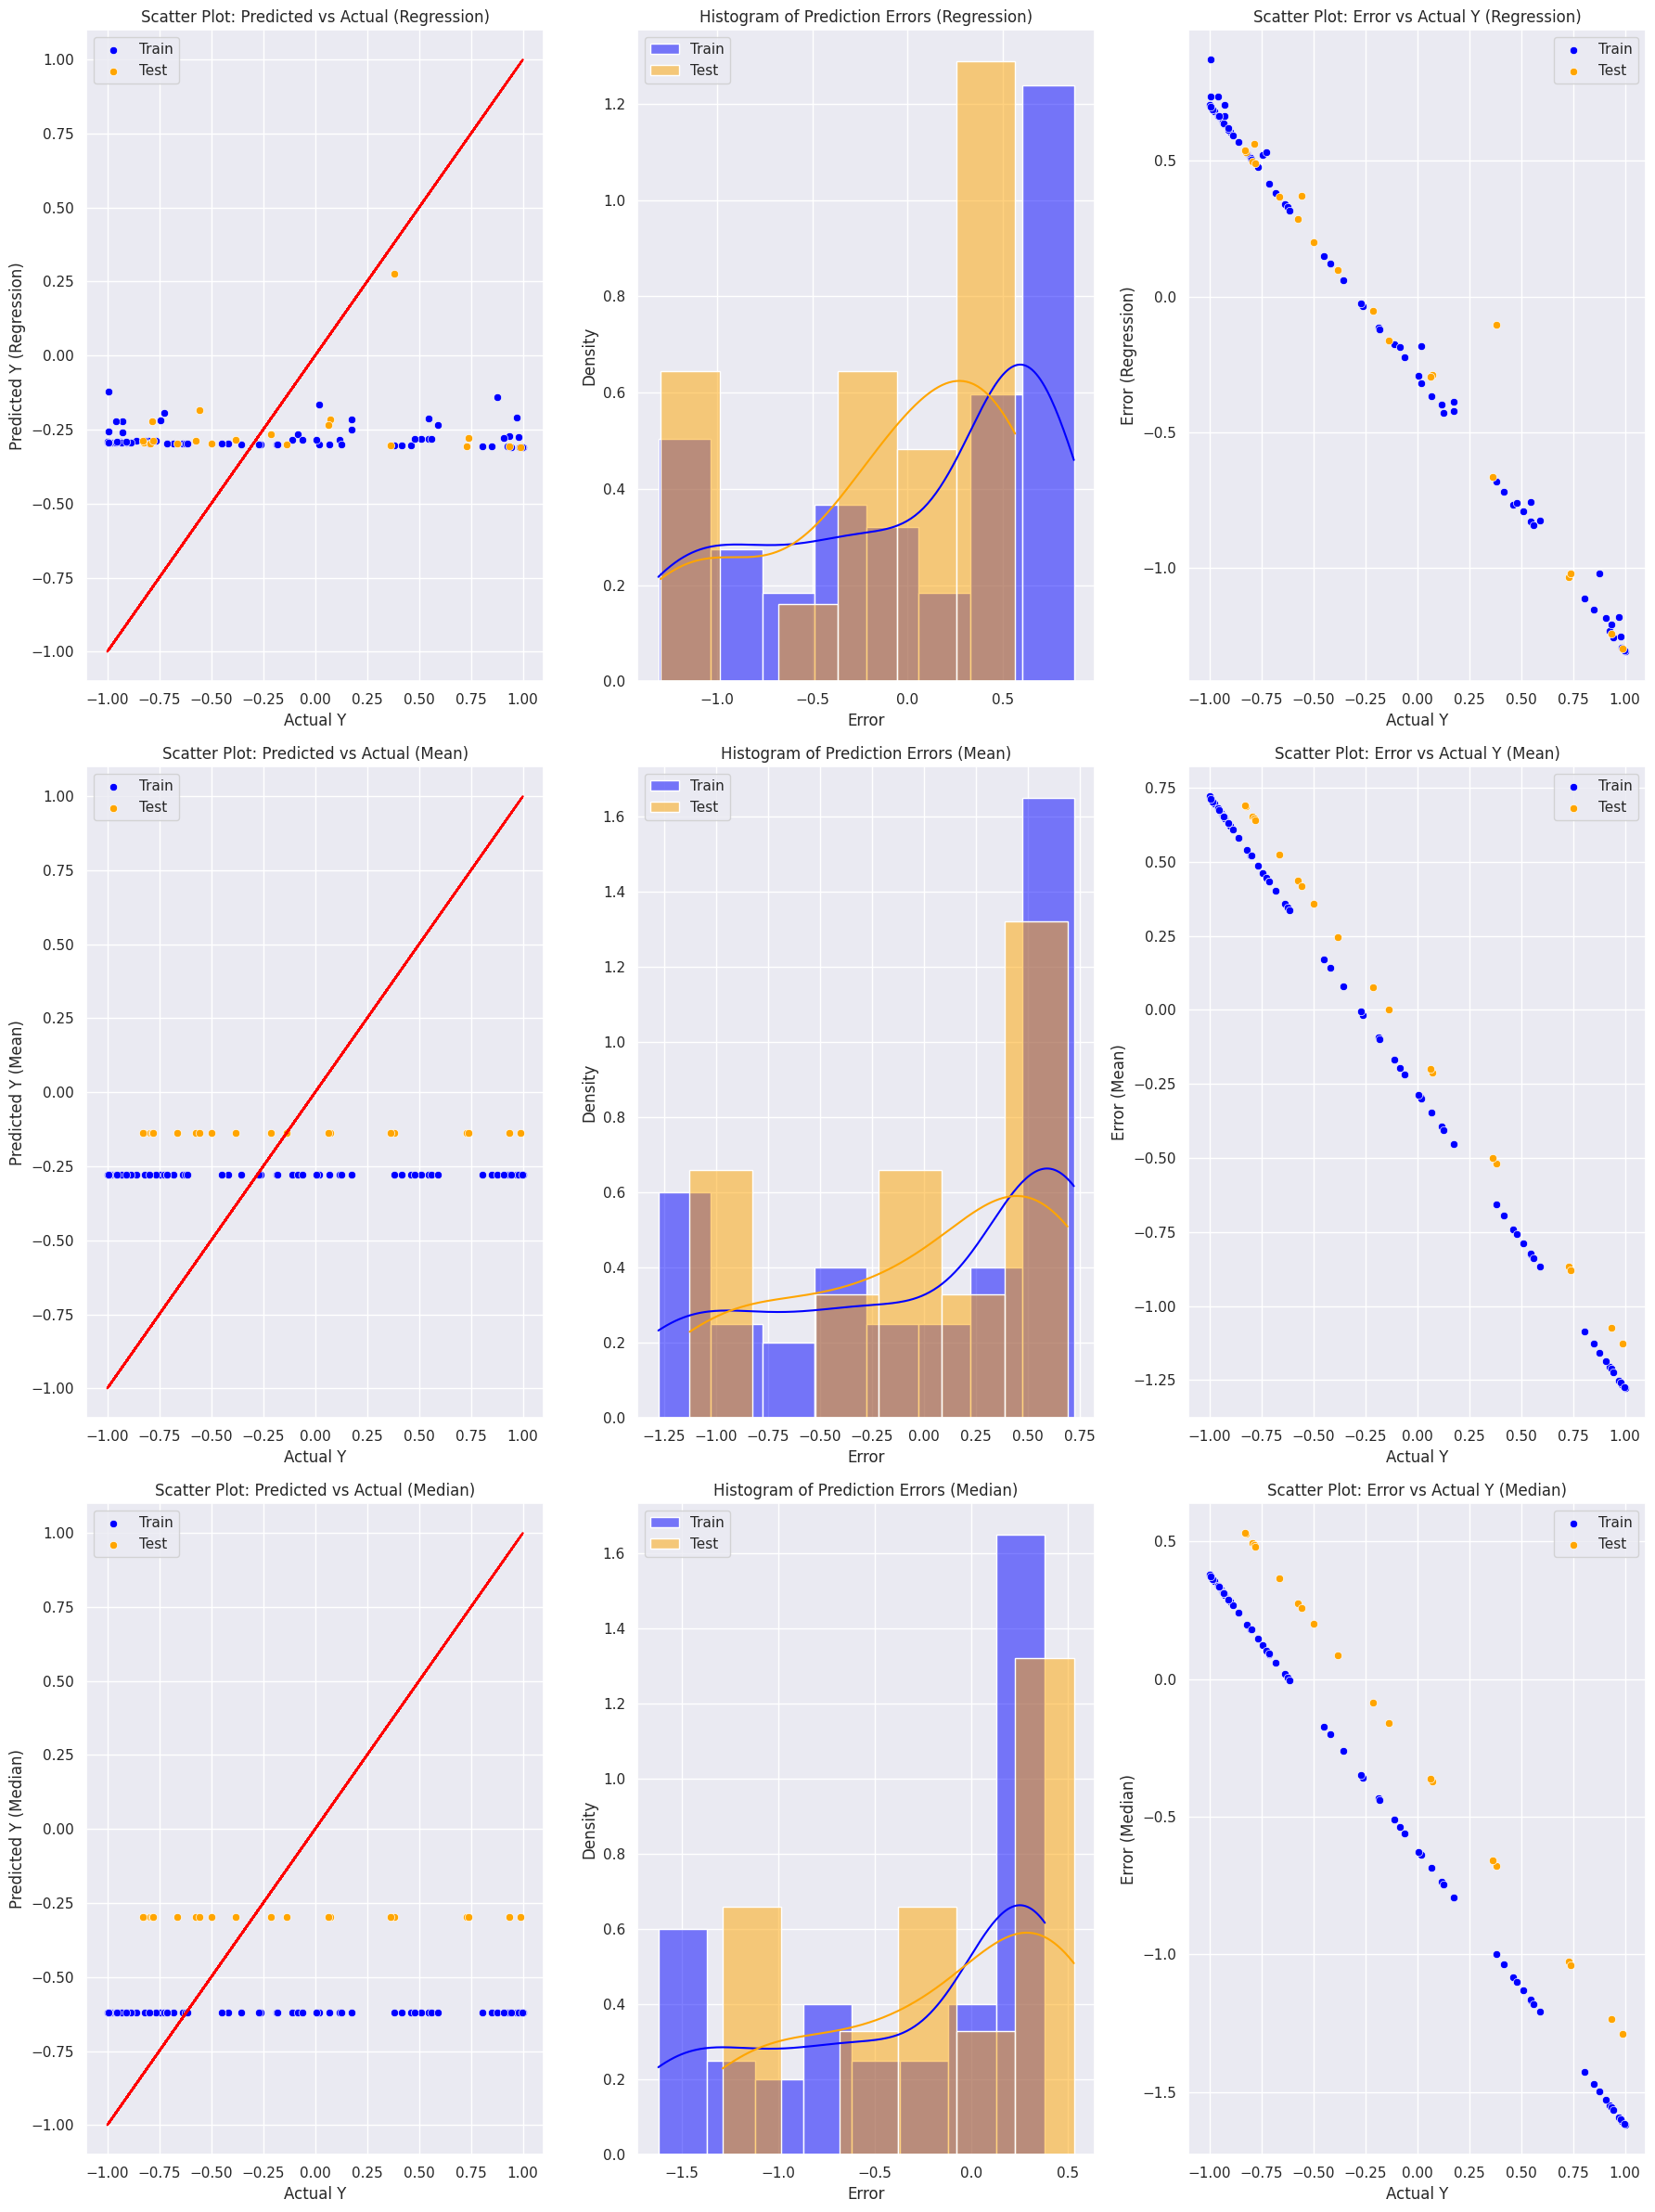

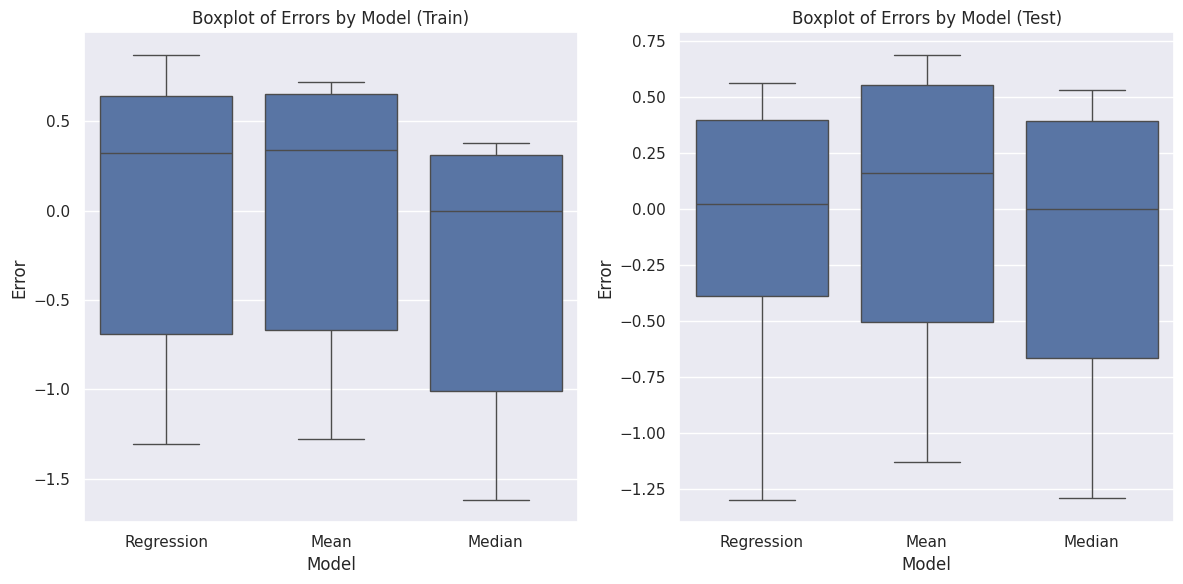


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.6289       0.3216          0.5050       0.3650          -19.69      % 13.51          %
Mean       0.6312       0.3191          0.5376       0.3007          -14.83      % -5.78          %
Median     0.6131       0.4908          0.5301       0.3522          -13.53      % -28.24         %


In [40]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

[2, 3]


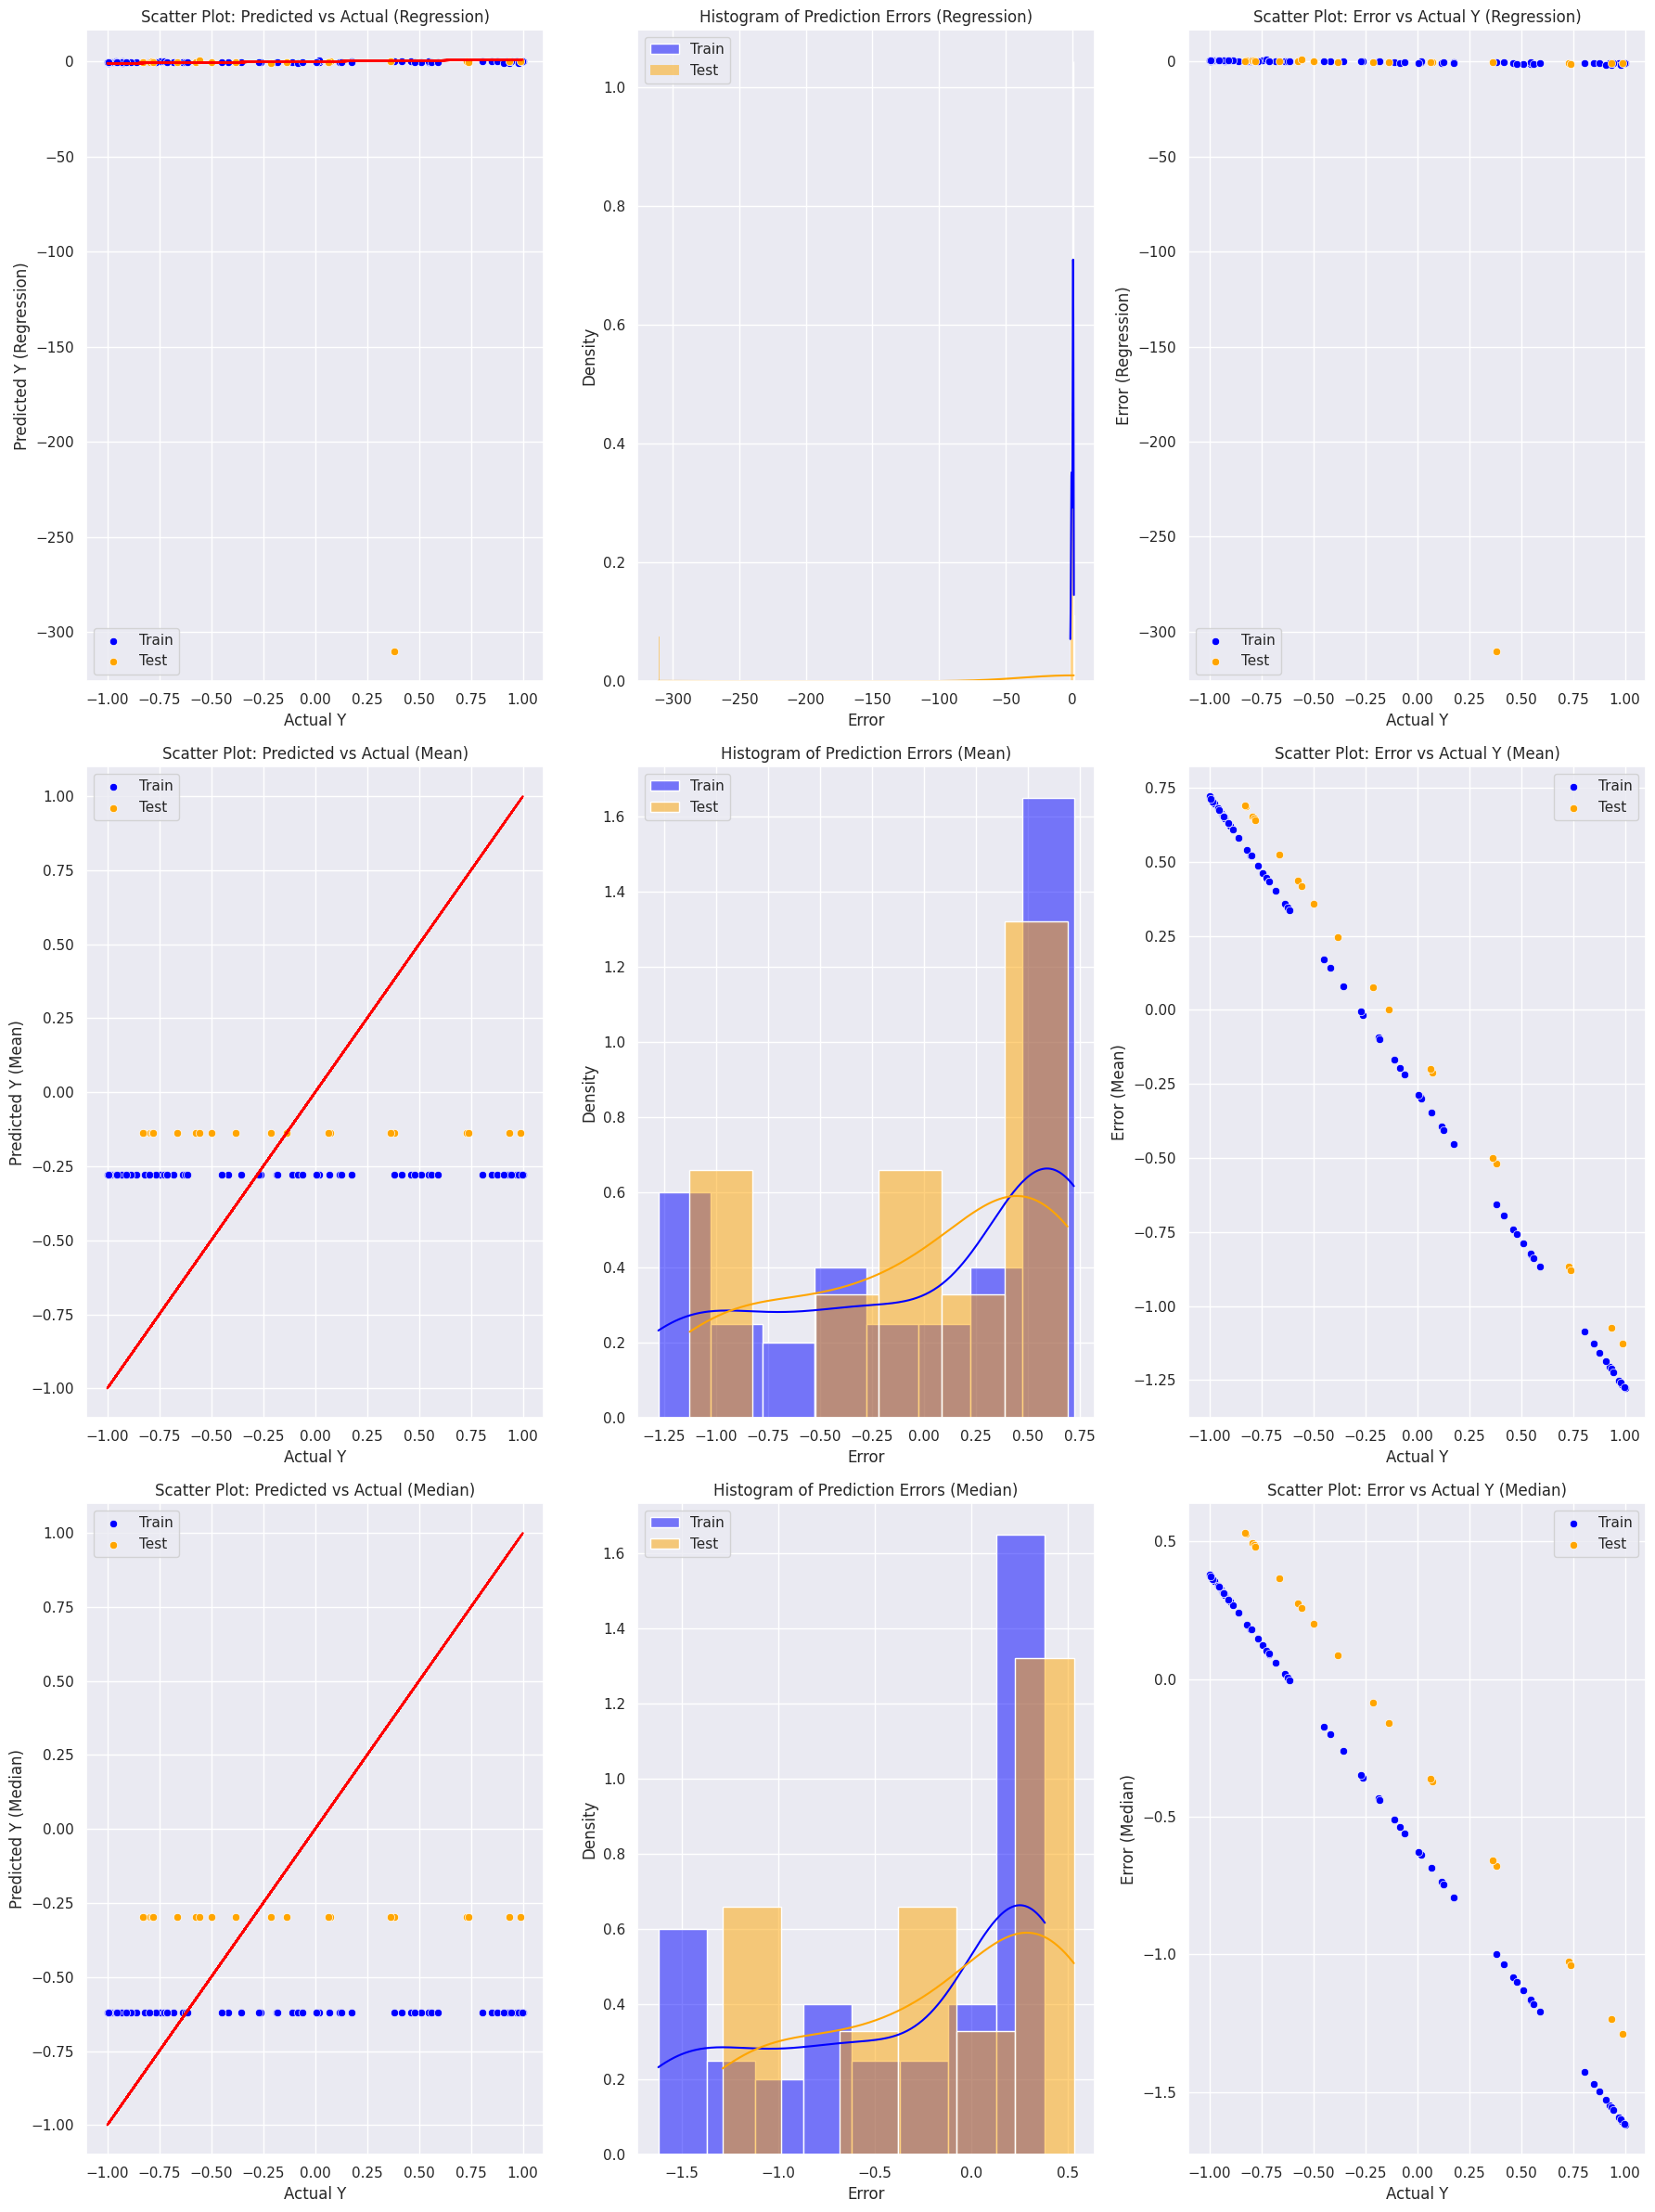

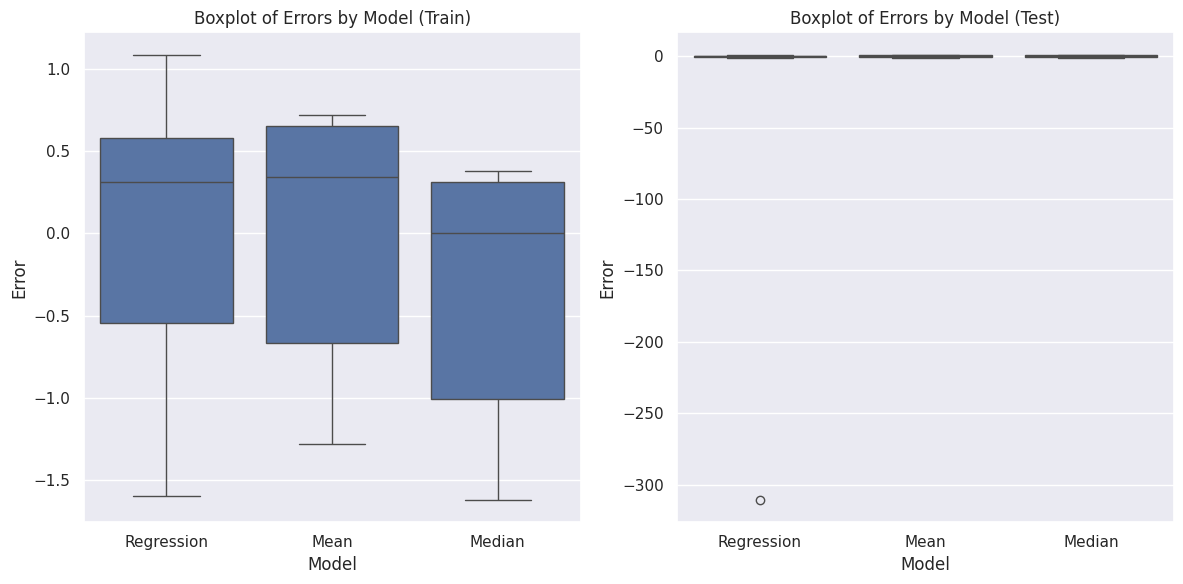


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 0.5814       0.3164          15.9975      67.5867         2651.36     % 21259.77       %
Mean       0.6312       0.3191          0.5376       0.3007          -14.83      % -5.78          %
Median     0.6131       0.4908          0.5301       0.3522          -13.53      % -28.24         %


In [43]:
X2 = X.copy()
# Exponentes polinomiales
#power = [1 + n/10 for n in range(1,500)]
power = [1 + n for n in range(1,3)]
print(power)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

+ Que notas sobre los errores con respecto a las predicciones anteriores del $sin(x)$?
+ En donde aparecen los errores mas altos? Notas algun patron en particular?
+ Utilizando solo transformaciones polinomicas y la regresion lineal que podrias hacer para mejorar el modelo?

## Incertidumbre no observada

Ahora utilicemos una de nuestras funciones anteriores pero agreguemos incertidumbre. Esta incertidumbre podria representar variables omitidas, ruido en la muestra, incertidumbre inherente al modelo, errores de captura, etc..

Simulemos heterocedasticidad, rompiendo el supuesto donde $E[\epsilon | x] != 0$

$y = x_1 + \epsilon_1*\epsilon_2$

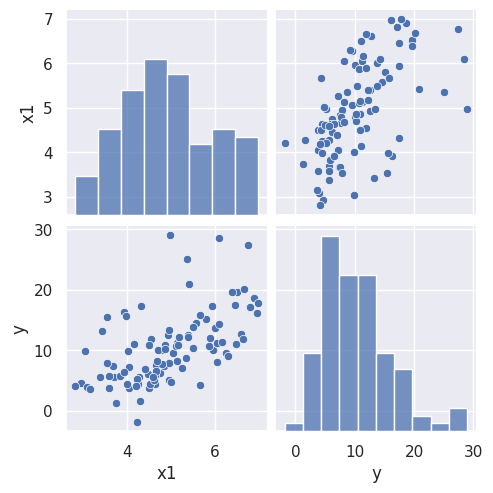

In [44]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 100
# Matriz de Diseño
mean = [5,2,3]
cov = [[1,.5,.5],[.5,2,.5],[.5,.5,2]]
X = np.random.multivariate_normal(mean, cov, N)


# Simulacion de Y
Y = X[:,0] + X[:,1]*X[:,2]
Y = Y.reshape(-1)
X = X[:,0]
X = X.reshape((N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

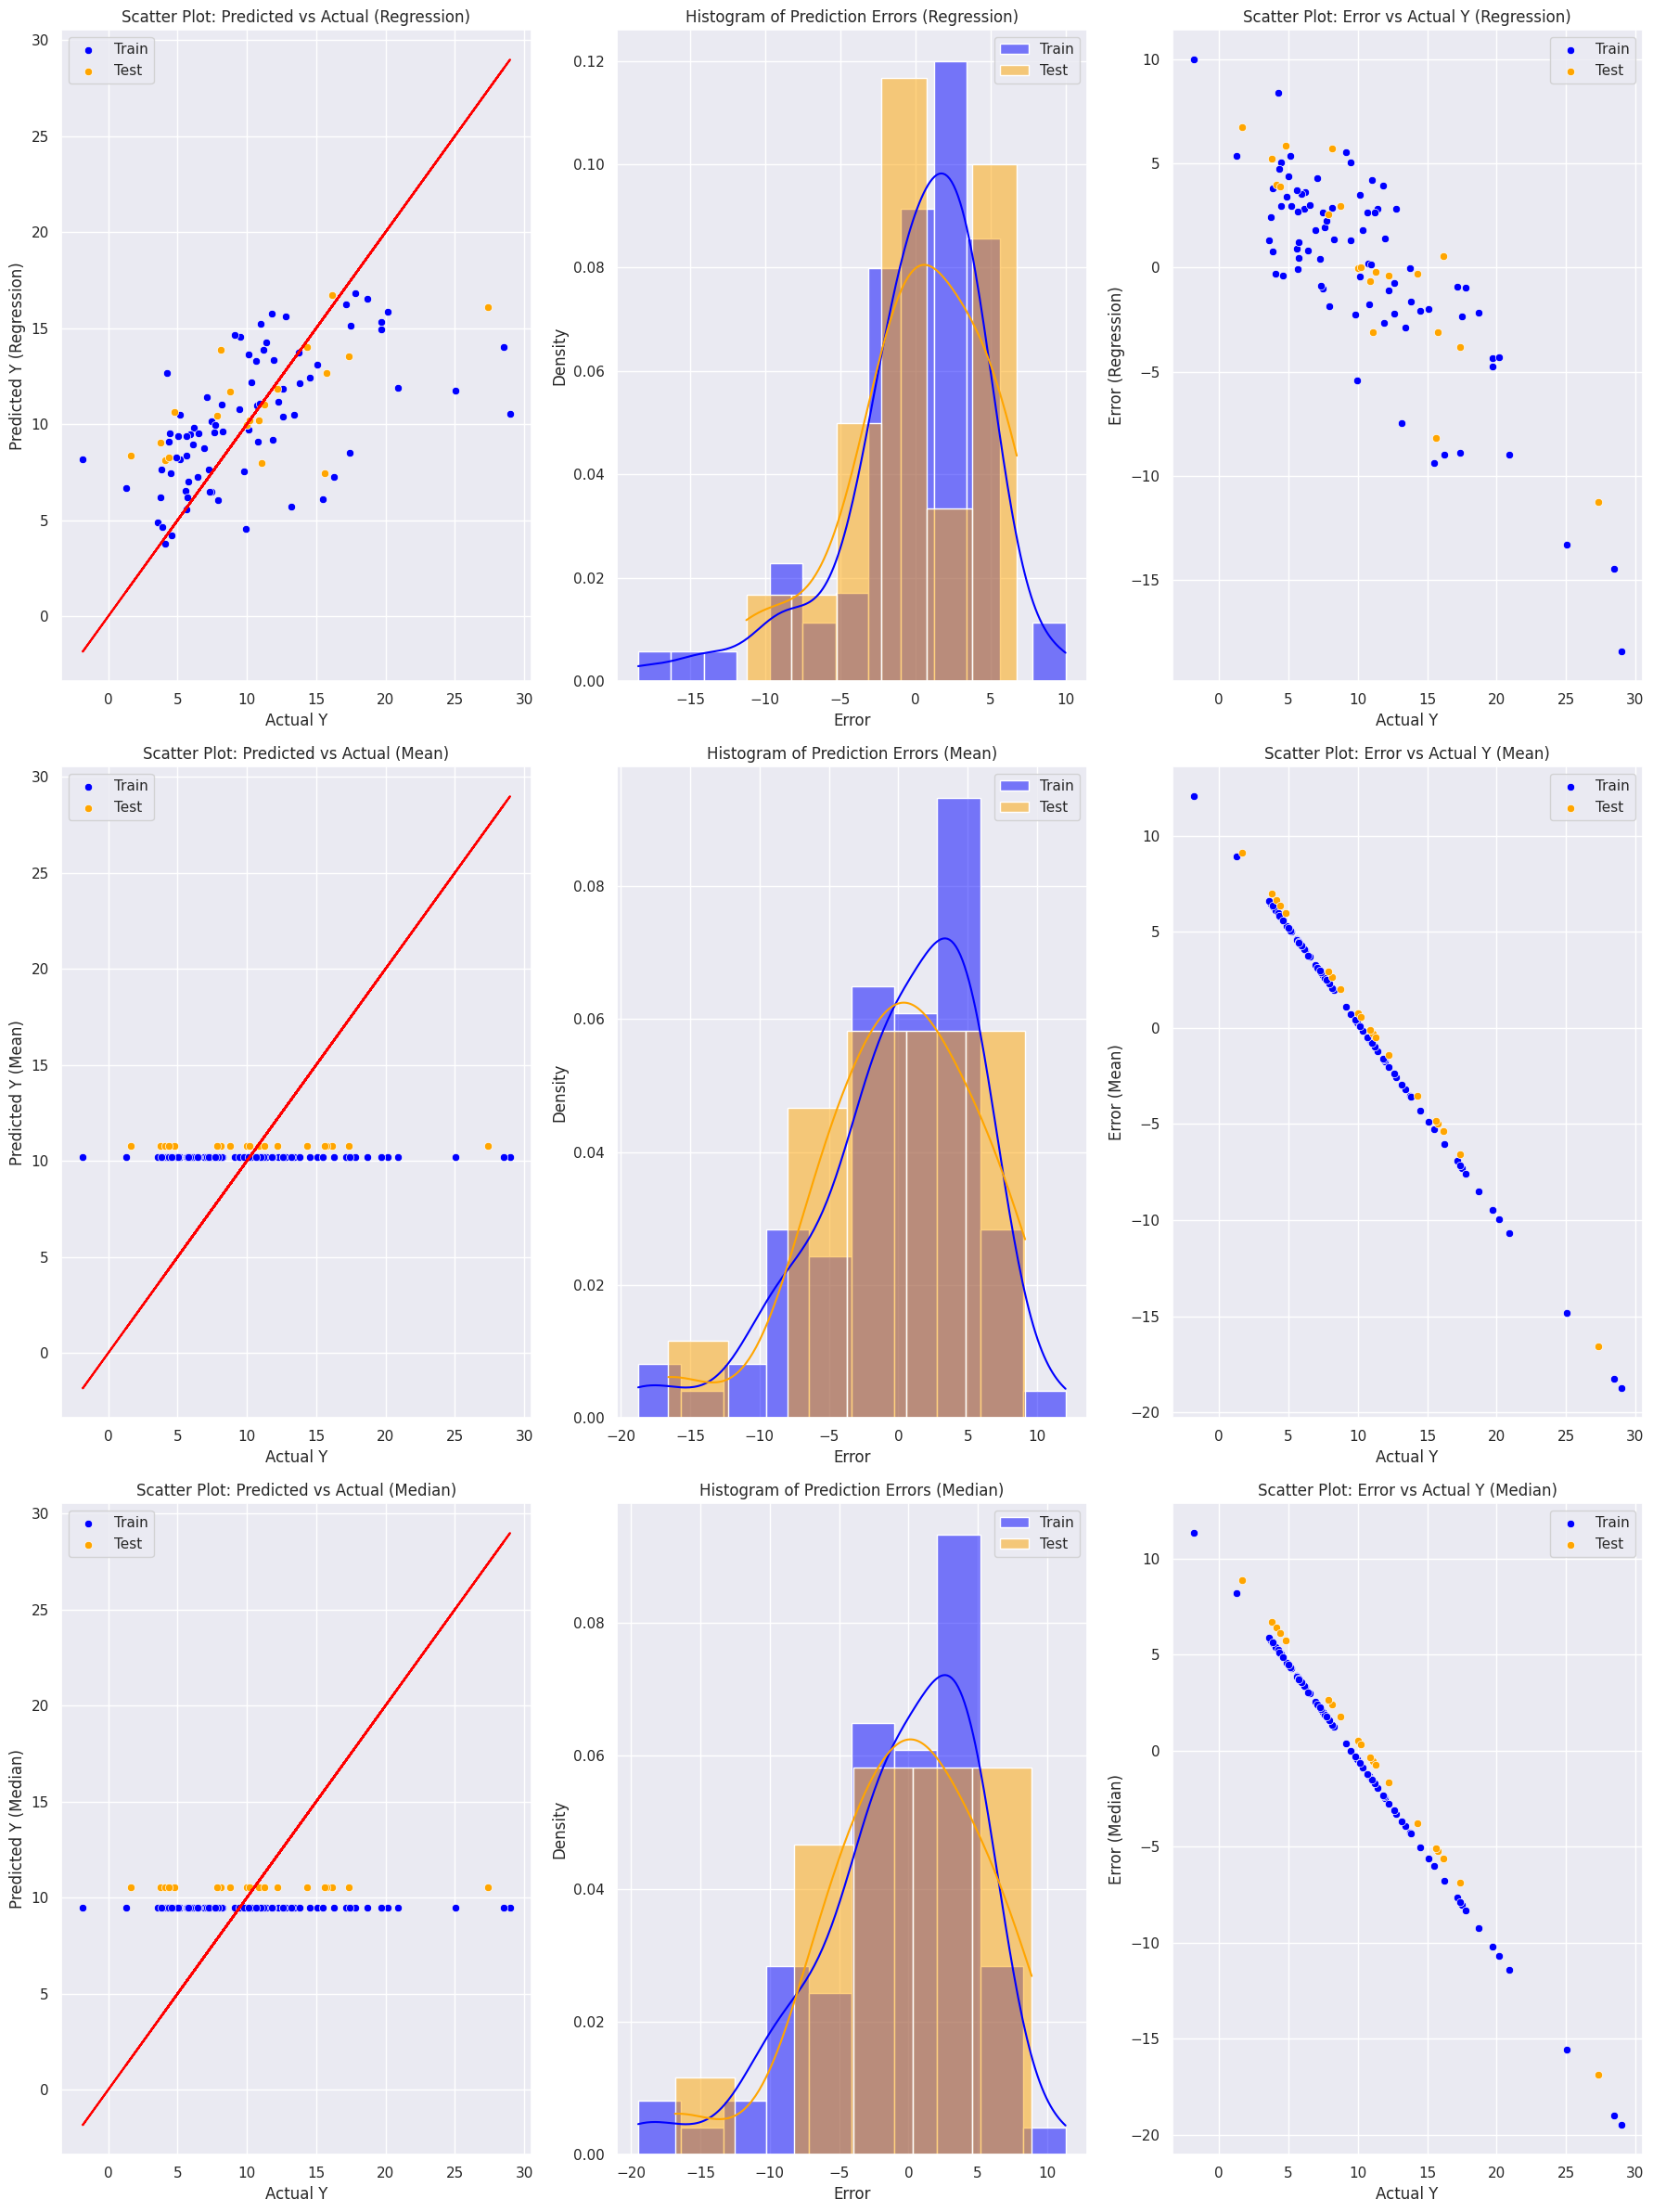

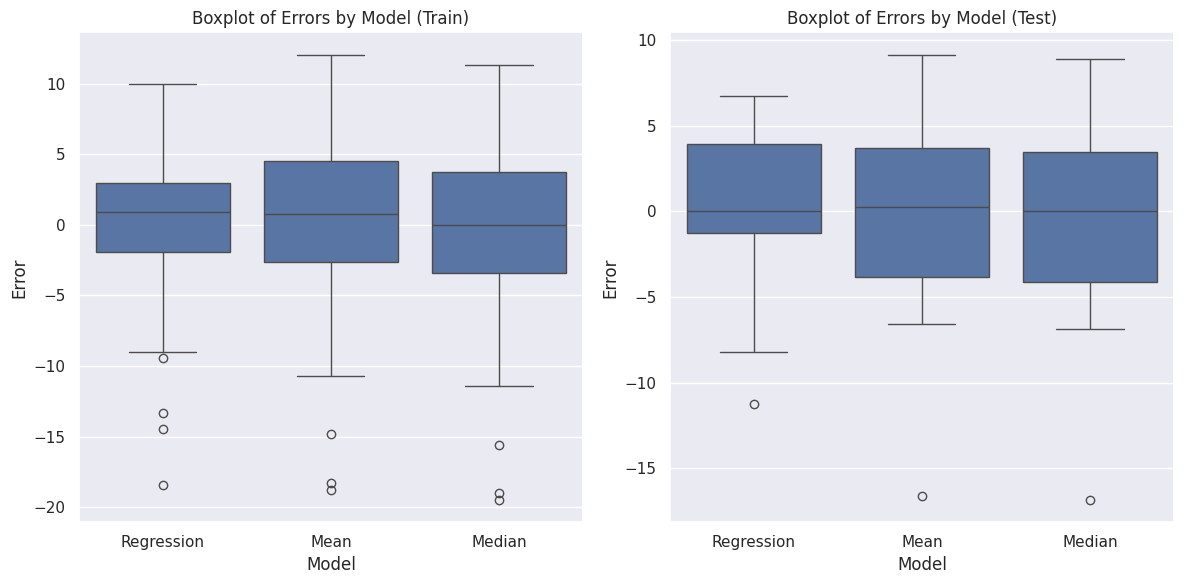


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 3.4874       3.3327          3.4315       2.9996          -1.60       % -9.99          %
Mean       4.5573       3.6932          4.4150       3.8353          -3.12       % 3.85           %
Median     4.5171       3.8131          4.4150       3.8439          -2.26       % 0.81           %


In [45]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

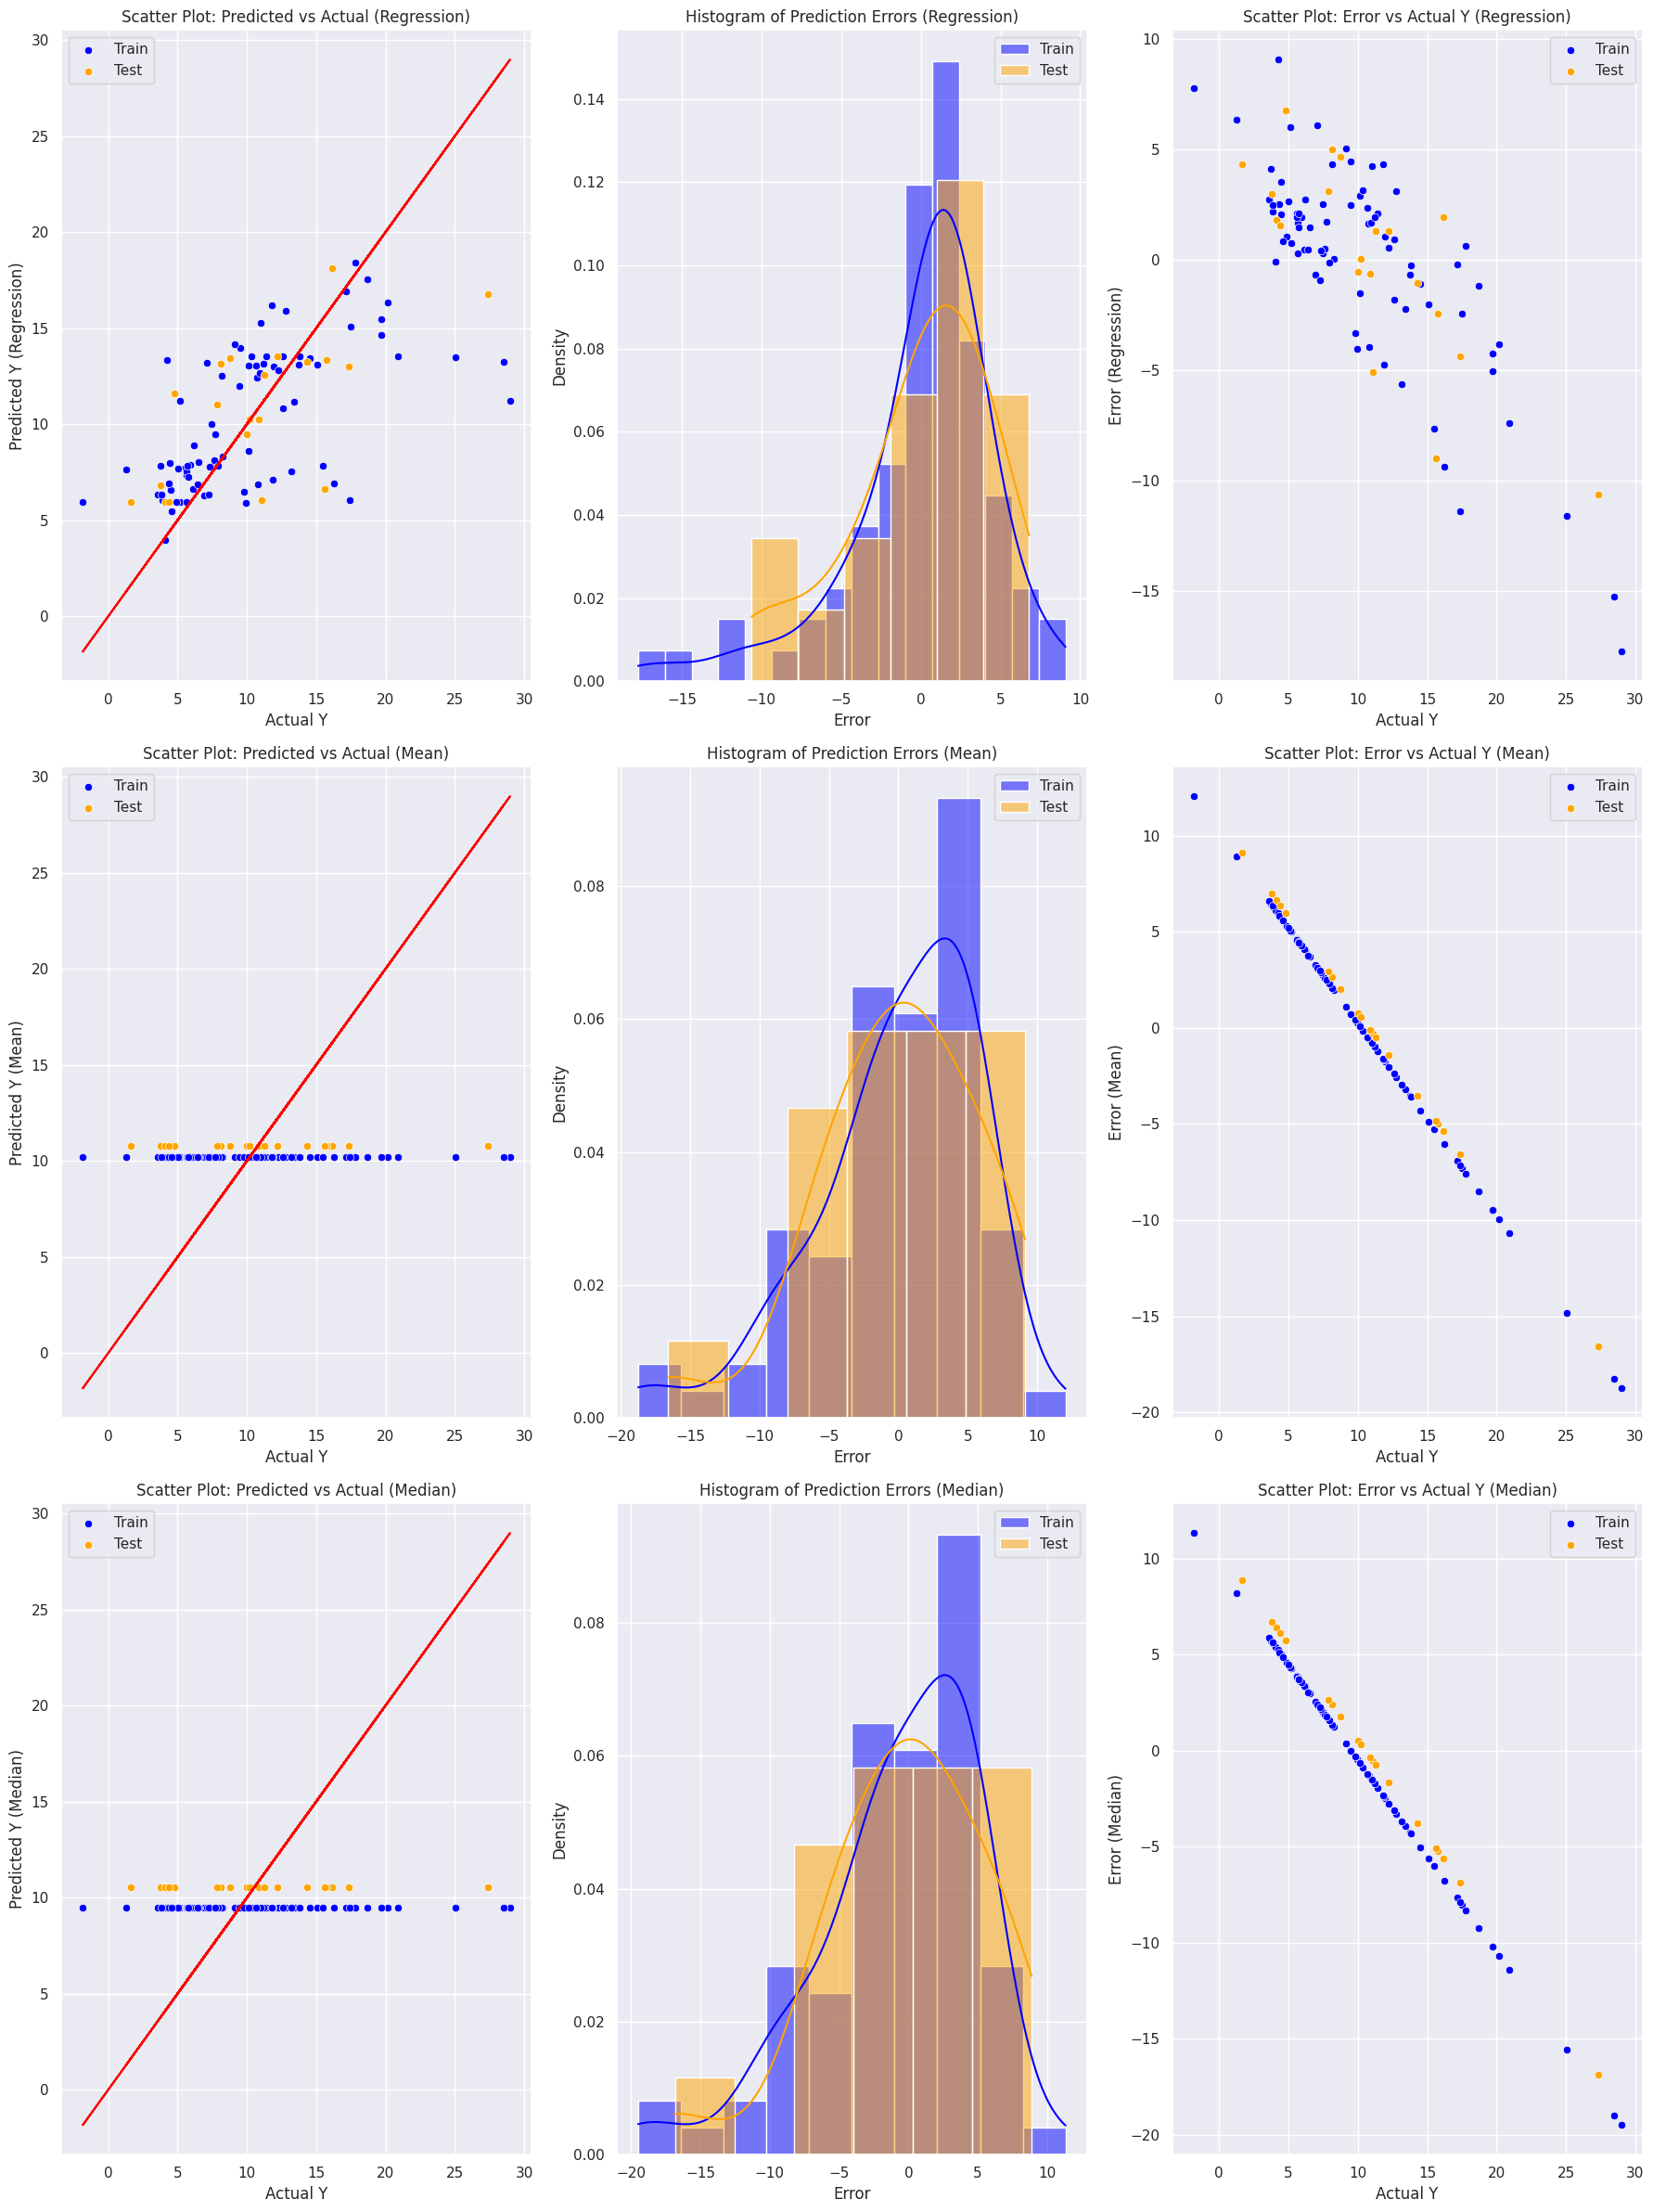

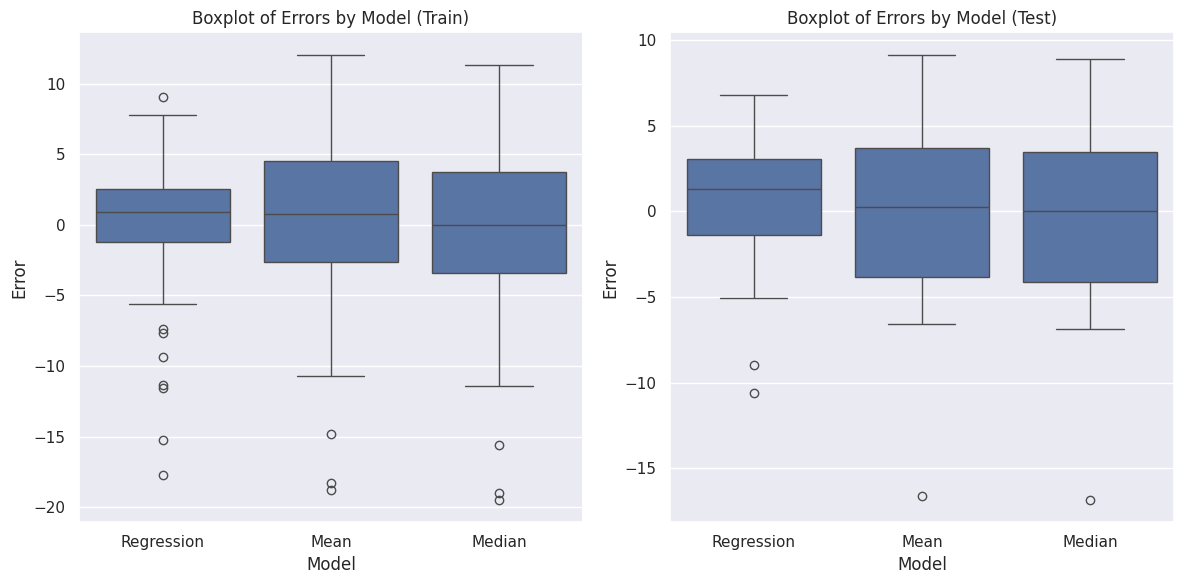


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 3.2509       3.2967          3.4352       2.7744          5.67        % -15.85         %
Mean       4.5573       3.6932          4.4150       3.8353          -3.12       % 3.85           %
Median     4.5171       3.8131          4.4150       3.8439          -2.26       % 0.81           %


In [46]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

+ Que esta pasando con nuestro modelo a pesar de que estamos agregando nuevas variables?

Ahora usemos un modelo aun mas complejo y regresemos al supuesto $E[\epsilon | x] = 0$

$y =  x + ln(x) + xln(x) + 1/x + x^{1.3} + \epsilon_1*\epsilon_2$

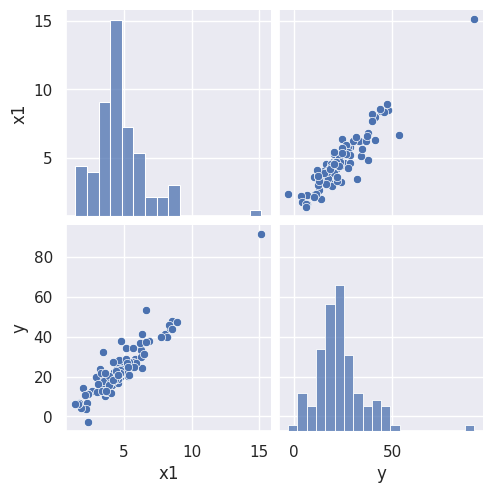

In [47]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 100
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,1,size=(N,1))
mean = [1,1]
cov = [[2,.3],[.3,5]]
E = np.random.multivariate_normal(mean, cov, N)
# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3) + (E[:,0]*E[:,1]).reshape((N,1))
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

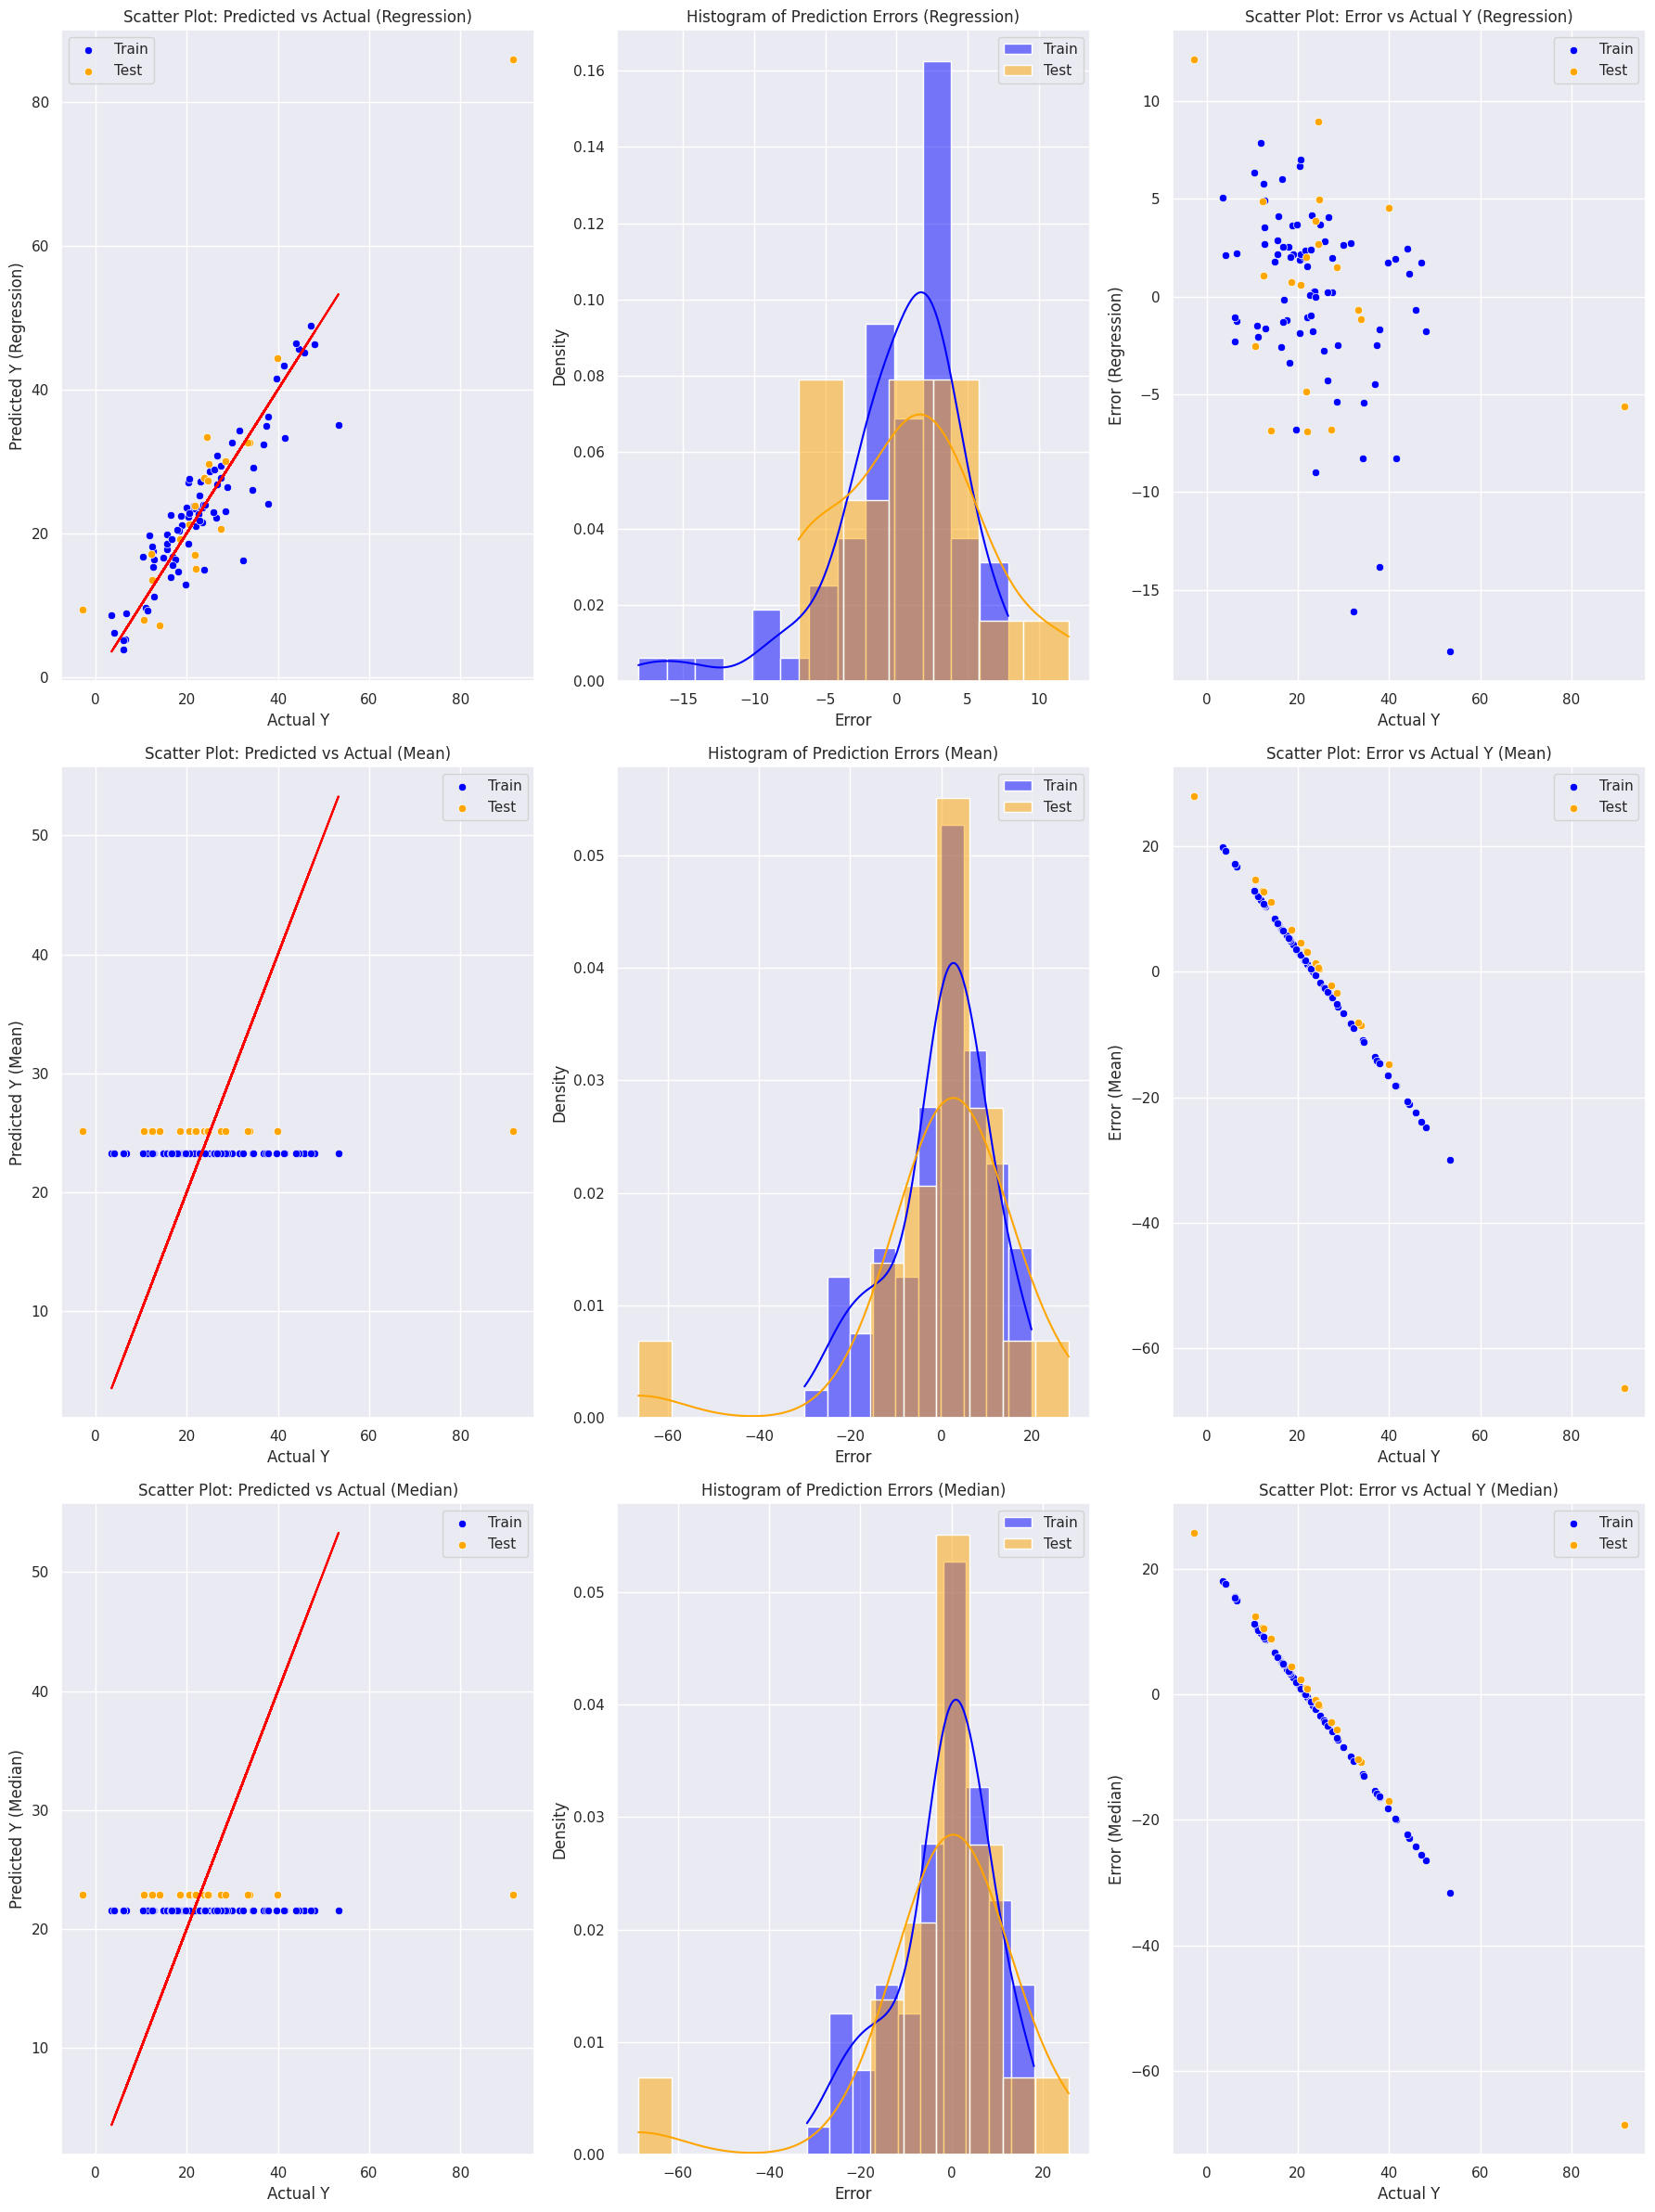

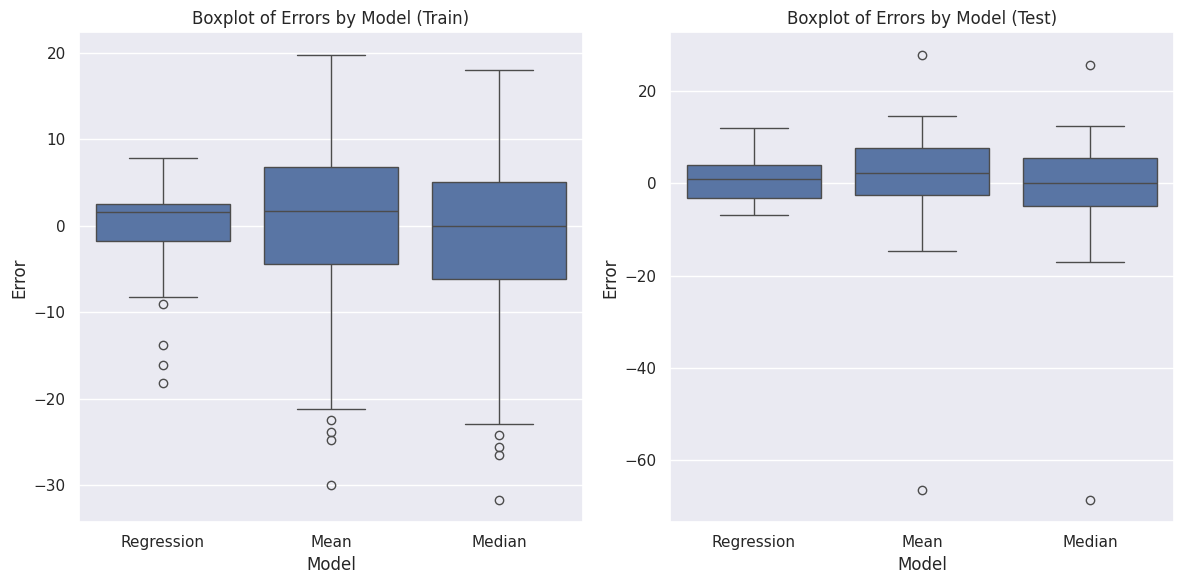


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 3.4003       3.2358          4.1630       3.0266          22.43       % -6.47          %
Mean       8.3945       6.9877          10.3458      14.4658         23.24       % 107.02         %
Median     8.2411       7.3735          10.0403      14.8531         21.83       % 101.44         %


In [48]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Utilicemos un polinomio muy grande para tratar de mejorar el modelo

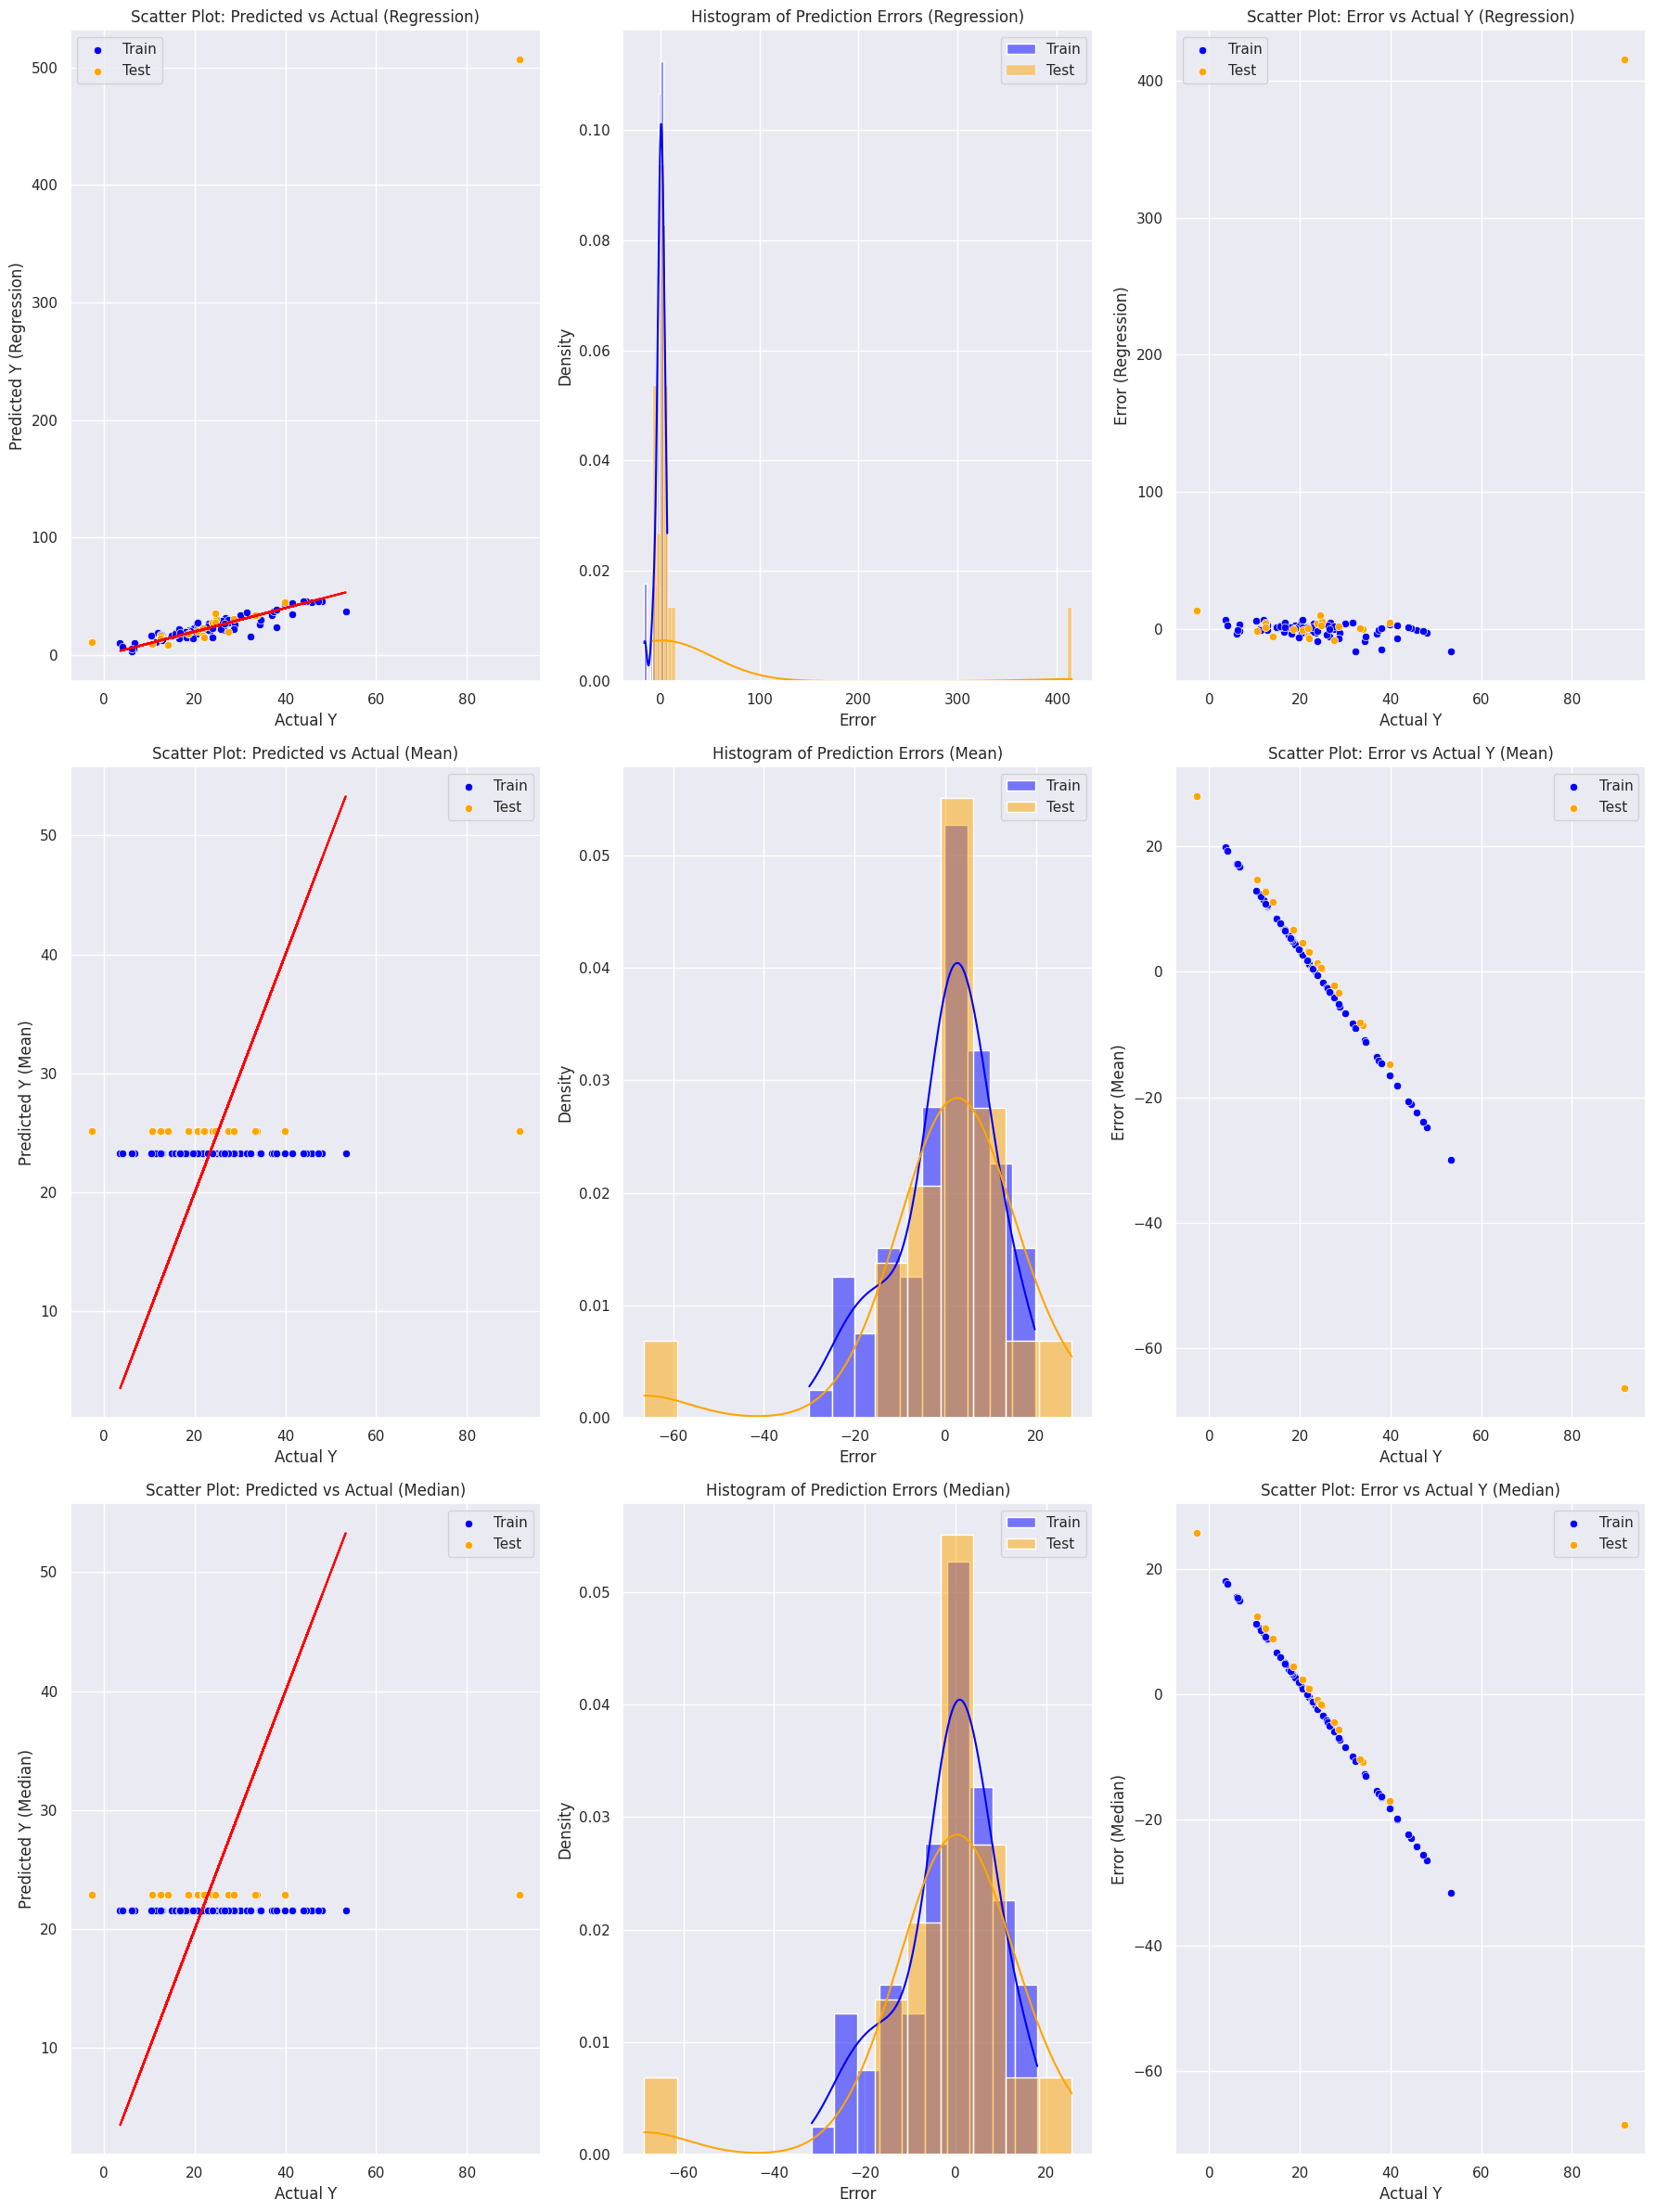

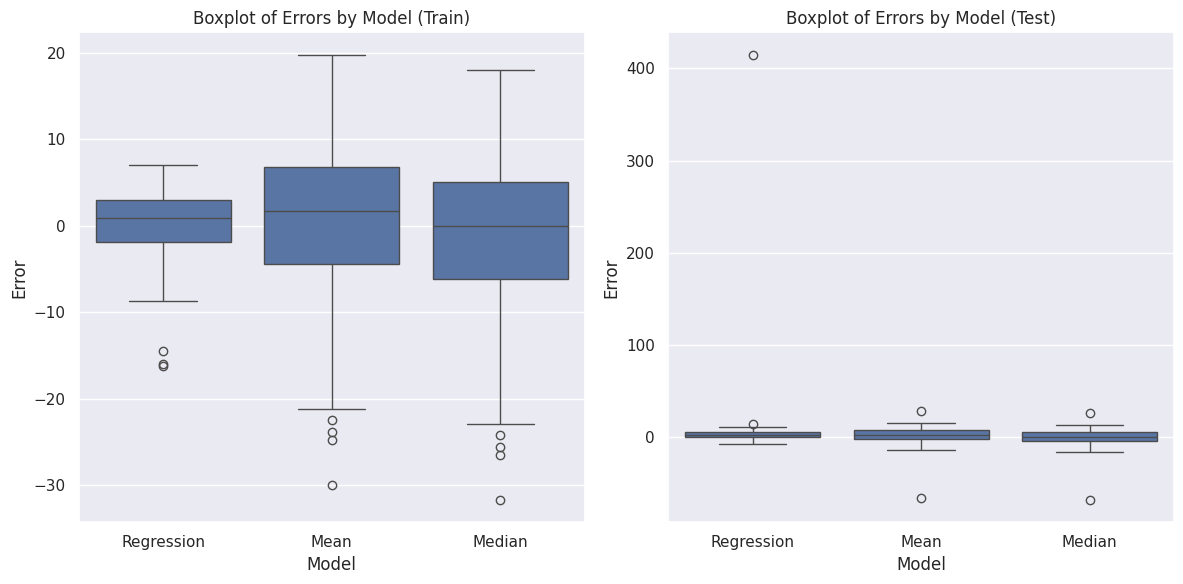


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 3.2772       3.2025          24.7206      89.6247         654.33      % 2698.56        %
Mean       8.3945       6.9877          10.3458      14.4658         23.24       % 107.02         %
Median     8.2411       7.3735          10.0403      14.8531         21.83       % 101.44         %


In [26]:
X2 = X.copy()

#Ingenieria de Variables
X2 = np.reshape(X2, (N,1))
power = [1 + n for n in range(1,5)]
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

+ Que paso con el nuestro errror respecto a lo anterior?
+ Como es posible que ocurra esto cuando tenemos mas varaibles, no deberia de mejorar la prediccion?

## Comportamiento mas complejo

Creemos funciones con comportamiento mas complejo, en este caso utilicemos recursividad (podria representar series de tiempo)

$y_t =  .8*y_{t-1} + x + ln(x) + 1/x + x^{1.3} $

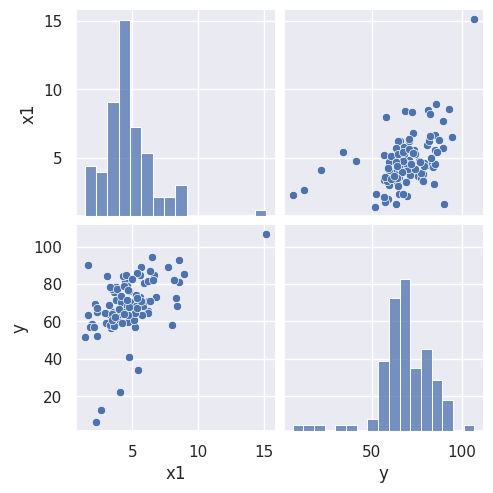

In [49]:
# Seed for reproducibility
np.random.seed(589)

N = 100

# Generate X
X = np.random.uniform(1, 5, size=(N, 1)) + np.random.lognormal(0, 1, size=(N, 1))

mean = [1, 1]
cov = [[2, .3], [.3, 5]]

# Initialize Y
Y = np.zeros(N)

# Generate Y recursively
for i in range(N):
    if i == 0:
        # Base case for the first value of Y
        Y[i] = X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3)
    else:
        # Recursive relation: Y[i] depends on Y[i-1] and current X[i]
        Y[i] = 0.8 * Y[i - 1] + X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3) 

df = pd.DataFrame(data={'x1': X.flatten(), 'y': Y})
sns.pairplot(df)


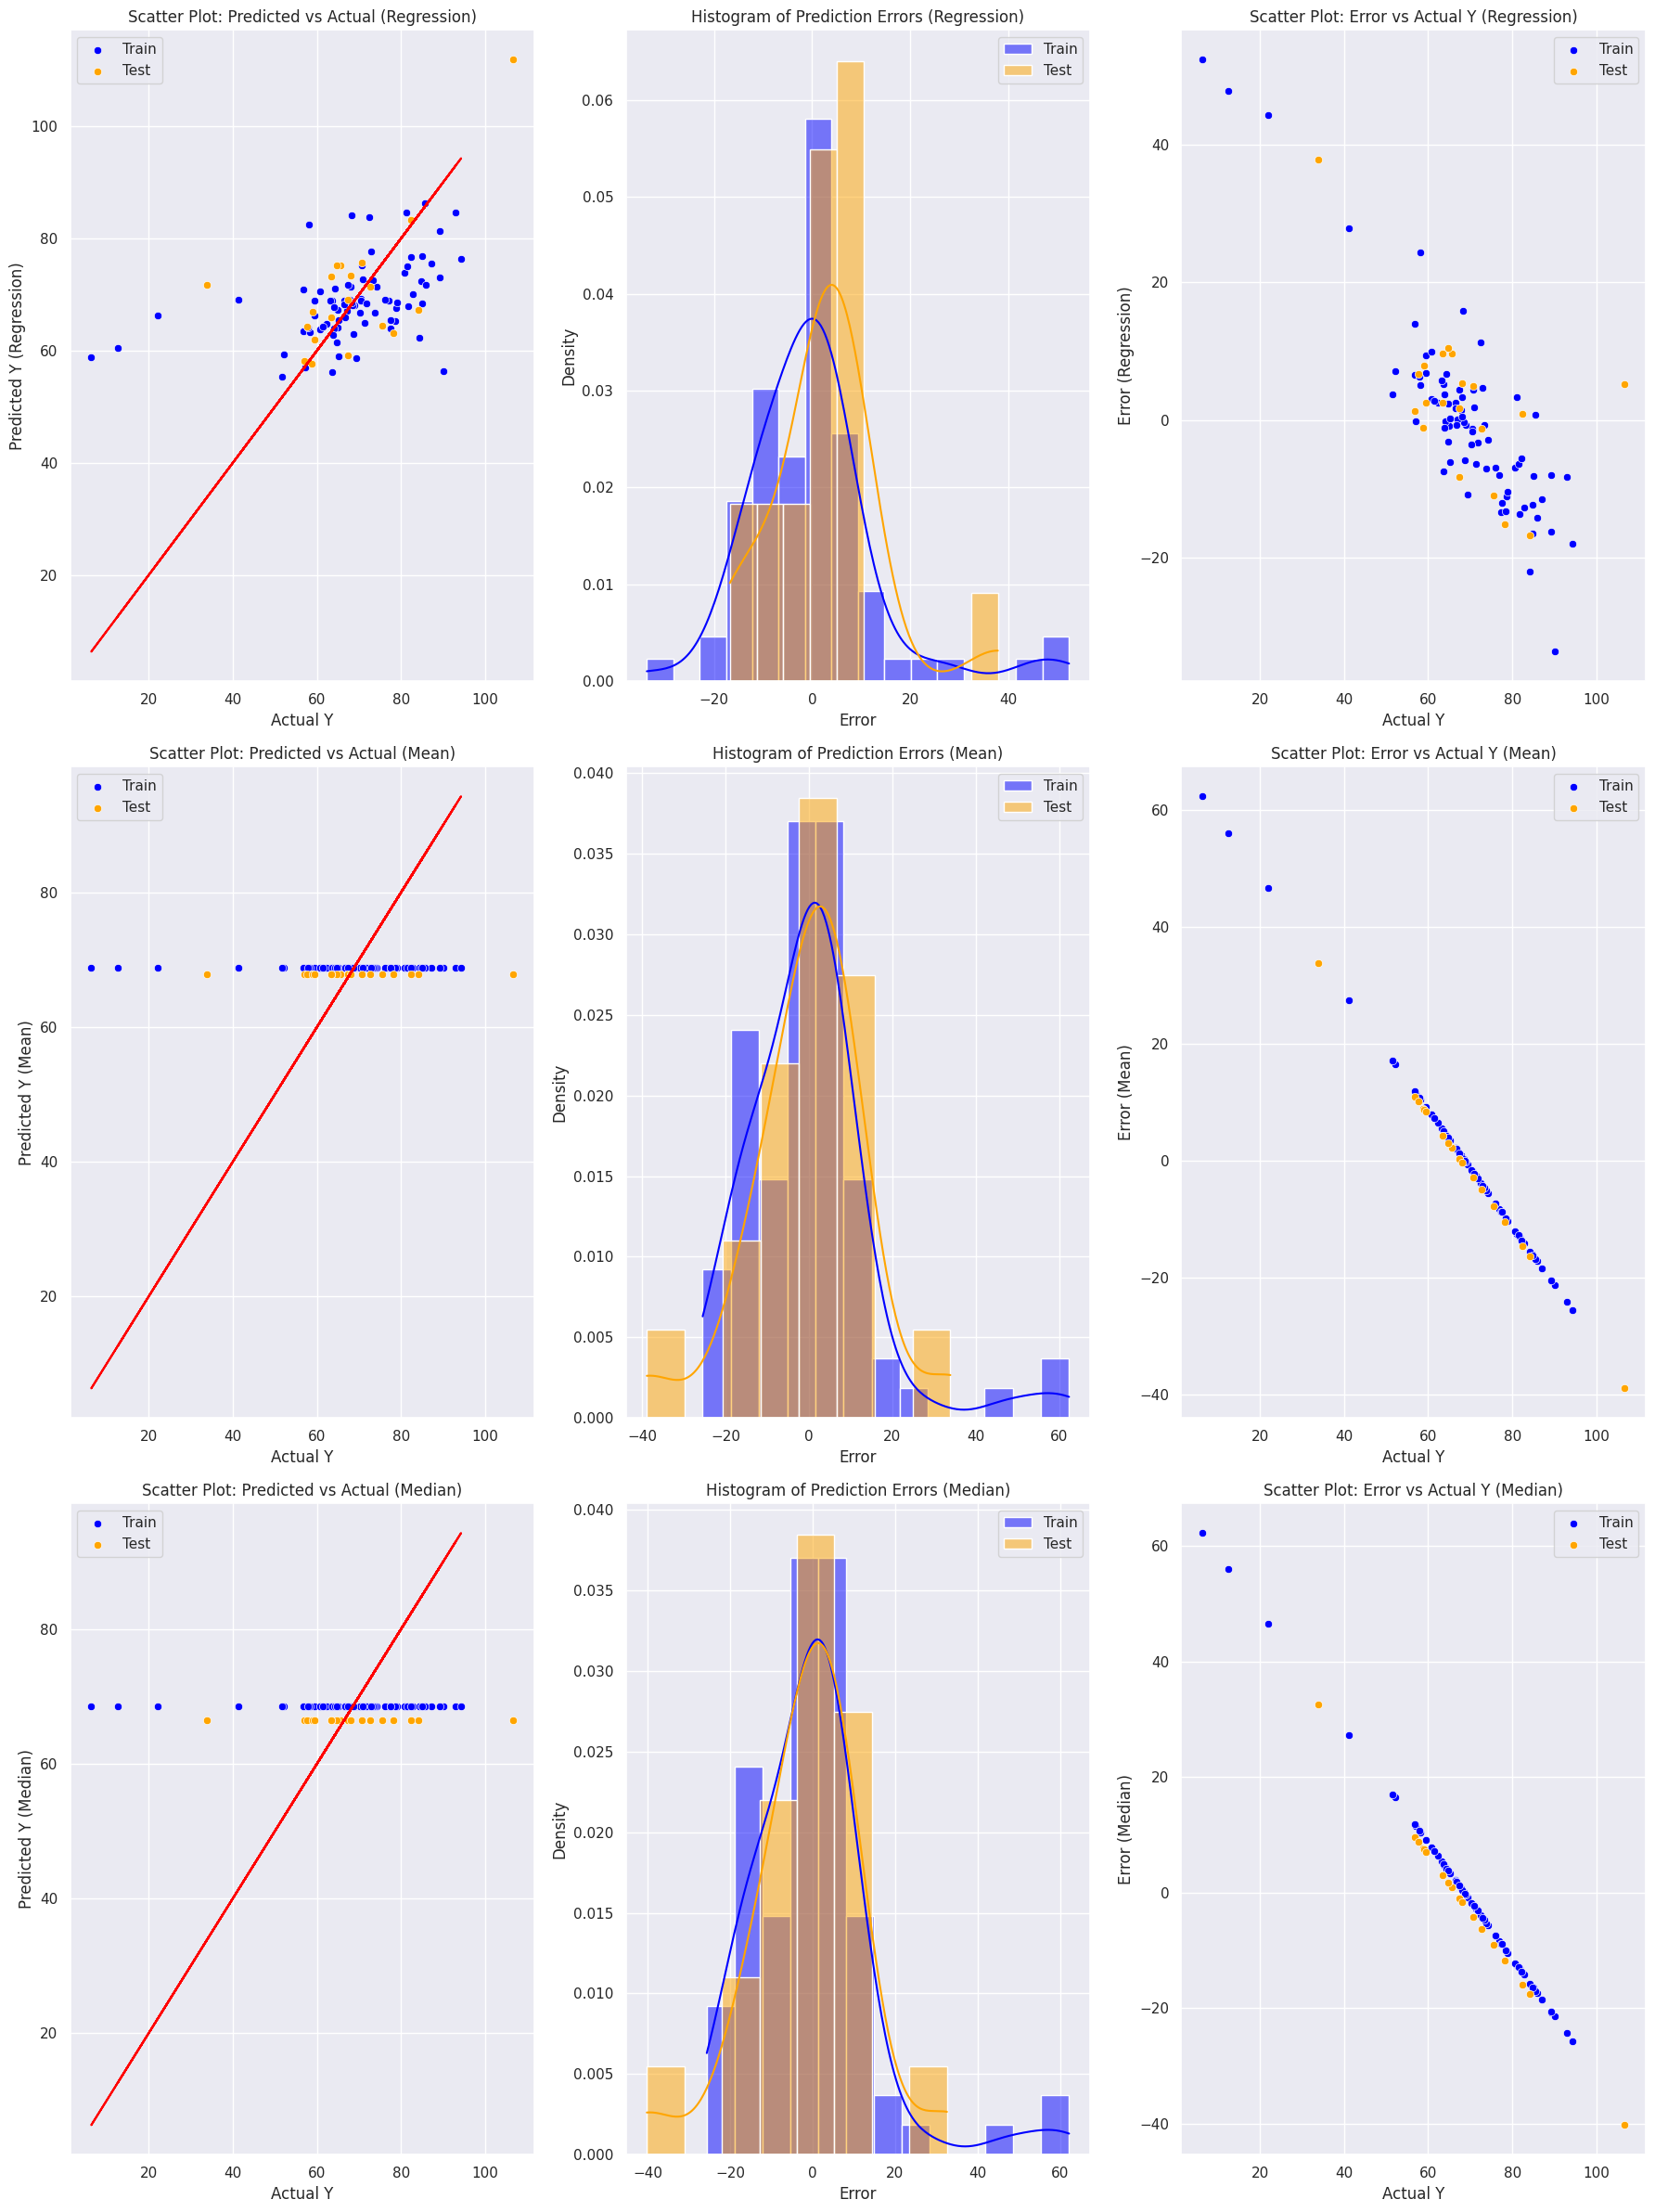

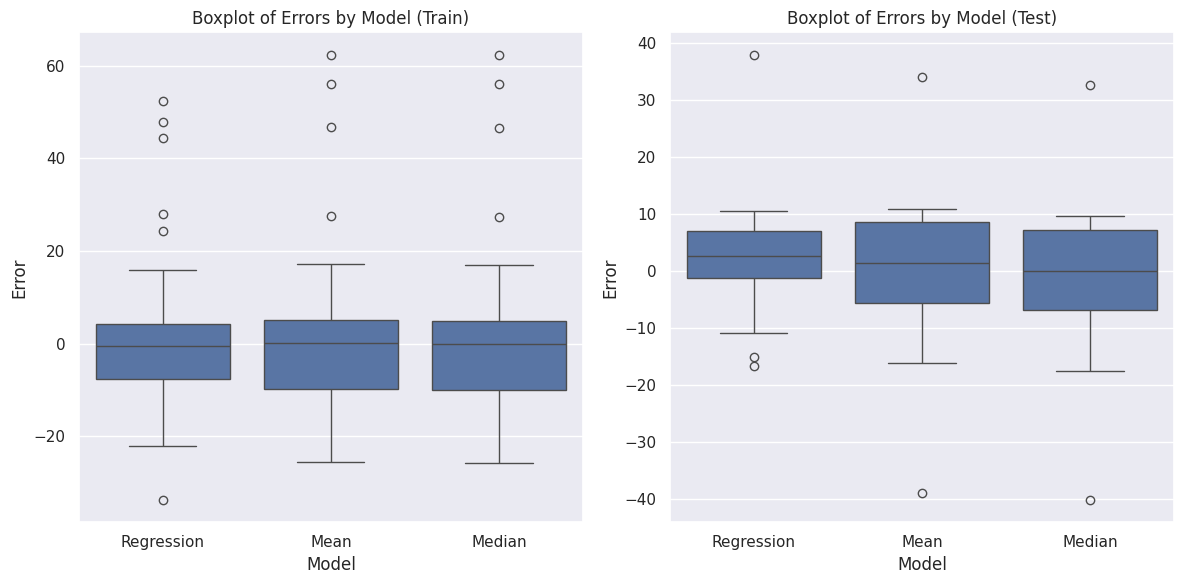


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 8.8472       10.1206         8.0219       8.2316          -9.33       % -18.67         %
Mean       10.1901      11.0883         9.5901       10.0092         -5.89       % -9.73          %
Median     10.1901      11.0894         9.5221       10.1568         -6.56       % -8.41          %


In [50]:
foo_regresion(X,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)

Ahora tratemos de mejorar nuestro modelo solo utilizando/creando variables polinomiales de nuestras X's y veamos si mejora.

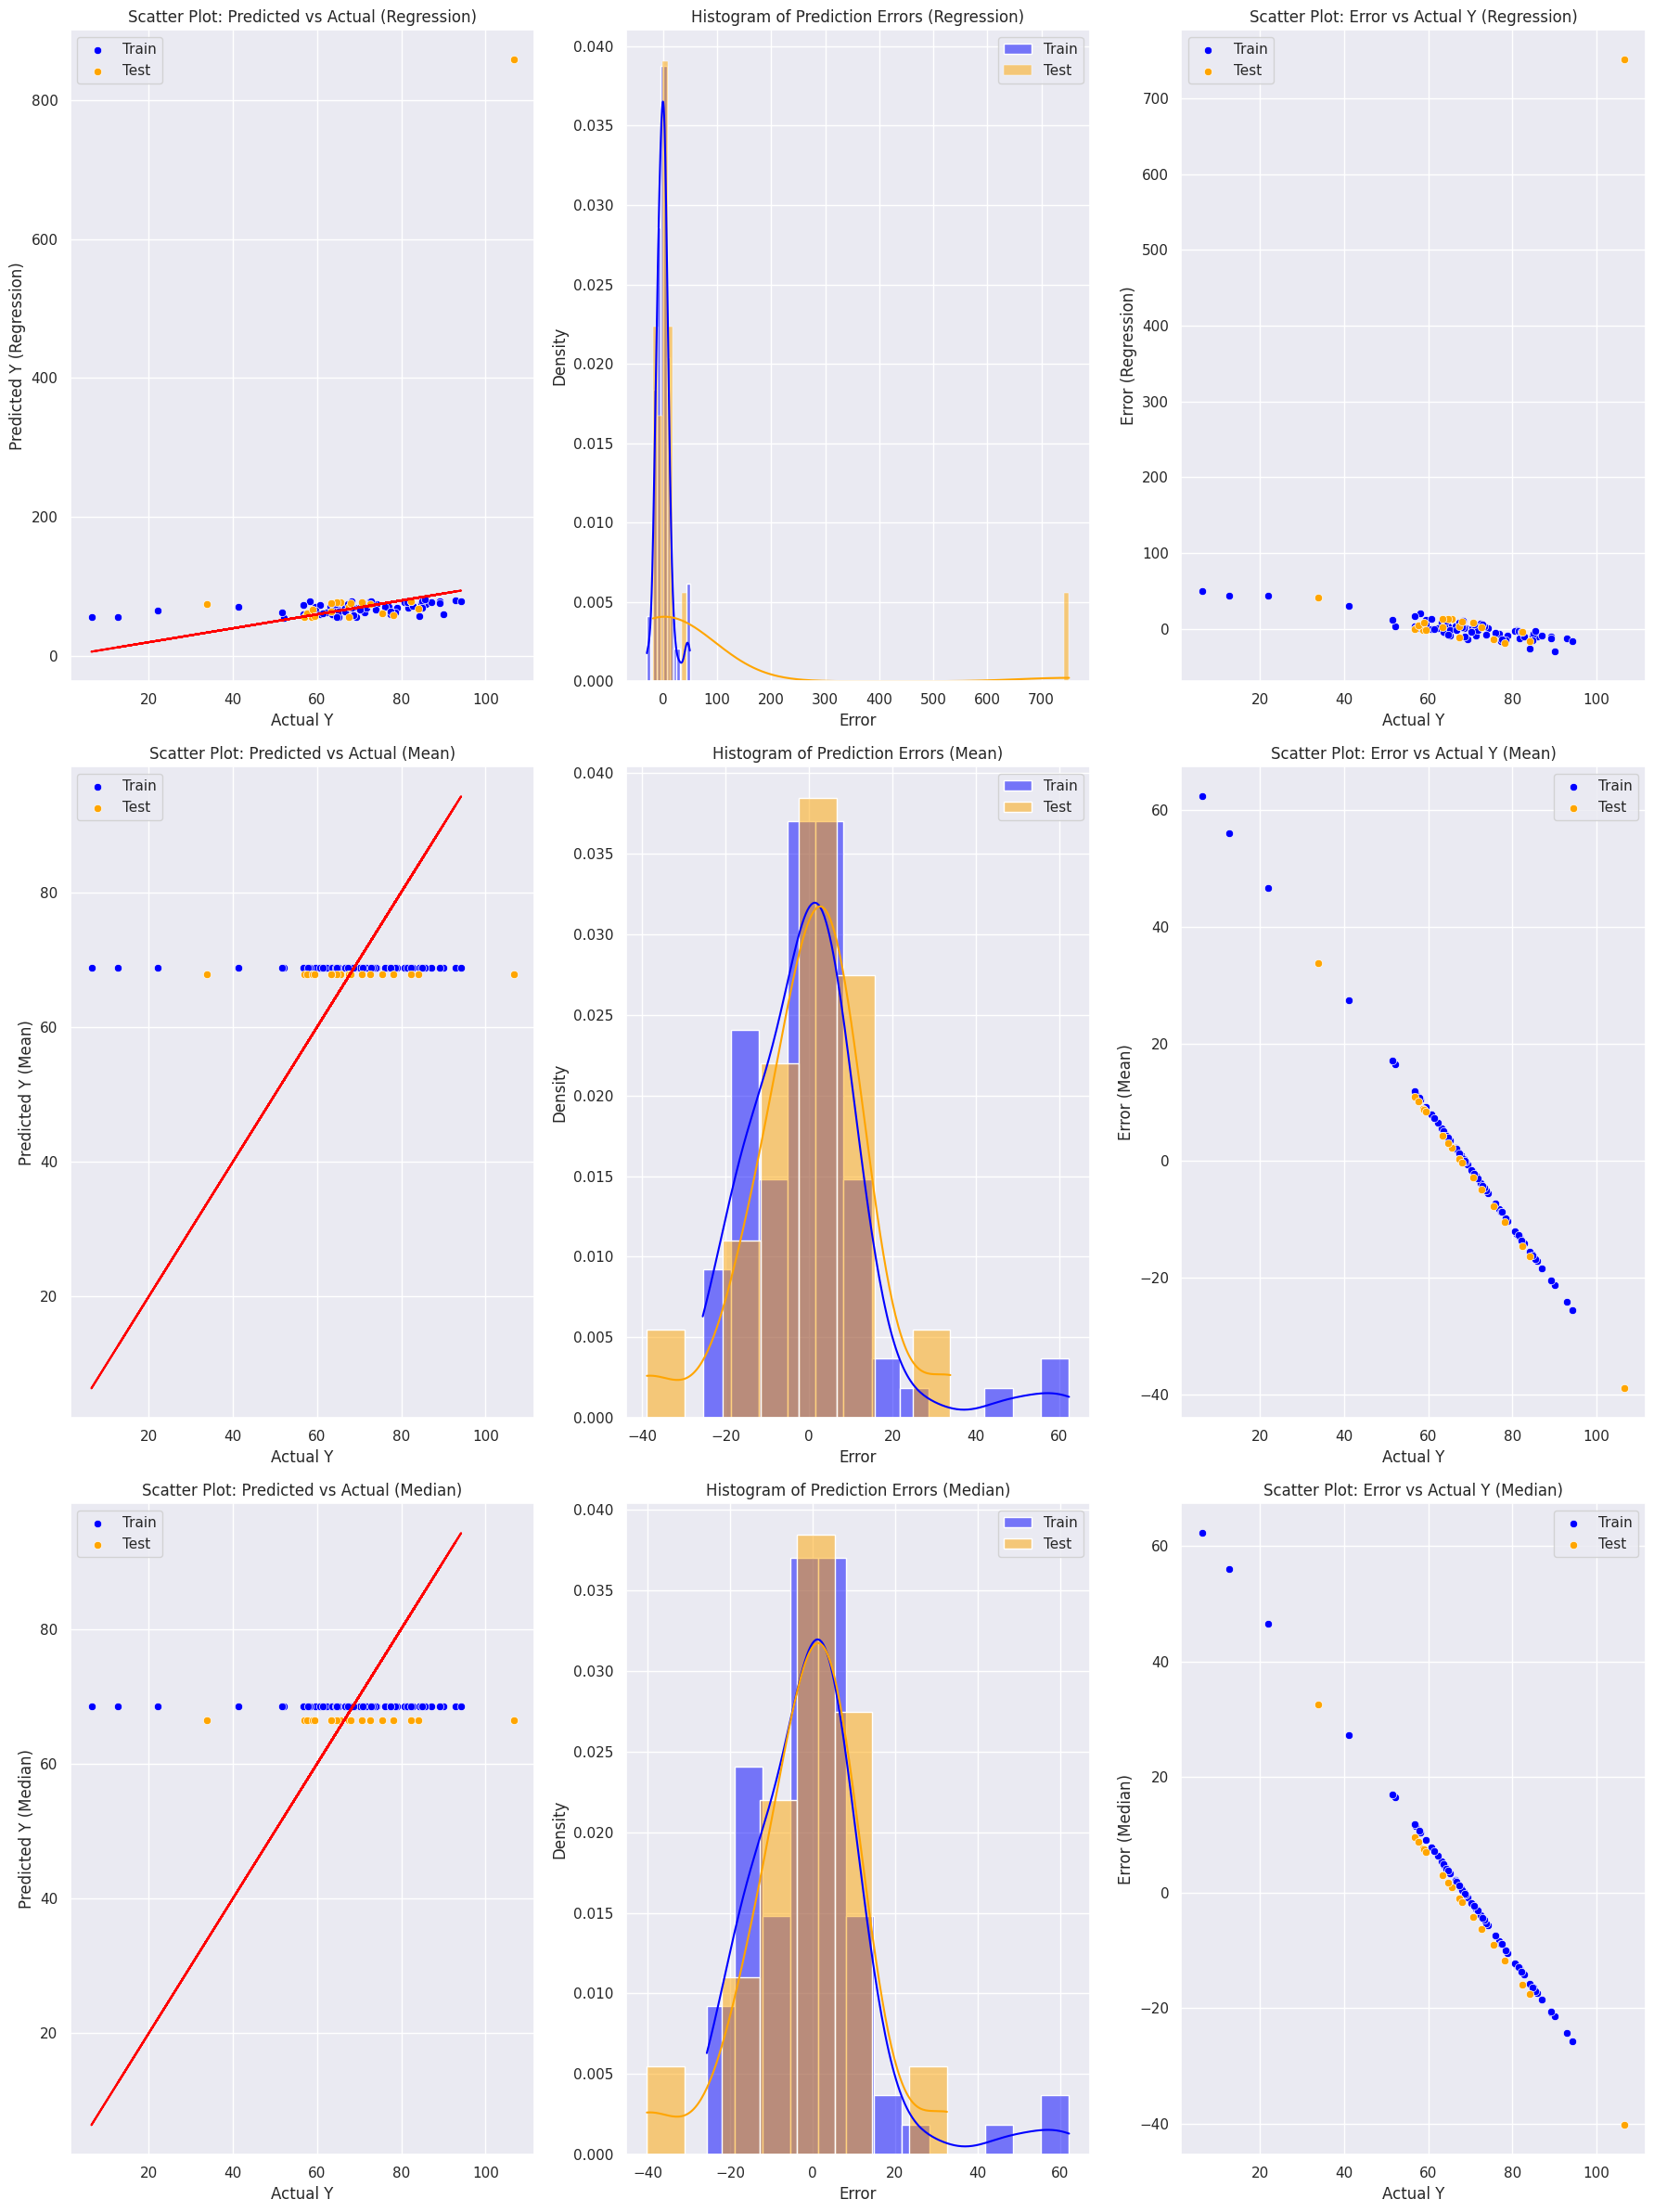

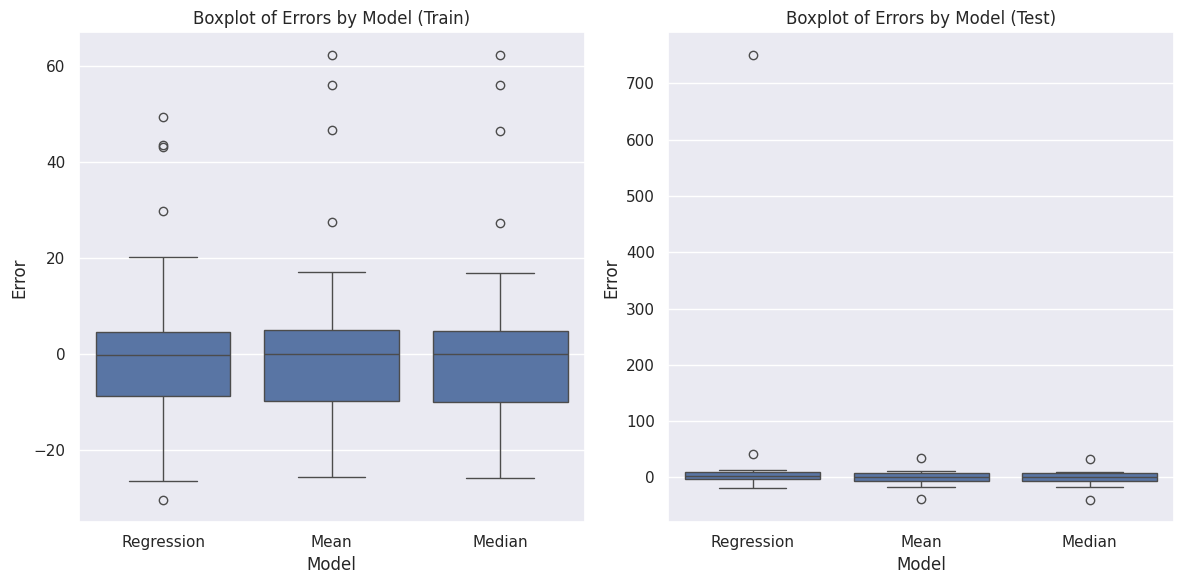


--- Model Performance ---
Model      Train RMSE   Train Std Dev   Test RMSE    Test Std Dev    % Diff RMSE  % Diff Std Dev 
----------------------------------------------------------------------------------------------------
Regression 8.9278       9.6013          46.8144      161.8634        424.36      % 1585.85        %
Mean       10.1901      11.0883         9.5901       10.0092         -5.89       % -9.73          %
Median     10.1901      11.0894         9.5221       10.1568         -6.56       % -8.41          %


In [53]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n for n in range(1,5)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
foo_regresion(X2,Y,test_size=.2, random_state=645, print_coefficients=True, mean=True, median=True)